In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore", message="numpy.ufunc size c,hanged")
from skimage import io, color, transform, feature
from my_measures import BinaryClassificationPerformance  
from sklearn.model_selection import train_test_split
%matplotlib inline

### IMPORTANT!!! Make sure you are using BinaryClassificationPerformance v1.03


In [2]:
help(BinaryClassificationPerformance)

Help on class BinaryClassificationPerformance in module my_measures:

class BinaryClassificationPerformance(builtins.object)
 |  BinaryClassificationPerformance(predictions, labels, desc, probabilities=None)
 |  
 |  Performance measures to evaluate the fit of a binary classification model, v1.02
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictions, labels, desc, probabilities=None)
 |      Initialize attributes: predictions-vector of predicted values for Y, labels-vector of labels for Y
 |  
 |  compute_measures(self)
 |      Compute performance measures defined by Flach p. 57
 |  
 |  img_indices(self)
 |      Get the indices of true and false positives to be able to locate the corresponding images in a list of image names
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the obj

### file paths and names

In [3]:
ci_path = '/users/kinetic.tricia/plane_data/cropped_images/' # file path for cropped images for training
l_file = '/users/kinetic.tricia/plane_data/plane_labels.csv' # file path and file name for csv with labels

# Function for feature building and extraction on photographs¶

scikit-image documentation on methods used for feature extraction:  

* http://scikit-image.org/docs/dev/api/skimage.color.html#rgb2gray  
* http://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize  
* http://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.canny

In [4]:
# in downscaling the image, what do you want the new dimensions to be?
# the original dimensions of cropped images: (60, 140), which if 8,400 pixels
dims = (15, 35) # 25% of the original size, 525 pixels

[0.12401573 0.11648205 0.13952649 0.16600221 0.14839046 0.11401215
 0.11715751 0.11325195 0.10247775 0.10283514 0.1154884  0.14123865
 0.14803636 0.1670785  0.1511305  0.15230284 0.15749273 0.18258377
 0.15629166 0.14333641 0.15819405 0.13206261 0.09786691 0.10152979
 0.10315129 0.09150656 0.10016536 0.11894053 0.13478119 0.1492471
 0.1982675  0.12040723 0.13799464 0.14148825 0.13607918]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]
downscaled image shape: 
(15, 35)
image representation (first row of pixels): 
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]


example of transformation: 


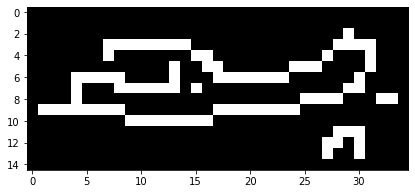

In [5]:
def image_manipulation(imname, imgs_path, imview=False):
    warnings.filterwarnings('ignore')
    imname = imgs_path + imname + '.png'
    img_raw = io.imread(imname, as_gray=True)
    downscaled = transform.resize(img_raw, (dims[0], dims[1])) # downscale image
    final_image = feature.canny(downscaled) # edge filter image with Canny algorithm
    print(downscaled[0])
    print(final_image[0])
    if imview==True:
        io.imshow(final_image)
    warnings.filterwarnings('always')
    return final_image

# test the function, look at input/output
test_image = image_manipulation('2017-08-25T23+24+13_390Z', ci_path, True)
print('downscaled image shape: ')
print(test_image.shape)
print('image representation (first row of pixels): ')
print(test_image[0])
print('\n')
print('example of transformation: ')

In [ ]:
def image_manipulation(imname, imgs_path, imview=False):
    warnings.filterwarnings('ignore')
    imname = imgs_path + imname + '.png'
    img_raw = io.imread(imname, as_gray=True)
    downscaled = transform.resize(img_raw, (dims[0], dims[1])) # downscale image
    final_image = feature.canny(downscaled) # edge filter image with Canny algorithm
    print(downscaled[0])
    print(final_image[0])
    if imview==True:
        io.imshow(final_image)
    warnings.filterwarnings('always')
    return final_image

# test the function, look at input/output
test_image = image_manipulation('2017-08-25T23+24+13_390Z', ci_path, True)
print('downscaled image shape: ')
print(test_image.shape)
print('image representation (first row of pixels): ')
print(test_image[0])
print('\n')
print('example of transformation: ')

[0.12401573 0.11648205 0.13952649 0.16600221 0.14839046 0.11401215
 0.11715751 0.11325195 0.10247775 0.10283514 0.1154884  0.14123865
 0.14803636 0.1670785  0.1511305  0.15230284 0.15749273 0.18258377
 0.15629166 0.14333641 0.15819405 0.13206261 0.09786691 0.10152979
 0.10315129 0.09150656 0.10016536 0.11894053 0.13478119 0.1492471
 0.1982675  0.12040723 0.13799464 0.14148825 0.13607918]
[0.03051241 0.02850514 0.01116356 0.00857712 0.00854595 0.00632196
 0.00381023 0.00200308 0.00177744 0.00237866 0.00330992 0.00415537
 0.00385634 0.00212913 0.00122013 0.00159046 0.00253638 0.00437637
 0.00472544 0.00477062 0.00782447 0.00968618 0.00734184 0.0037378
 0.00180091 0.00252996 0.00695759 0.0143008  0.02646284 0.04534141
 0.04497569 0.02738399 0.02423789 0.0399285  0.03955277]
downscaled image shape: 
(15, 35)
image representation (first row of pixels): 
[0.03051241 0.02850514 0.01116356 0.00857712 0.00854595 0.00632196
 0.00381023 0.00200308 0.00177744 0.00237866 0.00330992 0.00415537
 0.00

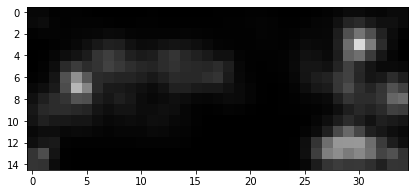

In [6]:
def image_manipulation_corner_shi_tomasi(imname, imgs_path, imview=False):
    warnings.filterwarnings('ignore')
    imname = imgs_path + imname + '.png'
    img_raw = io.imread(imname, as_gray=True)
    downscaled = transform.resize(img_raw, (dims[0], dims[1])) # downscale image
    final_image = feature.corner_shi_tomasi(downscaled) # edge filter image with Canny algorithm
    print(downscaled[0])
    print(final_image[0])
    if imview==True:
        io.imshow(final_image)
    warnings.filterwarnings('always')
    return final_image

# test the function, look at input/output
test_image = image_manipulation_corner_shi_tomasi('2017-08-25T23+24+13_390Z', ci_path, True)
print('downscaled image shape: ')
print(test_image.shape)
print('image representation (first row of pixels): ')
print(test_image[0])
print('\n')
print('example of transformation: ')

In [ ]:
def image_manipulation_corner_fast(imname, imgs_path, imview=False):
    warnings.filterwarnings('ignore')
    imname = imgs_path + imname + '.png'
    img_raw = io.imread(imname, as_gray=True)
    downscaled = transform.resize(img_raw, (dims[0], dims[1])) # downscale image
    final_image = feature.corner_fast(downscaled) # edge filter image with Canny algorithm
    print(downscaled[0])
    print(final_image[0])
    if imview==True:
        io.imshow(final_image)
    warnings.filterwarnings('always')
    return final_image

# test the function, look at input/output
test_image = image_manipulation_corner_fast('2017-08-25T23+24+13_390Z', ci_path, True)
print('downscaled image shape: ')
print(test_image.shape)
print('image representation (first row of pixels): ')
print(test_image[0])
print('\n')
print('example of transformation: ')

In [ ]:
def image_manipulation_corner_moravec(imname, imgs_path, imview=False):
    warnings.filterwarnings('ignore')
    imname = imgs_path + imname + '.png'
    img_raw = io.imread(imname, as_gray=True)
    downscaled = transform.resize(img_raw, (dims[0], dims[1])) # downscale image
    final_image = feature.corner_moravec(downscaled) # edge filter image with Canny algorithm
    print(downscaled[0])
    print(final_image[0])
    if imview==True:
        io.imshow(final_image)
    warnings.filterwarnings('always')
    return final_image

# test the function, look at input/output
test_image = image_manipulation_corner_moravec('2017-08-25T23+24+13_390Z', ci_path, True)
print('downscaled image shape: ')
print(test_image.shape)
print('image representation (first row of pixels): ')
print(test_image[0])
print('\n')
print('example of transformation: ')

for comparison, look at original image:

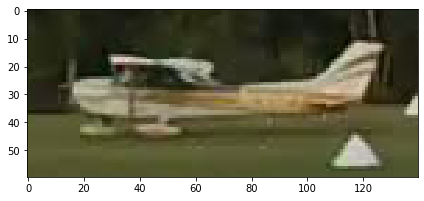

In [7]:
this_imname = ci_path + '2017-08-25T23+24+13_390Z.png'
io.imshow(io.imread(this_imname))

# function to process raw images, resulting in training and test datasets

In [8]:
# function that takes raw images and completes all preprocessing required before model fits
def process_raw_data(labels_fn, images_fp, my_random_seed, imview=False, test=False):
    plane_data = pd.read_csv(labels_fn) # read in photograph labels
    print("First few lines of image labels: ")
    print(plane_data.head())
    print("Size of image label dataFrame: ")
    print(plane_data.shape)
        
    # construct lists for features, labels, and a crosswalk reference to image names
    features_list = []
    if (not test):
        y_list = []
    imnames_list = []

    #for index, row in plane_data.iterrows():
        #features_list.append(image_manipulation(row['img_name'], images_fp))
        #if (not test):
            #y_list.append(row['plane'])
        #imnames_list.append(row['img_name'])
        
    for index, row in plane_data.iterrows():
        #features_list.append(image_manipulation(row['img_name'], images_fp))
        #features_list.append(image_manipulation_corner_fast(row['img_name'], images_fp))
        #features_list.append(image_manipulation_corner_moravec(row['img_name'], images_fp))
        features_list.append(image_manipulation_corner_shi_tomasi(row['img_name'], images_fp))
        if (not test):
            y_list.append(row['plane'])
        imnames_list.append(row['img_name'])
    
    # convert the lists to ndarrays
    features = np.asarray(features_list)
    if (not test):
        Y = np.asarray(y_list)
    imgs = np.asarray(imnames_list)
    print('Shape of original feature representation: ')
    print(features.shape)

    # flatten the images ndarray to one row per image
    features_flat = features.reshape((features.shape[0], -1))

    print('Shape of flat feature representation: ')
    print(features_flat.shape)

    if (not test):
        print('Shape of Y: ')
        print(Y.shape)

        print('Number of images with planes: ')
        print(Y.sum())
    
        # create train and test sets
        data_train, data_test, y_train, y_test, imgs_train, imgs_test = train_test_split(features_flat, 
            Y, imgs, test_size = 0.25, random_state = my_random_seed)

        print('Shape of training set: ')
        print(y_train.shape)
        print('Number of training images that contain an airplane: ')
        print(y_train.sum())

        print('Shape of test set: ')
        print(y_test.shape)
        print('Number of test images that contain an airplane: ')
        print(y_test.sum())
    
    if (test):
        X_submission_test = features_flat
        print("Shape of X_test for submission:")
        print(X_submission_test.shape)
        print('SUCCESS!')
        return(X_submission_test, plane_data)
    else: 
        print("Shape of data_train and data_test:")
        print(data_train.shape)
        print(data_test.shape)
        print("Shape of y_train and y_test:")
        print(y_train.shape)
        print(y_test.shape)
        print("Shape of imgs_train and imgs_test:")
        print(imgs_train.shape)
        print(imgs_test.shape)
        print('SUCCESS!')
        return(data_train, data_test, y_train, y_test, imgs_train, imgs_test)


In [9]:
data_train, data_test, y_train, y_test, imgs_train, imgs_test = process_raw_data(l_file, ci_path, 
    my_random_seed=49, imview=False, test=False)

First few lines of image labels: 
                   img_name  plane
0  2016-08-02T13+50+24_430Z  False
1  2016-08-02T14+12+37_390Z  False
2  2016-08-02T22+20+26_600Z  False
3  2016-08-03T12+04+30_670Z  False
4  2016-08-03T12+32+21_790Z  False
Size of image label dataFrame: 
(6758, 2)
[0.20547061 0.21295065 0.19599567 0.20578889 0.20571239 0.23308365
 0.25912115 0.25581073 0.24953636 0.23443476 0.2533965  0.24268782
 0.26553624 0.26001023 0.24618105 0.24563969 0.23563714 0.23160741
 0.22953726 0.22396161 0.21323035 0.20479361 0.22804299 0.23780513
 0.25189583 0.24936608 0.27217812 0.26430699 0.24723033 0.24361547
 0.2471474  0.24270266 0.22660696 0.22383923 0.2279992 ]
[0.08843247 0.08953258 0.02394918 0.00467514 0.00335618 0.00397482
 0.00362055 0.00184376 0.00084914 0.00089602 0.00099245 0.00137218
 0.00166967 0.00107956 0.00035063 0.0002215  0.00048913 0.00171419
 0.0037182  0.00427119 0.00376786 0.00323723 0.00265575 0.00222812
 0.00149718 0.00122257 0.00221    0.00330613 0.0033109

[0.29481712 0.27371948 0.14435845 0.17616366 0.12082619 0.11330955
 0.11403694 0.1114477  0.19916582 0.31449242 0.25482233 0.30180437
 0.18557562 0.15440381 0.10196046 0.10684286 0.24817828 0.25423692
 0.25607496 0.29110411 0.35635677 0.28003285 0.28626563 0.33820987
 0.32337542 0.27902134 0.25053842 0.23703634 0.21178901 0.24402998
 0.26694847 0.22853779 0.13664263 0.13654185 0.12450789]
[0.2005087  0.18858179 0.05627926 0.01413863 0.00526938 0.00583625
 0.01668441 0.03539051 0.05214822 0.05101004 0.03045981 0.02076135
 0.01298554 0.0151823  0.03505114 0.02768138 0.02106662 0.02219372
 0.03059525 0.04131278 0.03008937 0.01250035 0.00765933 0.00935069
 0.00974866 0.00565652 0.00496823 0.01116945 0.01885335 0.03095097
 0.05424721 0.05128036 0.04435209 0.05534193 0.04783709]
[0.47087011 0.47031627 0.47066993 0.46694274 0.46570686 0.46177388
 0.46987126 0.49244473 0.49243434 0.50326744 0.50883807 0.50003769
 0.49912134 0.49991084 0.50590359 0.50748081 0.5119909  0.50860856
 0.50007814 0.4

[0.82636605 0.82751743 0.8334084  0.84130943 0.8505394  0.85379427
 0.85499577 0.8492927  0.84836055 0.84950318 0.85582292 0.85816829
 0.82021576 0.79992689 0.80903408 0.8140431  0.81620248 0.81536296
 0.80421351 0.80020242 0.79693587 0.80124968 0.80485057 0.80612435
 0.81050315 0.81298621 0.81767677 0.8087197  0.79849822 0.79364935
 0.80039869 0.80980507 0.81215004 0.82358949 0.84158683]
[1.32998573e+00 1.27032647e+00 3.13927622e-01 2.65133912e-02
 1.18815644e-03 3.23133888e-04 3.34691209e-04 6.63548972e-04
 1.26397161e-03 2.16052567e-03 4.85704109e-03 7.70806447e-03
 7.78092072e-03 5.58093466e-03 2.23714557e-03 7.87988551e-04
 3.14137853e-04 1.54514573e-04 1.46273755e-04 2.60402916e-04
 3.46519394e-04 3.54548772e-04 3.03100724e-04 2.25503589e-04
 3.16774699e-04 8.73623273e-04 1.55254480e-03 1.56129643e-03
 1.40396362e-03 1.46842619e-03 2.10195587e-03 2.65042917e-02
 3.07715917e-01 1.26767904e+00 1.39364452e+00]
[0.79213786 0.79676897 0.79937592 0.80648144 0.80738865 0.80700447
 0.807

[0.58491256 0.58491318 0.58491487 0.58491554 0.58492196 0.58695885
 0.59254402 0.59275333 0.59275333 0.59275333 0.59275333 0.59275333
 0.59275333 0.59275333 0.59275333 0.59275333 0.59275333 0.59275333
 0.59275333 0.59275395 0.59275564 0.5927557  0.5927557  0.5927557
 0.5927557  0.5927557  0.5927557  0.5927557  0.5927557  0.5927557
 0.5927557  0.5927557  0.5927557  0.5927557  0.5927557 ]
[6.56597181e-01 6.24198144e-01 1.53648791e-01 1.28000662e-02
 4.30495008e-04 4.87013649e-05 4.66487631e-05 2.96816342e-05
 6.90592859e-06 6.72036421e-07 1.22019362e-07 5.82488908e-08
 7.25134550e-08 1.19860395e-07 1.02727782e-07 5.33598816e-08
 1.75726452e-07 1.34992983e-06 5.29958839e-06 9.62737653e-06
 8.30005841e-06 3.47062775e-06 6.77475649e-07 6.43138005e-08
 4.13305923e-09 2.00809591e-10 5.73807668e-12 7.10542736e-15
 0.00000000e+00 0.00000000e+00 3.96658593e-04 1.31216846e-02
 1.57698372e-01 6.40590726e-01 6.73788744e-01]
[0.63501544 0.63459549 0.63417554 0.63417137 0.63419357 0.63642929
 0.63866

[0.59427451 0.59107908 0.59080848 0.58984022 0.58981283 0.59445287
 0.59540629 0.59854824 0.59840471 0.5941051  0.59357201 0.59357192
 0.59421512 0.59940329 0.60004648 0.60004645 0.59964272 0.59644528
 0.59617474 0.59520623 0.59464575 0.59498568 0.59501653 0.59501676
 0.59551641 0.59954657 0.60004622 0.60004626 0.59964254 0.59644501
 0.5961745  0.59520674 0.59536931 0.60176265 0.60430973]
[6.78867830e-01 6.47664165e-01 1.59624548e-01 1.32894834e-02
 4.29939091e-04 2.73554667e-05 2.81912302e-05 4.03077668e-05
 3.21064770e-05 1.48800297e-05 1.75852012e-05 2.33649848e-05
 2.13771704e-05 2.14893877e-05 2.50332520e-05 2.34888829e-05
 1.89271469e-05 1.38528453e-05 8.54035195e-06 3.85736239e-06
 3.01393496e-06 2.46843087e-06 4.61546875e-06 1.42746551e-05
 1.84702631e-05 1.95926721e-05 2.07976997e-05 2.02567093e-05
 2.20431638e-05 2.98829013e-05 4.62206117e-04 1.36826275e-02
 1.63905509e-01 6.67167629e-01 6.99073667e-01]
[0.31124824 0.28155738 0.2742347  0.24838542 0.23788955 0.24570282
 0.245

[0.11932573 0.11039291 0.11393827 0.12057065 0.1169398  0.1167802
 0.12652906 0.12844274 0.10971022 0.11485112 0.12444025 0.1286925
 0.14835696 0.16397105 0.15551554 0.17612646 0.24175598 0.25341839
 0.34703096 0.35733708 0.42365595 0.47682468 0.49391848 0.51127699
 0.52565844 0.54049053 0.55415959 0.56739389 0.58139592 0.57933009
 0.4030581  0.31292055 0.22272169 0.14995953 0.11399299]
[0.02561102 0.02265145 0.00590693 0.00138144 0.00092611 0.00080371
 0.00127649 0.0014661  0.00102706 0.00063173 0.00058115 0.00092986
 0.00129546 0.00247236 0.00619874 0.01130238 0.02416802 0.05918554
 0.11663599 0.16505197 0.15221254 0.0837841  0.02754496 0.00683155
 0.00229077 0.00234785 0.00457182 0.02419798 0.11126223 0.23552253
 0.24575756 0.16085447 0.09128843 0.06430812 0.04167831]
[0.10794073 0.11448438 0.11443571 0.10983777 0.11055499 0.12360774
 0.13291405 0.11816158 0.10801595 0.10432504 0.11477591 0.10044694
 0.09514995 0.10652758 0.10342542 0.12290944 0.10610141 0.09519102
 0.09007061 0.094

[0.08932053 0.08728252 0.08168898 0.07927261 0.07321939 0.07228899
 0.07036806 0.0739147  0.08383452 0.08261699 0.07826099 0.07911198
 0.08189636 0.0832991  0.08686438 0.08902212 0.09457323 0.09491009
 0.09526046 0.09403749 0.09064059 0.08744667 0.07903462 0.0776951
 0.07488123 0.07261442 0.06669018 0.06772221 0.07116113 0.0712507
 0.07114244 0.07095316 0.07044809 0.07167296 0.07508363]
[2.45410116e-02 2.38510516e-02 5.96275716e-03 5.22583255e-04
 3.93465503e-05 5.96372991e-05 1.41837239e-04 1.35738500e-04
 1.65596667e-04 1.36391244e-04 5.94386009e-05 3.04615777e-05
 1.63834635e-05 2.40923034e-05 4.61019977e-05 5.74114536e-05
 9.07499937e-05 1.03435752e-04 7.17697691e-05 5.63409659e-05
 6.40173239e-05 5.64074361e-05 5.58375983e-05 6.91777181e-05
 7.20181647e-05 6.38295038e-05 4.58886751e-05 3.65736024e-05
 2.61249205e-05 1.23047720e-05 1.71242107e-05 4.08543989e-04
 4.85269961e-03 1.91815735e-02 1.99603182e-02]
[0.07783562 0.07783562 0.07783798 0.0788554  0.08164738 0.08266935
 0.08518

[0.72363172 0.7329102  0.78631918 0.87332266 0.94328897 0.79925885
 0.73579544 0.77656182 0.86489619 0.85454433 0.5674673  0.72719674
 0.58062111 0.42881019 0.29305039 0.34782989 0.44549752 0.75538887
 0.74882265 0.72113209 0.72779841 0.73257227 0.78759412 0.85910884
 0.85706999 0.95035208 0.89236712 0.90400916 0.90238909 0.84148035
 0.85404638 0.9611002  0.9265011  0.7739561  0.4993526 ]
[1.55965897 1.28299881 0.48669881 0.20690894 0.14477497 0.1046175
 0.08502907 0.0599193  0.06830222 0.06360331 0.06359164 0.12996847
 0.21785315 0.24175424 0.36347272 0.49948865 0.55351135 0.52983297
 0.2653888  0.0945853  0.04899443 0.05407579 0.11333733 0.14681627
 0.08403697 0.02791313 0.03320424 0.10031848 0.1843062  0.19756005
 0.18077959 0.19670384 0.44544364 1.03376105 0.97806088]
[0.10996684 0.10996684 0.10986208 0.10706697 0.10604763 0.10604527
 0.10592541 0.10272724 0.10156092 0.10155821 0.10157331 0.10197637
 0.10212336 0.1021237  0.1021209  0.10204611 0.10191688 0.0991965
 0.09820724 0.098

[0.21038871 0.21178078 0.22987    0.21934351 0.22376842 0.21636795
 0.19112857 0.2069     0.21632348 0.2033418  0.19791542 0.20770878
 0.21130864 0.24126256 0.2214802  0.22259239 0.21100528 0.20296313
 0.22107245 0.20731105 0.20682819 0.20943846 0.21063692 0.19787238
 0.1793655  0.16950679 0.16950977 0.17253218 0.17008883 0.16192655
 0.16217258 0.17114356 0.17670798 0.17889526 0.18103088]
[0.08296815 0.07636467 0.02004553 0.00277225 0.00082538 0.00055636
 0.00078743 0.00073866 0.00066067 0.00062131 0.00063624 0.00063052
 0.00085646 0.00121394 0.00114268 0.00134631 0.00195553 0.00162131
 0.00070136 0.00028715 0.00022546 0.00076876 0.0020074  0.00279422
 0.00243844 0.00144219 0.00055513 0.00039887 0.00048351 0.00058373
 0.0006733  0.00184469 0.01538677 0.06048317 0.06340162]
[0.82145733 0.85077839 0.86334814 0.86254705 0.8512228  0.83782715
 0.84365448 0.71508268 0.45609226 0.4674873  0.43062155 0.39468686
 0.38464488 0.41356626 0.28252048 0.23051547 0.25330472 0.30994712
 0.33173598 0.5

[0.38344544 0.32387448 0.30853416 0.23705814 0.24497808 0.32520417
 0.24940836 0.37084388 0.54287293 0.36421222 0.37184857 0.29921337
 0.32701297 0.30483116 0.45523232 0.50406008 0.58654019 0.64239537
 0.6795945  0.76175958 0.74723653 0.78969554 0.76976936 0.77985583
 0.80092641 0.80150024 0.80138236 0.80443491 0.80643685 0.80481445
 0.80608173 0.80176588 0.76103134 0.74626144 0.42387563]
[0.20384674 0.16985219 0.04658855 0.01906699 0.0179899  0.02747013
 0.05832756 0.08879957 0.0917754  0.05821286 0.03072179 0.01605031
 0.01673336 0.02650833 0.03648927 0.04049836 0.04715815 0.06447976
 0.06935537 0.06127742 0.10646245 0.19318473 0.21034362 0.13320309
 0.05082463 0.01318159 0.00481399 0.00377096 0.00369362 0.01929935
 0.09344309 0.23211033 0.43805169 0.74302507 0.53293521]
[0.72310387 0.72415705 0.72521022 0.72522068 0.72523759 0.72694053
 0.72864347 0.72866038 0.72867083 0.72972341 0.73077599 0.73078644
 0.7307956  0.73171744 0.73263928 0.73264843 0.73266628 0.73446339
 0.7362605  0.7

[0.55907416 0.55723725 0.55721823 0.55719458 0.55519831 0.55747099
 0.55797659 0.55555018 0.55129558 0.54680077 0.54632525 0.54703607
 0.5513205  0.55462972 0.55478711 0.55823501 0.55891685 0.55573715
 0.55507718 0.55203575 0.54658623 0.54008925 0.54108173 0.5451147
 0.5442375  0.5385666  0.54038703 0.54231031 0.5471083  0.55711511
 0.56192011 0.70543638 0.94372745 0.96034098 0.94128289]
[5.72268230e-01 5.42259926e-01 1.32921342e-01 1.10918812e-02
 3.88127587e-04 7.17877267e-05 7.67932295e-05 4.51920986e-05
 2.52190866e-05 3.15881294e-05 3.01470158e-05 1.66853396e-05
 1.63586402e-05 4.11895697e-05 8.07156880e-05 9.77043368e-05
 7.47804839e-05 5.05224741e-05 8.65116349e-05 1.67729434e-04
 2.15373470e-04 1.97868865e-04 1.06013252e-04 6.97539514e-05
 6.20440818e-05 5.92268131e-05 9.30885266e-05 4.97785623e-04
 5.89605541e-03 3.53644251e-02 9.38322403e-02 1.64935785e-01
 4.17748416e-01 1.27382538e+00 1.46985377e+00]
[0.68561384 0.68502238 0.69223325 0.69486404 0.69487002 0.69485487
 0.6944

[0.10874089 0.10985229 0.11565771 0.11733771 0.11066836 0.10820675
 0.10838591 0.10858489 0.10830834 0.10803058 0.10810687 0.10816589
 0.10614881 0.10412742 0.103754   0.10340296 0.10363466 0.10389301
 0.10564572 0.10276832 0.09859038 0.10357022 0.11040219 0.11261032
 0.11410997 0.11351524 0.11061415 0.10933393 0.11165756 0.11404592
 0.11921801 0.12441007 0.12910725 0.13840503 0.14673602]
[4.58474844e-02 4.58590661e-02 1.21411693e-02 1.18608150e-03
 1.03232320e-04 2.74936543e-05 1.20409680e-05 4.22240096e-06
 1.47130445e-06 1.40841052e-06 3.54430507e-06 6.56536869e-06
 1.50134169e-05 2.81242694e-05 2.33712662e-05 1.28076730e-05
 1.18494101e-05 2.66231347e-05 5.84726314e-05 1.04852457e-04
 1.80379952e-04 1.24200746e-04 9.02597398e-05 6.88137288e-05
 2.94544018e-05 2.22369068e-05 1.81878910e-05 1.74098908e-05
 4.37655454e-05 6.85581494e-05 9.93349988e-05 1.65421905e-03
 1.95084941e-02 7.89978583e-02 8.75934455e-02]
[0.12229312 0.12410203 0.12809555 0.12857018 0.12857035 0.1285456
 0.1283

[0.54160745 0.55482533 0.56232746 0.56429754 0.56141819 0.56470097
 0.56545883 0.55513918 0.5490046  0.54451164 0.5520551  0.55795472
 0.54359669 0.5413375  0.53735311 0.5321299  0.53100601 0.53215972
 0.53233954 0.53263639 0.5340942  0.53966546 0.5397694  0.53763578
 0.54421933 0.55526158 0.55313905 0.56087759 0.55256787 0.54458185
 0.55241161 0.55213296 0.5521294  0.55707644 0.56317261]
[5.53744056e-01 5.22916301e-01 1.29152288e-01 1.08579665e-02
 4.68600393e-04 2.47998274e-04 2.56403009e-04 1.72156582e-04
 1.80342689e-04 2.32989474e-04 3.36750616e-04 4.31790936e-04
 3.92268596e-04 3.85147716e-04 2.54454346e-04 1.54159182e-04
 1.53910309e-04 2.79383279e-04 4.97071975e-04 5.40196163e-04
 4.08433312e-04 4.53957682e-04 6.42651719e-04 6.14183902e-04
 3.21732524e-04 1.24833289e-04 8.82059036e-05 1.22308408e-04
 1.86330742e-04 2.75226283e-04 6.64446599e-04 1.13038997e-02
 1.31747105e-01 5.44578311e-01 6.04977471e-01]
[0.39940604 0.34588047 0.34297979 0.34989115 0.38744677 0.37176475
 0.411

[0.17584892 0.18624616 0.18732612 0.18094551 0.17200291 0.16617471
 0.16395137 0.17401995 0.1814861  0.18599144 0.1864498  0.18933236
 0.19183438 0.18933512 0.17029573 0.15921593 0.16117549 0.15608482
 0.14013186 0.14120895 0.14499958 0.14495172 0.14448481 0.14331878
 0.14503652 0.1504341  0.14976681 0.14393338 0.14443582 0.14425253
 0.14526751 0.14806116 0.14918881 0.15198626 0.15208732]
[0.0599463  0.05820419 0.01545183 0.00265031 0.0015537  0.0012228
 0.00071932 0.00053034 0.00069376 0.00083275 0.00078526 0.00090442
 0.00185063 0.00329948 0.00408452 0.00354563 0.00195928 0.00102253
 0.00134386 0.00195722 0.00212634 0.00191475 0.00158262 0.00106265
 0.00047838 0.00026405 0.000405   0.00058469 0.00048427 0.00031067
 0.00038359 0.0013728  0.01110564 0.04382092 0.04586855]
[0.17155871 0.15618677 0.13487519 0.13006972 0.13945388 0.13834082
 0.137751   0.13940989 0.12810579 0.13774523 0.14153611 0.14957335
 0.17729025 0.17237713 0.19935315 0.19794085 0.19011843 0.17092855
 0.1617689  0.15

[0.35559598 0.365081   0.36891073 0.36921366 0.36913583 0.37351971
 0.37504459 0.37307163 0.37241957 0.37396143 0.37306234 0.37454841
 0.3735666  0.3709872  0.36484084 0.3509559  0.32194377 0.30829288
 0.32301105 0.34549168 0.35985832 0.36570395 0.36604302 0.36604353
 0.36620726 0.3705911  0.37241032 0.36859985 0.37111555 0.37396959
 0.37404519 0.37050839 0.36948    0.37642512 0.37816398]
[2.43903990e-01 2.34612008e-01 5.86619543e-02 5.05679366e-03
 1.86457340e-04 2.27289299e-05 3.43544061e-05 4.12520474e-05
 6.01018070e-05 9.74283232e-05 1.01921413e-04 6.50370376e-05
 8.19699035e-05 2.94011162e-04 7.20195422e-04 1.01343573e-03
 1.75983041e-03 2.54693509e-03 1.77371307e-03 1.16619048e-03
 9.76418661e-04 5.07297954e-04 1.42799015e-04 3.20205302e-05
 1.72421938e-05 2.46966491e-05 3.80951655e-05 5.65779963e-05
 7.46351182e-05 1.14701237e-04 3.02455283e-04 5.29661576e-03
 6.22667098e-02 2.55952759e-01 2.74524998e-01]
[0.18911462 0.18907399 0.1887464  0.18897271 0.19109836 0.1927099
 0.2237

[0.8173282  0.80344295 0.72536428 0.7359888  0.82268575 0.82432903
 0.79143676 0.66083307 0.46062212 0.50193823 0.69582254 0.79743945
 0.80549483 0.80798188 0.78713685 0.74417722 0.73231092 0.7828265
 0.8174945  0.8222276  0.814215   0.80828079 0.80662211 0.80792236
 0.81206035 0.79148812 0.72010784 0.51731068 0.6896765  0.57540213
 0.49836564 0.78874967 0.80083022 0.77689837 0.79402715]
[1.08219362 1.0638031  0.48470101 0.3268576  0.24862891 0.20599132
 0.34720506 0.48656865 0.54265663 0.53284575 0.47210219 0.31437955
 0.12208164 0.04772015 0.03608108 0.04564162 0.07206413 0.09483276
 0.07704601 0.0322125  0.00659946 0.00119734 0.00472643 0.03052804
 0.09852742 0.14951694 0.12066716 0.08145952 0.10484315 0.22492543
 0.32161182 0.34341866 0.46330521 1.11625824 1.16724653]
[0.81793353 0.81793319 0.81851901 0.82324152 0.82382681 0.82382663
 0.82324117 0.81851878 0.81807631 0.81923378 0.81934659 0.81909544
 0.81651035 0.75491948 0.53486083 0.49361373 0.67847762 0.79297525
 0.82430516 0.81

[0.66677402 0.66649064 0.66637402 0.6630735  0.66304039 0.66618231
 0.66655229 0.66639463 0.66640315 0.66662984 0.66700282 0.66978477
 0.67016861 0.67048274 0.67012935 0.66696474 0.6665724  0.66657223
 0.6665975  0.66680125 0.66682651 0.66682634 0.66641432 0.66309098
 0.66274105 0.66314448 0.66237413 0.6591615  0.65917418 0.66230051
 0.6622986  0.65915648 0.65839371 0.65538312 0.6550099 ]
[8.50923396e-01 8.03345940e-01 1.97265777e-01 1.64559281e-02
 5.64955100e-04 4.74565572e-05 2.52431578e-05 6.45970983e-06
 3.06599368e-06 6.99116957e-06 1.07191827e-05 1.59142587e-05
 2.66412032e-05 3.92521966e-05 3.84336034e-05 2.85432614e-05
 1.73461309e-05 6.11756803e-06 3.48134779e-06 3.06733444e-06
 7.00834731e-06 2.56746360e-05 4.54967419e-05 4.71453028e-05
 3.60058803e-05 5.69479032e-05 1.00788092e-04 1.17337500e-04
 8.32150546e-05 7.12831276e-05 5.62061606e-04 1.56997297e-02
 1.87848788e-01 7.66411724e-01 8.17919743e-01]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.


[0.74630402 0.72874979 0.73087584 0.72891466 0.72571094 0.72426416
 0.7245017  0.72150598 0.71802555 0.72337302 0.72846845 0.72401639
 0.71295041 0.69429285 0.68790985 0.6876447  0.68574361 0.67762776
 0.6738224  0.67912599 0.68106635 0.68571796 0.68591956 0.68599626
 0.68679319 0.68827916 0.68977146 0.69488189 0.69606333 0.7037599
 0.71411034 0.71906442 0.72419602 0.7229019  0.72487762]
[1.02098031e+00 9.54283111e-01 2.32817152e-01 1.97308561e-02
 1.17501272e-03 5.99582676e-04 4.27553769e-04 3.16779832e-04
 3.37728814e-04 2.91322610e-04 4.14772564e-04 7.77345485e-04
 1.08879996e-03 1.27018639e-03 1.00806712e-03 4.53796990e-04
 1.72536325e-04 1.34087368e-04 1.38246861e-04 8.11662423e-05
 5.90894721e-05 5.77062563e-05 4.78890147e-05 5.01347882e-05
 6.46697995e-05 7.85558660e-05 8.84395438e-05 1.02178189e-04
 1.71257603e-04 2.96133159e-04 1.06105199e-03 2.03788091e-02
 2.37678786e-01 9.61685133e-01 1.01347313e+00]
[0.59952734 0.61351114 0.56429315 0.47313434 0.36621303 0.40455697
 0.4108

[0.74364877 0.74397555 0.7466115  0.7473906  0.75103923 0.75149156
 0.75149176 0.75149176 0.75149191 0.75181868 0.75445464 0.75523374
 0.75888252 0.75966162 0.76229778 0.76307688 0.76672551 0.76717784
 0.76717823 0.76759516 0.77095832 0.77170203 0.77433817 0.77511727
 0.77876605 0.77954515 0.78218131 0.78296041 0.78660904 0.78706137
 0.78706157 0.78706157 0.78706157 0.78706157 0.78706157]
[1.05287894e+00 1.00732130e+00 2.48576548e-01 2.07350718e-02
 6.72970367e-04 2.73619484e-05 1.05533591e-05 1.35680951e-05
 2.64057298e-05 3.50555730e-05 3.54291668e-05 3.70740242e-05
 4.82116844e-05 6.91522046e-05 9.03887099e-05 1.01580728e-04
 8.63771800e-05 4.71414017e-05 3.66040514e-05 5.60213936e-05
 5.97596608e-05 5.10419664e-05 5.11402615e-05 6.09258453e-05
 6.13746327e-05 5.45093315e-05 6.46372896e-05 8.69139091e-05
 8.29223466e-05 4.36042188e-05 7.10154733e-04 2.31055035e-02
 2.77620111e-01 1.12769832e+00 1.18557800e+00]
[0.14758079 0.16099119 0.1791554  0.17754909 0.17508891 0.17709359
 0.175

[0.63116985 0.63165368 0.64064424 0.64536702 0.65138534 0.66218642
 0.67430304 0.68467257 0.69012134 0.69922563 0.72037457 0.73173847
 0.73869166 0.74612217 0.75626011 0.76651108 0.77542146 0.78285177
 0.78145156 0.77755822 0.77251605 0.76208039 0.75296464 0.74464843
 0.73572283 0.73420467 0.72625336 0.72133144 0.71406448 0.71012152
 0.70998013 0.71205078 0.72155454 0.72674035 0.7308863 ]
[7.63090699e-01 7.26040478e-01 1.79959402e-01 1.60192951e-02
 1.83865066e-03 1.63160516e-03 1.78556758e-03 1.86741328e-03
 2.00394203e-03 2.11664894e-03 1.77145325e-03 1.01093023e-03
 6.89366790e-04 1.17754913e-03 1.49582409e-03 1.23652384e-03
 8.78649802e-04 6.97320791e-04 6.93304055e-04 1.06751354e-03
 1.74504995e-03 2.18236068e-03 2.08128832e-03 1.66981821e-03
 1.10557695e-03 7.68190154e-04 8.41991420e-04 9.60563083e-04
 9.21481744e-04 8.28316914e-04 1.70978257e-03 2.10345180e-02
 2.32886363e-01 9.46857523e-01 1.01663576e+00]
[0.77530895 0.76639459 0.76453055 0.76473848 0.76493102 0.77082901
 0.771

[0.64812205 0.64893069 0.65114805 0.65123115 0.65123058 0.65103407
 0.65203449 0.65559868 0.65654889 0.65567413 0.65325231 0.65316154
 0.65316698 0.65550937 0.6619324  0.66217312 0.66217109 0.66129598
 0.65889638 0.65880645 0.65881268 0.66149788 0.66886096 0.66913691
 0.669136   0.66874552 0.66767476 0.66763463 0.66763316 0.6669968
 0.66472636 0.66529302 0.67369729 0.6772698  0.68046645]
[8.08252143e-01 7.72754078e-01 1.90908208e-01 1.59185457e-02
 4.98528841e-04 5.72863817e-05 1.06593380e-04 1.25328679e-04
 9.17786806e-05 4.17952096e-05 2.69776362e-05 4.23264043e-05
 9.10334824e-05 1.25214127e-04 1.20102073e-04 7.38314023e-05
 2.95167586e-05 1.96126277e-05 2.24296944e-05 4.35822621e-05
 9.63143531e-05 1.27220776e-04 1.20780085e-04 7.08795960e-05
 1.89321809e-05 5.89480700e-06 4.32492085e-06 5.10145870e-06
 1.44040263e-05 3.71094527e-05 6.05269918e-04 1.71697137e-02
 2.05384591e-01 8.35050820e-01 8.77274508e-01]
[0.63878238 0.6371259  0.63618972 0.63531311 0.63963305 0.64450686
 0.6449

[0.13745291 0.1236317  0.12133086 0.11715695 0.11499577 0.11459656
 0.11775052 0.11852495 0.11550901 0.13535253 0.16771517 0.17536137
 0.17991172 0.18413859 0.17925947 0.18998858 0.18635122 0.16694897
 0.15682917 0.15522011 0.18295999 0.21006479 0.19114906 0.20831909
 0.19898477 0.1850378  0.18499464 0.19863048 0.2012628  0.19271357
 0.17933076 0.16434208 0.1489359  0.13808524 0.14065775]
[3.58004015e-02 3.30965118e-02 8.30252296e-03 7.99454021e-04
 8.82228005e-05 8.51741262e-05 2.66000120e-04 1.43556596e-03
 4.38099127e-03 6.45653868e-03 5.82100636e-03 3.05473047e-03
 9.86940013e-04 3.06325046e-04 4.46843569e-04 1.75549917e-03
 3.30753049e-03 3.60335774e-03 3.89615018e-03 4.02807407e-03
 3.61653551e-03 2.77264739e-03 2.17054216e-03 2.48919497e-03
 2.06551671e-03 1.56086156e-03 1.18013058e-03 1.28260123e-03
 2.31875259e-03 2.77037552e-03 2.18770794e-03 2.01324616e-03
 9.28553314e-03 3.51734300e-02 3.81242753e-02]
[0.39293177 0.36936432 0.26689087 0.24888175 0.25185983 0.26948865
 0.279

[0.78006823 0.77707674 0.79093447 0.79167166 0.76904927 0.74612757
 0.75013869 0.767278   0.78466843 0.79203513 0.79206321 0.79130509
 0.80299213 0.84220544 0.84936797 0.84980911 0.85275471 0.87002324
 0.87310636 0.850288   0.85241056 0.81861013 0.79403313 0.79562906
 0.79425531 0.78993089 0.76829555 0.74939507 0.76718512 0.79864218
 0.80795741 0.79168643 0.79179169 0.80312897 0.8080537 ]
[1.17302344e+00 1.10418914e+00 2.76651224e-01 2.70494976e-02
 4.48934051e-03 6.05556860e-03 7.57861007e-03 6.71642006e-03
 4.58860586e-03 2.17152231e-03 1.08067027e-03 1.52983085e-03
 1.71358666e-03 1.55363641e-03 2.01444965e-03 5.73403292e-03
 1.29774893e-02 1.70694530e-02 1.48330746e-02 1.24276035e-02
 1.06794670e-02 7.39352067e-03 5.81813089e-03 1.05130782e-02
 1.92047500e-02 1.96792616e-02 1.28491220e-02 8.06765890e-03
 5.44963966e-03 4.65339048e-03 4.66410941e-03 2.87373362e-02
 3.06577585e-01 1.22650129e+00 1.26112491e+00]
[0.18701521 0.18551301 0.18408284 0.18571414 0.18657657 0.18359548
 0.185

[0.64088733 0.64126677 0.63263727 0.63724626 0.64024895 0.64593847
 0.64628127 0.63492598 0.62252472 0.61533962 0.61828258 0.61960467
 0.61681073 0.61677996 0.61678335 0.61712504 0.61743582 0.61432659
 0.61124292 0.61427041 0.61964711 0.61948918 0.61678956 0.61571896
 0.61247986 0.61623089 0.61818529 0.62278853 0.62727584 0.62971624
 0.63128942 0.62960684 0.62835566 0.62819264 0.62409399]
[7.36499462e-01 6.96034904e-01 1.69559102e-01 1.42099918e-02
 5.29980523e-04 1.53601122e-04 2.28091109e-04 1.89243980e-04
 1.62577086e-04 1.44204640e-04 1.09625662e-04 1.13652820e-04
 8.54633771e-05 4.39785134e-05 4.67511412e-05 7.83675255e-05
 8.62167588e-05 7.81814284e-05 7.92206712e-05 6.15429996e-05
 4.40783748e-05 2.86758388e-05 1.67023650e-05 1.73463564e-05
 2.38262689e-05 3.88165969e-05 4.52012604e-05 3.56030394e-05
 3.41946573e-05 3.51740102e-05 4.67504571e-04 1.41673615e-02
 1.69730803e-01 6.95521068e-01 7.54036884e-01]
[0.79866801 0.79596682 0.7763729  0.69250548 0.63613695 0.61555276
 0.602

[0.61031881 0.59860031 0.61070751 0.61916818 0.60177534 0.64700751
 0.61715328 0.60206405 0.60960766 0.61271182 0.64450057 0.64613174
 0.60701267 0.65628287 0.57823639 0.59682773 0.60361932 0.58342994
 0.57807256 0.58520448 0.57469234 0.58167145 0.62475494 0.57653568
 0.51874435 0.54123362 0.47296301 0.44260411 0.40985582 0.40687915
 0.38417338 0.34937434 0.37239323 0.38405338 0.41041829]
[0.69891518 0.6618048  0.16431428 0.01576416 0.00301191 0.00355711
 0.00364752 0.00292507 0.00224959 0.0025351  0.0046122  0.00532917
 0.00340993 0.00168458 0.00153753 0.00244113 0.00389077 0.00432264
 0.00286387 0.00219324 0.00431676 0.01007451 0.0259618  0.03589488
 0.02570381 0.01268983 0.00917706 0.00821936 0.00665465 0.00869525
 0.01316747 0.0188071  0.07476532 0.28067949 0.32300801]
[0.64128094 0.63422082 0.62835446 0.62703675 0.62451843 0.62331824
 0.61577098 0.61311411 0.61563543 0.61637614 0.61154592 0.60976583
 0.60928683 0.60936476 0.61606476 0.61859115 0.62080764 0.62170433
 0.62411945 0.6

[0.74827778 0.75446093 0.74571255 0.73818195 0.6932296  0.67244822
 0.6478299  0.63589583 0.65068794 0.63151181 0.63332131 0.66155758
 0.65441953 0.56028047 0.36582429 0.2927378  0.31591136 0.31726972
 0.30971907 0.31580095 0.32237645 0.32127623 0.33167867 0.31424972
 0.35947222 0.38647624 0.40292319 0.42147025 0.4209732  0.57635446
 0.59242671 0.55980886 0.53305517 0.63752625 0.60376905]
[1.03174796 0.85721202 0.22990946 0.03229914 0.01075542 0.0130776
 0.02048605 0.02545919 0.02398583 0.03249915 0.07157839 0.12081308
 0.16046672 0.17450696 0.12895996 0.06939107 0.02123413 0.00390526
 0.0022268  0.00311587 0.00269408 0.00247854 0.00674767 0.0120126
 0.01196687 0.00760261 0.00631424 0.02286271 0.06389633 0.11038262
 0.10324871 0.06205241 0.16567648 0.62539732 0.67946125]
[0.6380639  0.64097169 0.64116045 0.64137936 0.64232778 0.64490617
 0.6450028  0.64500268 0.6449543  0.64482143 0.64473742 0.64452323
 0.64561349 0.64862515 0.64865898 0.6484448  0.64953506 0.65254672
 0.65258055 0.652

[0.71432667 0.71256601 0.71192389 0.7119224  0.71198576 0.71367641
 0.71429297 0.7142944  0.7141364  0.70992043 0.70838293 0.70837936
 0.70853918 0.71280354 0.71435869 0.7143623  0.71428696 0.71227667
 0.71154354 0.71154184 0.71159388 0.71298253 0.71348895 0.71349012
 0.71340191 0.71104815 0.71018976 0.71018777 0.71021055 0.71081863
 0.71105143 0.71106506 0.71104483 0.71152424 0.71170471]
[9.80900556e-01 9.30498484e-01 2.28824457e-01 1.90317148e-02
 5.80861679e-04 6.60077613e-06 5.94266179e-06 8.73643143e-06
 9.61091745e-06 9.13409955e-06 1.32896963e-05 1.86472291e-05
 2.05130528e-05 1.95208881e-05 1.89893070e-05 1.72319190e-05
 2.04946870e-05 2.10977128e-05 1.44885941e-05 7.19891341e-06
 4.85580818e-06 4.42707881e-06 4.54347702e-06 5.50657931e-06
 5.71612425e-06 5.41718533e-06 7.19975121e-06 1.41134675e-05
 2.85608224e-05 3.45978067e-05 5.99054601e-04 1.90713009e-02
 2.29089167e-01 9.30631946e-01 9.80232942e-01]
[0.68583822 0.68640008 0.69093206 0.69149392 0.69149437 0.69194902
 0.695

[0.44890229 0.44961093 0.45253814 0.45497226 0.45619454 0.45484921
 0.45565024 0.45922838 0.46107821 0.46240353 0.46366274 0.45895021
 0.4503095  0.44699486 0.44854093 0.45411497 0.45964336 0.45729802
 0.45487542 0.45116596 0.44229384 0.43610393 0.43424827 0.42401849
 0.41574291 0.41987239 0.42711663 0.43502209 0.44007028 0.44084681
 0.43916604 0.44105575 0.44532612 0.44963803 0.45550679]
[3.87403337e-01 3.65237833e-01 8.97291242e-02 7.50854597e-03
 2.92331744e-04 8.17746315e-05 1.00040469e-04 9.07071973e-05
 8.39222447e-05 1.92511556e-04 4.06779181e-04 4.56328960e-04
 3.58897411e-04 3.21518082e-04 2.66733525e-04 2.17546910e-04
 2.09410084e-04 1.55112930e-04 1.52776409e-04 2.25934192e-04
 2.42046688e-04 1.89822020e-04 1.87082364e-04 2.92165394e-04
 4.44667093e-04 3.59197986e-04 1.85444420e-04 1.39653541e-04
 9.89075579e-05 5.93995096e-05 2.90290981e-04 7.55553690e-03
 9.01863233e-02 3.66565611e-01 3.79662951e-01]
[0.73520829 0.73702595 0.73771222 0.73308855 0.73158248 0.73490566
 0.735

[0.3634005  0.37506378 0.4072827  0.39774323 0.44892549 0.46190089
 0.45289305 0.46052198 0.41838427 0.40081484 0.37037233 0.35886375
 0.29056538 0.33202805 0.30695317 0.29758408 0.32789693 0.28275428
 0.29213526 0.32470564 0.23861968 0.21762336 0.2453385  0.25224187
 0.20633207 0.22037546 0.17827897 0.18561588 0.17276517 0.19568248
 0.20284572 0.21148586 0.19146829 0.17470643 0.1904342 ]
[0.24971394 0.23774439 0.062394   0.0110599  0.00781679 0.00630229
 0.00525517 0.0084292  0.01130963 0.00999341 0.0081384  0.00769497
 0.00575118 0.00378781 0.00418646 0.00366188 0.00288369 0.00518871
 0.01386438 0.02814629 0.0346419  0.02809519 0.01286378 0.00487905
 0.00254347 0.00251146 0.00321872 0.00300305 0.00461059 0.01114194
 0.01669366 0.01546164 0.03378912 0.11169855 0.11856833]
[0.17172442 0.1725402  0.18291691 0.18436987 0.21568936 0.2669069
 0.24587767 0.20472438 0.18446893 0.17246725 0.17720984 0.23802416
 0.28438823 0.36135019 0.32972217 0.33759983 0.41038436 0.54836803
 0.57770319 0.66

[0.52605527 0.52611757 0.52628585 0.52629197 0.52629258 0.52629219
 0.5262906  0.52560185 0.52681381 0.52974161 0.51443505 0.48912586
 0.47656548 0.43493973 0.40679488 0.39916092 0.39303348 0.35705337
 0.26503194 0.28103916 0.29160453 0.26702024 0.23370976 0.26693455
 0.33574088 0.41148126 0.31149766 0.27496911 0.30605449 0.24809336
 0.2567916  0.29476591 0.28029374 0.2985107  0.34730282]
[5.31964268e-01 5.01635722e-01 1.23705417e-01 1.06212294e-02
 4.71338780e-04 3.20474637e-04 5.67159067e-04 7.03987468e-04
 2.44709631e-03 9.25519259e-03 1.83092118e-02 2.14960496e-02
 1.94924935e-02 1.70328380e-02 1.34530113e-02 1.21534870e-02
 2.33311281e-02 3.52307547e-02 3.31168972e-02 1.79128011e-02
 6.64975640e-03 7.95005782e-03 1.90997618e-02 3.02034078e-02
 4.21111366e-02 4.20532138e-02 2.77381495e-02 1.52270959e-02
 7.51172724e-03 7.84845520e-03 6.74582386e-03 7.09754796e-03
 4.45013076e-02 1.71954247e-01 1.85839324e-01]
[0.5473451  0.5473451  0.5473451  0.5473451  0.5473451  0.5473451
 0.5474

[0.50059859 0.50042402 0.50013689 0.49678177 0.49636489 0.49636472
 0.49639281 0.49661935 0.49664744 0.49664745 0.49664745 0.49664745
 0.49664745 0.49664745 0.49664745 0.49664745 0.49664745 0.49664736
 0.49644181 0.49478368 0.494199   0.49114094 0.49092885 0.49227602
 0.49244306 0.49244315 0.49247124 0.49269778 0.49272587 0.49272579
 0.49253067 0.49095678 0.49076166 0.49076157 0.49076157]
[4.81577948e-01 4.57114828e-01 1.12552716e-01 9.41574945e-03
 3.14305783e-04 7.46401434e-06 9.18551506e-07 2.75173399e-07
 1.88007545e-07 2.90917550e-07 6.26620009e-07 8.65735474e-07
 8.57148560e-07 7.32520153e-07 6.69524975e-07 1.03689355e-06
 6.30362793e-06 2.80724338e-05 5.53896195e-05 5.52456144e-05
 3.36502766e-05 2.39459760e-05 1.90873403e-05 1.00279635e-05
 4.48481715e-06 1.10598760e-06 3.26911895e-07 4.17390665e-07
 1.88495681e-06 7.33876689e-06 2.83276681e-04 8.94807560e-03
 1.07485435e-01 4.37496051e-01 4.62434007e-01]
[0.49240458 0.49240441 0.49201677 0.4888901  0.48850246 0.48850243
 0.488

[0.35999946 0.26583054 0.33233425 0.2341109  0.26254112 0.23492438
 0.20782495 0.19993311 0.19804143 0.19813265 0.19850616 0.19845972
 0.19771161 0.19753377 0.19477026 0.18847988 0.18970131 0.19073852
 0.1931957  0.18507553 0.18503377 0.17941534 0.15788675 0.15017824
 0.14936027 0.14864615 0.1517298  0.17016383 0.1766732  0.1828577
 0.1785666  0.17783329 0.1824258  0.19592339 0.20238081]
[1.62645628e-01 1.16809379e-01 3.06740737e-02 8.42970759e-03
 5.81386985e-03 4.67950584e-03 3.30710739e-03 1.70326048e-03
 5.42338271e-04 1.58957092e-04 1.00764370e-04 7.30197918e-05
 7.91088728e-05 1.72961524e-04 2.51489341e-04 2.27521173e-04
 1.39759103e-04 1.54388325e-04 2.50882285e-04 3.69611999e-04
 7.92167820e-04 1.38643079e-03 1.57170649e-03 1.20136957e-03
 6.63970136e-04 7.58802333e-04 1.27076464e-03 1.77063304e-03
 1.69798598e-03 9.17630939e-04 3.74479505e-04 1.76473592e-03
 1.75810192e-02 7.14918259e-02 7.57701730e-02]
[0.57494728 0.66843331 0.66200263 0.67780932 0.66826491 0.66620424
 0.6649

[0.20578828 0.21145965 0.20185638 0.19914876 0.19904071 0.24119559
 0.31555551 0.27223905 0.38105542 0.37237852 0.41648763 0.5098034
 0.52128969 0.52685337 0.54061268 0.49425015 0.57991486 0.65763251
 0.72866659 0.73408893 0.71292094 0.55356881 0.3949807  0.31975247
 0.27412856 0.20881938 0.18982286 0.16851799 0.1666457  0.16826594
 0.16252028 0.16009583 0.22728238 0.19565106 0.21731426]
[0.07594549 0.0688119  0.01802585 0.0079056  0.01306569 0.02294688
 0.05156431 0.08141732 0.07194449 0.05222895 0.04879001 0.03754308
 0.02482164 0.02894629 0.05202838 0.12060972 0.23469356 0.25947262
 0.17306797 0.16482468 0.26914237 0.31109841 0.21320843 0.0991207
 0.0403009  0.01824918 0.00774933 0.0028925  0.00111306 0.00137875
 0.00455409 0.00811273 0.02392453 0.07474334 0.07669398]
[0.27910117 0.31966781 0.33486825 0.33414819 0.30146166 0.32054974
 0.31424001 0.33120733 0.31111253 0.31222422 0.32102894 0.3271522
 0.32256629 0.33482234 0.36691223 0.36205419 0.34416308 0.34170754
 0.31173399 0.3007

[0.69386794 0.69504818 0.6989346  0.70285447 0.70486035 0.706857
 0.71263156 0.72312902 0.72673954 0.73076585 0.73144252 0.7266376
 0.7263853  0.72630354 0.73026939 0.73794612 0.73242897 0.66765468
 0.50993042 0.44121808 0.40441112 0.58541606 0.65396641 0.70525819
 0.70105142 0.67210648 0.68047271 0.67765948 0.63128984 0.70795842
 0.70564069 0.69619334 0.68746418 0.68266549 0.68447186]
[9.21368438e-01 8.52569083e-01 2.08446494e-01 1.77238201e-02
 8.59932100e-04 3.22208922e-04 3.38697343e-04 2.93879269e-04
 3.22455395e-04 7.30969565e-04 1.42894894e-03 1.87338624e-03
 5.18527438e-03 2.52049086e-02 6.78538028e-02 9.48095461e-02
 9.38789239e-02 1.13855296e-01 1.33006703e-01 1.30356425e-01
 1.14437552e-01 1.35676191e-01 1.68647410e-01 1.26422954e-01
 5.88065464e-02 2.35578306e-02 1.87731590e-02 2.67232703e-02
 3.88296189e-02 4.97238063e-02 3.70090442e-02 3.07047551e-02
 2.00687629e-01 8.08584611e-01 8.95243478e-01]
[0.10579312 0.11049    0.1198526  0.12882928 0.12855066 0.12529819
 0.128251

[0.50852889 0.52815174 0.53844329 0.55202341 0.53689283 0.53367118
 0.53611302 0.53683149 0.53057555 0.52291542 0.52023548 0.52022287
 0.5178279  0.4560016  0.31417685 0.36228315 0.25440753 0.26164395
 0.22731155 0.21287953 0.20246706 0.20076823 0.21054413 0.21697607
 0.20213347 0.20352867 0.22402605 0.22162061 0.23715715 0.27315464
 0.32317635 0.372636   0.40063107 0.40121921 0.41085119]
[4.88443951e-01 4.19549422e-01 1.07624189e-01 1.67288276e-02
 5.38083149e-03 2.01563040e-03 5.52415168e-04 3.54677112e-04
 4.75700313e-04 6.48809251e-04 3.15501148e-03 2.25045615e-02
 7.42265211e-02 1.06030795e-01 8.40443761e-02 4.92134480e-02
 3.62887737e-02 2.83500279e-02 1.37238574e-02 4.34810853e-03
 1.53584589e-03 9.49220117e-04 1.32930527e-03 2.05539919e-03
 4.37015256e-03 7.28125808e-03 9.16971711e-03 1.34252594e-02
 1.78909226e-02 1.67954979e-02 1.25392246e-02 1.44061013e-02
 7.35614602e-02 2.84291251e-01 3.27336145e-01]
[0.58234127 0.58070305 0.57881716 0.57698171 0.57184185 0.56744263
 0.527

[0.31609843 0.33113015 0.33885412 0.33956399 0.34968801 0.38616717
 0.35492296 0.33684595 0.33313198 0.32584136 0.33271081 0.3280057
 0.33183408 0.33855352 0.34068787 0.33697324 0.3385408  0.32714671
 0.31617999 0.32895102 0.3414447  0.34674269 0.33991529 0.32727311
 0.32843299 0.33975349 0.34928805 0.34904246 0.34596173 0.36918823
 0.39465804 0.36732577 0.36738184 0.36323245 0.35435283]
[2.17475010e-01 2.10844380e-01 5.41266420e-02 8.94602411e-03
 8.27513005e-03 1.06934743e-02 8.83733211e-03 4.66980753e-03
 1.40228974e-03 2.40529989e-04 9.87263476e-05 2.38568747e-04
 3.88090050e-04 3.96107978e-04 2.86015436e-04 3.33582607e-04
 6.75681752e-04 1.12511360e-03 1.42748411e-03 1.16689242e-03
 1.30358905e-03 1.66901686e-03 1.65373092e-03 1.66251074e-03
 1.51653781e-03 1.18263389e-03 9.85407644e-04 1.56932956e-03
 3.43213981e-03 5.10737982e-03 5.05375503e-03 7.56311902e-03
 5.93859298e-02 2.34400827e-01 2.45031517e-01]
[0.28650148 0.28014719 0.26028093 0.28152262 0.29664514 0.30305943
 0.2994

[0.74212698 0.74296038 0.74295448 0.7420729  0.7419636  0.74196382
 0.74257674 0.74752053 0.74813345 0.74813408 0.74891317 0.75519741
 0.75597651 0.75597704 0.75636659 0.75950871 0.75989826 0.75989878
 0.76067788 0.76696212 0.76774122 0.76774174 0.76813129 0.77127394
 0.77283214 0.78225884 0.78381704 0.78695969 0.78734924 0.78734976
 0.78812886 0.7944131  0.7951922  0.79519255 0.79519255]
[1.05028128e+00 9.89375193e-01 2.42811300e-01 2.03765663e-02
 7.02907339e-04 5.18035628e-05 6.17107056e-05 6.12746208e-05
 5.39213613e-05 1.07009442e-04 1.87976590e-04 1.88473736e-04
 1.06413605e-04 4.56000739e-05 4.81723237e-05 4.82032466e-05
 4.55978507e-05 1.06239720e-04 1.88218860e-04 1.88763749e-04
 1.09962127e-04 6.83215593e-05 1.34978031e-04 2.68254949e-04
 3.80817039e-04 3.69057107e-04 2.36957072e-04 1.04697851e-04
 5.78551855e-05 1.23696309e-04 9.37641535e-04 2.38346810e-02
 2.83423665e-01 1.15049390e+00 1.21276161e+00]
[0.46932201 0.46932201 0.46934612 0.47177424 0.47420286 0.47427775
 0.474

[0.54915693 0.55434072 0.55348387 0.55036555 0.55062109 0.55137864
 0.55097501 0.54972761 0.5486585  0.54586429 0.54542404 0.54450391
 0.54446942 0.54447383 0.54626344 0.54754979 0.54204809 0.53979124
 0.53426284 0.5352477  0.53779623 0.5505166  0.56475802 0.5796951
 0.59481684 0.60662361 0.61252643 0.61245452 0.6146822  0.62954576
 0.64696764 0.66784219 0.68211983 0.69553237 0.70620478]
[5.86117193e-01 5.59957600e-01 1.38429291e-01 1.16032300e-02
 3.92649039e-04 1.70012443e-05 1.22183916e-05 1.52826121e-05
 2.25186260e-05 3.21236413e-05 3.67398160e-05 2.86186824e-05
 1.91384122e-05 2.94626915e-05 1.14861103e-04 3.21643659e-04
 5.46575065e-04 6.00733725e-04 6.31371129e-04 1.14259544e-03
 2.04852930e-03 2.68628643e-03 2.78240769e-03 2.43088387e-03
 1.81798650e-03 1.23945572e-03 7.83287564e-04 7.51468917e-04
 1.49237666e-03 2.46872394e-03 3.64570128e-03 2.06014364e-02
 2.11277880e-01 8.58055602e-01 9.20742279e-01]
[0.1929367  0.19608354 0.20994281 0.22583952 0.25271906 0.24256348
 0.2155

[0.10649235 0.10649045 0.10647511 0.10641199 0.10817541 0.11457808
 0.11142345 0.12023184 0.14379349 0.14147417 0.14796297 0.15472869
 0.14734294 0.14536139 0.14151771 0.14111332 0.14310501 0.15181832
 0.15207301 0.14469833 0.1432791  0.14426181 0.14203814 0.13540918
 0.13056538 0.12976358 0.12356203 0.1219989  0.12010397 0.11993047
 0.11993052 0.12021451 0.12256115 0.12335438 0.12386344]
[2.19186645e-02 2.00678384e-02 4.90404606e-03 5.22570936e-04
 1.73898093e-04 2.94601815e-04 9.47705320e-04 1.67514663e-03
 1.80861552e-03 1.30671614e-03 7.98591517e-04 5.09337947e-04
 2.72428658e-04 1.25361964e-04 6.78093607e-05 8.54324839e-05
 1.09668918e-04 1.84566610e-04 2.01413039e-04 1.21731776e-04
 7.47364276e-05 7.20903537e-05 1.25862895e-04 1.57081743e-04
 1.64303529e-04 1.73297042e-04 1.65627362e-04 1.17640388e-04
 6.39367227e-05 3.06206246e-05 4.29747277e-05 6.08722714e-04
 6.91422329e-03 2.79787025e-02 2.94387419e-02]
[0.64287418 0.64400766 0.65019886 0.6555851  0.6558612  0.65446409
 0.648

[0.54108203 0.54116604 0.54116891 0.54110819 0.54147977 0.54453767
 0.54460139 0.54205751 0.5417421  0.54174194 0.54168576 0.54123267
 0.5411765  0.54117647 0.54117647 0.54117647 0.54117647 0.54117649
 0.54122224 0.54159126 0.54163701 0.54163718 0.54197056 0.54465959
 0.54499296 0.54499296 0.54465959 0.54197056 0.54163718 0.54163701
 0.54158083 0.54112774 0.54107157 0.54107154 0.54107154]
[5.61890583e-01 5.31902910e-01 1.30694418e-01 1.08726931e-02
 3.38985617e-04 1.87469018e-05 1.71339828e-05 7.14919902e-06
 3.67157447e-06 1.31335609e-06 9.52271919e-07 9.11925791e-07
 5.15888498e-07 1.25600254e-07 2.50357086e-08 1.06854388e-07
 1.12557506e-06 5.44287714e-06 1.15458956e-05 1.19804099e-05
 1.00682534e-05 2.01827507e-05 3.38400187e-05 3.45151974e-05
 2.49303005e-05 2.44174942e-05 3.31302972e-05 3.22355548e-05
 1.80498035e-05 4.86477199e-06 3.28631947e-04 1.08030980e-02
 1.29874242e-01 5.28702976e-01 5.58864026e-01]
[0.63585961 0.63585961 0.63585961 0.63585967 0.63586136 0.63586197
 0.635

[0.80664646 0.80576832 0.79538747 0.75405266 0.714001   0.71696651
 0.70309332 0.64894249 0.63632695 0.62160512 0.61323031 0.64242747
 0.64795544 0.6816251  0.69403958 0.71554955 0.73156917 0.73462948
 0.7069966  0.61394667 0.60904668 0.61589522 0.61874557 0.51794326
 0.55594274 0.55081483 0.56069094 0.53038593 0.57376087 0.5740268
 0.5646878  0.57677623 0.61507879 0.5870409  0.6125812 ]
[1.22202605 1.06451777 0.26318414 0.03513115 0.01243515 0.01136686
 0.02313073 0.04006165 0.04680531 0.03837469 0.03006959 0.03288335
 0.03569796 0.03863257 0.03468957 0.02079394 0.01573747 0.03338813
 0.0519728  0.04471688 0.02372841 0.01927876 0.02852915 0.029948
 0.02047542 0.00889681 0.00365854 0.00261379 0.00273134 0.00450621
 0.00970511 0.02400733 0.14360686 0.5481575  0.60570443]
[0.76571084 0.75684144 0.68551307 0.59451085 0.44434896 0.21530973
 0.22571698 0.29302606 0.21567394 0.40338801 0.6677792  0.68369234
 0.66830256 0.71105722 0.73788666 0.74008665 0.74287373 0.74708287
 0.75113861 0.7521

[0.76987443 0.76259508 0.7614782  0.76162688 0.76162714 0.76201733
 0.76502497 0.76398212 0.74533829 0.70289393 0.64657973 0.54719861
 0.52555907 0.62597996 0.70645868 0.73215815 0.74406688 0.75252955
 0.76067535 0.76095825 0.75028914 0.69237574 0.58489397 0.50619811
 0.55668082 0.63371598 0.69546857 0.71361037 0.72187313 0.72354951
 0.72310251 0.72274013 0.7263049  0.74767822 0.76868151]
[1.12331689e+00 1.05543806e+00 2.58569781e-01 2.15365603e-02
 7.00826063e-04 4.29909923e-04 2.97045731e-03 1.15905670e-02
 2.93408032e-02 5.37324116e-02 7.35760115e-02 1.05000913e-01
 1.20156756e-01 9.69939564e-02 7.23938930e-02 3.27301826e-02
 8.57788980e-03 2.42300232e-03 4.60201310e-03 2.02798487e-02
 5.27034025e-02 7.08914147e-02 7.00182194e-02 6.81254386e-02
 4.04158561e-02 2.48865301e-02 2.07962348e-02 1.15311775e-02
 3.99112918e-03 1.06337316e-03 9.93238403e-04 2.15095166e-02
 2.51128515e-01 1.03542983e+00 1.12288449e+00]
[0.19953031 0.20124481 0.14435    0.11993465 0.11517887 0.11528007
 0.115

[0.13187739 0.13923774 0.13394459 0.13215255 0.14234474 0.14758183
 0.13693856 0.13444345 0.13354875 0.13352553 0.13820108 0.14187997
 0.14640426 0.15488826 0.15896556 0.14587303 0.13865063 0.14747265
 0.13839296 0.1364879  0.14906903 0.15339765 0.1528454  0.15103925
 0.15199081 0.15478463 0.15433144 0.15280208 0.15277332 0.14956097
 0.14313159 0.14121129 0.14182219 0.14358815 0.14388653]
[3.58381194e-02 3.49813600e-02 8.77673397e-03 1.00184385e-03
 3.54621355e-04 3.00787361e-04 1.56970146e-04 1.47604436e-04
 1.35855243e-04 1.24900273e-04 1.76201041e-04 3.60634040e-04
 6.86424959e-04 1.23727735e-03 1.63780819e-03 1.51366335e-03
 9.44799987e-04 4.91088273e-04 7.16858004e-04 9.21044378e-04
 7.38301800e-04 4.57209231e-04 1.43011985e-04 5.29399557e-05
 5.50065283e-05 5.54718304e-05 4.17780098e-05 3.38120427e-05
 8.58309266e-05 1.65088327e-04 2.44956703e-04 1.02614800e-03
 9.99034033e-03 4.01381527e-02 4.14944526e-02]
[0.1336455  0.1295292  0.13562228 0.15045103 0.13775992 0.13737494
 0.136

[0.58645838 0.58121028 0.58244433 0.58212454 0.5764008  0.57448557
 0.58046445 0.57876543 0.57348288 0.57306742 0.56297923 0.578455
 0.5832546  0.57396707 0.58257141 0.59070033 0.59623267 0.59487232
 0.59761974 0.60715577 0.61199712 0.61347092 0.61599765 0.61623077
 0.61596011 0.61322482 0.59830969 0.60049443 0.60377677 0.60433352
 0.60499575 0.60490605 0.59814034 0.58671621 0.65098807]
[7.13880519e-01 6.51544341e-01 1.59286844e-01 1.34649302e-02
 6.36543363e-04 2.39745107e-04 2.36438503e-04 2.33766947e-04
 4.27118663e-04 7.76807155e-04 8.58490777e-04 6.10102497e-04
 3.90323224e-04 1.89030561e-04 1.16314410e-04 7.11754461e-05
 1.19463188e-04 2.54302851e-04 3.04530038e-04 2.19842142e-04
 1.34500813e-04 7.70585382e-05 5.71734398e-05 6.97944253e-05
 1.67921703e-04 2.60933705e-04 3.45918161e-04 3.10284967e-04
 1.66057963e-04 2.97516392e-04 3.05423936e-03 3.70074320e-02
 2.61112592e-01 8.37853022e-01 8.10965775e-01]
[0.1481985  0.13781304 0.12159659 0.11849409 0.12812984 0.12434692
 0.10924

[0.70066284 0.67155275 0.6493483  0.6458019  0.64343478 0.64388698
 0.64700003 0.65764641 0.66644351 0.67282742 0.6766794  0.67545588
 0.67468558 0.68060576 0.6826223  0.67880263 0.67717398 0.67093083
 0.66861124 0.66743239 0.6670458  0.66764593 0.66495461 0.66314203
 0.65965693 0.63309597 0.60634897 0.61949842 0.63044922 0.63099182
 0.6199591  0.60784819 0.60801305 0.65155455 0.67866654]
[8.88680823e-01 8.25483979e-01 2.00311760e-01 1.72709453e-02
 7.79096361e-04 2.52717421e-04 4.31941563e-04 6.60287688e-04
 8.57828663e-04 8.54418114e-04 5.61927336e-04 2.21336147e-04
 8.31925757e-05 7.62963035e-05 1.24518997e-04 2.50820688e-04
 4.56353591e-04 5.09967679e-04 3.20076356e-04 1.63558866e-04
 1.88380853e-04 2.20455424e-04 2.49781793e-04 5.39441689e-04
 9.16028616e-04 1.82588566e-03 2.93193716e-03 2.64462322e-03
 2.74218852e-03 2.78625511e-03 3.48877224e-03 2.28467545e-02
 2.20333028e-01 8.99795819e-01 9.68965540e-01]
[0.47433771 0.46533333 0.46347247 0.45886415 0.45986681 0.45223716
 0.426

[0.71032629 0.70752068 0.70717259 0.70717247 0.70725967 0.70796301
 0.70805019 0.70808516 0.70837171 0.70933659 0.70940275 0.70947298
 0.70969622 0.71597881 0.73208297 0.75124885 0.77117913 0.7851985
 0.78515085 0.78505949 0.77551938 0.74755689 0.72829504 0.71897874
 0.7199979  0.72671395 0.72566435 0.72327185 0.73390215 0.78565378
 0.80054245 0.79499949 0.75955618 0.71815371 0.72238657]
[9.71819010e-01 9.22814072e-01 2.26996337e-01 1.88974141e-02
 5.90649442e-04 5.61916306e-05 1.67798125e-04 3.18458281e-04
 4.45281549e-04 7.64901699e-04 1.24017427e-03 1.32612338e-03
 1.20595569e-03 1.67543058e-03 3.11899906e-03 4.82311399e-03
 4.80686732e-03 2.97821455e-03 1.70304705e-03 2.55089751e-03
 4.71068327e-03 5.87734453e-03 5.10704741e-03 3.03653895e-03
 1.15241009e-03 4.74120189e-04 9.61808222e-04 3.15521271e-03
 4.96737381e-03 7.08855929e-03 1.22687907e-02 3.54835881e-02
 2.40871960e-01 9.14187358e-01 9.82481623e-01]
[0.18936711 0.24158911 0.28167965 0.28748549 0.24578767 0.23524156
 0.1841

[0.13661142 0.13312389 0.13450756 0.13892238 0.13694017 0.13731095
 0.15483045 0.15581837 0.14645332 0.14832118 0.1311266  0.12464909
 0.12449245 0.1216624  0.1232896  0.12793497 0.12971315 0.12566144
 0.12244664 0.11626866 0.11645363 0.11366594 0.12817306 0.12324492
 0.10826028 0.11669663 0.12737344 0.12783423 0.13004637 0.12973453
 0.12472201 0.1252624  0.13610602 0.14131505 0.13927028]
[1.13737944e-01 1.06591993e-01 2.70553294e-02 2.31922860e-03
 2.41870053e-04 2.27972179e-04 3.13822847e-04 3.19655157e-04
 1.54205837e-04 1.59469727e-04 3.42341321e-04 4.05838616e-04
 1.80669216e-04 5.79732715e-05 2.48357993e-05 3.91067147e-05
 5.95619494e-05 5.20043912e-05 5.72879587e-05 9.61528280e-05
 1.19619874e-04 1.39672653e-04 3.09789755e-04 3.35973644e-04
 3.85627305e-04 2.72102346e-04 1.30438370e-04 1.89635714e-04
 2.99558585e-04 2.27706899e-04 1.93487492e-04 2.95382833e-03
 3.41785091e-02 1.36486299e-01 1.55062201e-01]
[0.38813561 0.38755767 0.37173251 0.3610297  0.35868638 0.35883378
 0.362

[0.33166576 0.36101303 0.32674354 0.29749699 0.34018501 0.34957247
 0.35847172 0.32750148 0.34163564 0.35903905 0.34977724 0.3321624
 0.32577396 0.30760931 0.30308203 0.31226181 0.32811496 0.32321357
 0.33281382 0.39568214 0.54554688 0.62192439 0.70735236 0.74467411
 0.75910542 0.82021358 0.85617435 0.83346951 0.75586476 0.57518193
 0.50316739 0.51211348 0.38094528 0.35880726 0.35567562]
[0.20744097 0.2056881  0.06507975 0.03208914 0.02836542 0.01783424
 0.0062238  0.00236417 0.00216501 0.00307493 0.00394067 0.00347603
 0.00255302 0.00204341 0.00174826 0.00140055 0.00272406 0.01198228
 0.03975771 0.08362848 0.12909741 0.15006256 0.15372648 0.13128931
 0.07874873 0.04044235 0.041854   0.07095028 0.08701072 0.0899543
 0.13451829 0.20285452 0.22346972 0.25125189 0.22132811]
[0.45890923 0.4537724  0.44865509 0.45054581 0.45250095 0.45392444
 0.45531238 0.45364049 0.45200721 0.45723736 0.46224453 0.46378375
 0.46421573 0.46380545 0.46356996 0.46356744 0.46354109 0.46088942
 0.45822078 0.456

[0.73707287 0.73112995 0.72820382 0.72811763 0.7255544  0.7204084
 0.71371294 0.70308505 0.69420973 0.69308658 0.69056919 0.68935567
 0.68145278 0.67855022 0.6778226  0.67733083 0.68132971 0.6831752
 0.68292931 0.68267859 0.674605   0.67163417 0.67162728 0.67162728
 0.67162728 0.67162728 0.67162728 0.67163723 0.67190283 0.67198945
 0.67182284 0.6727351  0.68255478 0.68601424 0.68629976]
[1.01604257e+00 9.42967574e-01 2.29790347e-01 1.93305044e-02
 1.04288708e-03 7.24371650e-04 7.96067098e-04 6.36229296e-04
 3.55317954e-04 1.24642076e-04 1.04176711e-04 1.87844551e-04
 2.15667251e-04 1.64798809e-04 1.16381641e-04 1.10862629e-04
 1.02093778e-04 9.03884305e-05 1.20034886e-04 1.71873025e-04
 1.78954198e-04 1.21513641e-04 3.70911435e-05 4.66419961e-06
 3.28900856e-07 9.29242506e-07 5.03828836e-06 1.32944607e-05
 2.76046513e-05 1.15666526e-04 9.66085557e-04 1.85546173e-02
 2.14946009e-01 8.70047870e-01 9.14488396e-01]
[0.22203765 0.21203821 0.19252689 0.13404272 0.24362196 0.38949471
 0.34681

[0.74412565 0.74045566 0.72192299 0.71335967 0.71255706 0.7074492
 0.70311892 0.70575309 0.70063392 0.70909282 0.72561865 0.73026198
 0.73643796 0.74523104 0.72644832 0.73046229 0.7313285  0.73338162
 0.72937915 0.73137712 0.72612316 0.72515222 0.72248821 0.71929264
 0.71868689 0.71365392 0.72225022 0.71087911 0.7050416  0.71112799
 0.71133952 0.71133785 0.71061853 0.7086461  0.70857242]
[1.02251083e+00 9.71065874e-01 2.37065882e-01 2.07152240e-02
 2.19716981e-03 1.24884535e-03 6.00870696e-04 3.34910719e-04
 3.36229625e-04 3.94243692e-04 4.90184889e-04 7.73298857e-04
 1.27068171e-03 1.29104808e-03 1.24492817e-03 1.13556492e-03
 5.90566984e-04 2.34024516e-04 9.94466598e-05 2.56393694e-04
 7.54584918e-04 1.15344745e-03 9.42523298e-04 4.41073026e-04
 1.71272861e-04 1.47487568e-04 2.99526664e-04 4.17831754e-04
 3.49942866e-04 1.31838803e-04 6.11447806e-04 1.87436000e-02
 2.24789580e-01 9.12923916e-01 9.62193237e-01]
[0.93940304 0.87454173 0.77794784 0.75735642 0.74834491 0.74682656
 0.7488

[0.14755824 0.15286836 0.15674607 0.1770909  0.16843945 0.16062351
 0.16596118 0.17781514 0.18681555 0.18753963 0.1850184  0.19131995
 0.18613146 0.15871989 0.15577299 0.18372072 0.20118265 0.21265949
 0.19903124 0.19097571 0.1857082  0.1512013  0.160465   0.1752701
 0.18560824 0.18721735 0.2000883  0.2190223  0.1872146  0.15615176
 0.14573833 0.14235225 0.14377359 0.14998189 0.15686599]
[0.03969534 0.03605508 0.01062496 0.00310165 0.00149666 0.00065431
 0.00037332 0.00032307 0.00034015 0.00030635 0.00054605 0.00128075
 0.00195767 0.00350299 0.00454762 0.00459027 0.00500894 0.00410045
 0.0025222  0.001536   0.0011416  0.00148337 0.00202769 0.00166995
 0.00202372 0.0036397  0.00626174 0.00905753 0.00811591 0.00481034
 0.00217428 0.00154904 0.00989391 0.04110048 0.04781076]
[0.70026909 0.70049136 0.70169457 0.70443864 0.70740972 0.6802379
 0.58993323 0.4567874  0.36786676 0.32444547 0.3592926  0.36558734
 0.35540328 0.28403122 0.3303928  0.27840928 0.3375102  0.36748944
 0.3765326  0.334

[0.24302092 0.21826884 0.20397802 0.18817436 0.17637453 0.16357085
 0.15230324 0.1467618  0.14650084 0.14747054 0.15817509 0.17292318
 0.19706984 0.20969907 0.20586938 0.21449291 0.21352069 0.22598119
 0.23858543 0.24105743 0.27116566 0.27542187 0.25242921 0.25107958
 0.25776015 0.25407859 0.2447189  0.24676469 0.24913471 0.25384115
 0.2518552  0.24591686 0.24527555 0.23949748 0.2439136 ]
[1.05455194e-01 9.11410556e-02 2.31021023e-02 4.29001694e-03
 3.47590687e-03 3.41217140e-03 2.46139566e-03 1.38299665e-03
 9.53840894e-04 1.71494707e-03 3.22112265e-03 4.11816474e-03
 3.51837926e-03 1.81594824e-03 9.23841444e-04 1.46857854e-03
 2.21530490e-03 2.35120248e-03 2.48645022e-03 3.41524825e-03
 4.33123132e-03 3.25232941e-03 1.54173344e-03 7.75921778e-04
 2.70449118e-04 1.28170812e-04 1.05983451e-04 7.58945172e-05
 5.15758911e-05 8.23857993e-05 1.41167057e-04 2.07247002e-03
 2.43235951e-02 9.95698262e-02 1.07515143e-01]
[0.24880611 0.21918622 0.1874485  0.18475928 0.18769108 0.18481776
 0.171

[0.82814711 0.82452641 0.82399786 0.82115897 0.81952648 0.81624145
 0.81615567 0.81875611 0.82051151 0.81931426 0.81907059 0.81845837
 0.80936636 0.82121246 0.81980172 0.82496198 0.82775515 0.82553966
 0.82477523 0.82477303 0.82470875 0.82279435 0.82136718 0.82163525
 0.82196142 0.82378901 0.82445527 0.82445682 0.82441298 0.82331071
 0.82477903 0.82915346 0.83572583 0.84508593 0.8474837 ]
[1.37939172e+00 1.21632820e+00 3.00066307e-01 5.25790282e-02
 5.07971320e-02 4.26325761e-02 3.34913810e-02 4.27811795e-02
 4.43336565e-02 3.58594267e-02 5.16808457e-02 7.11058386e-02
 5.82514012e-02 4.62161788e-02 4.21688559e-02 3.76245309e-02
 2.47009815e-02 9.18687416e-03 1.94075881e-03 5.55383116e-04
 3.82844139e-04 2.47725434e-04 1.73791789e-04 1.24680964e-04
 8.61910357e-05 5.93473604e-05 2.84341756e-05 1.09591611e-05
 2.25822151e-05 1.01053470e-04 1.13101427e-03 2.74836111e-02
 3.23457049e-01 1.31529121e+00 1.38846575e+00]
[0.12253695 0.11698575 0.11692323 0.11732629 0.11734139 0.11734105
 0.117

[0.4868275  0.48420606 0.48324999 0.48324777 0.48335583 0.48623913
 0.48726238 0.48651115 0.48640369 0.49086958 0.4925799  0.49501798
 0.49770414 0.49716674 0.49677213 0.49650382 0.49976284 0.4938177
 0.49086008 0.48813473 0.48692939 0.48116615 0.4789453  0.47780336
 0.4775     0.47338928 0.47195893 0.47403775 0.47506387 0.48218285
 0.48504509 0.49216732 0.49446882 0.48662052 0.48368821]
[4.49102918e-01 4.21248857e-01 1.03068563e-01 8.68117201e-03
 5.34229354e-04 3.30089553e-04 2.40826800e-04 1.47870152e-04
 9.81697169e-05 4.66641287e-05 1.77062158e-05 1.38139928e-05
 1.81194326e-05 1.41319374e-05 1.23120380e-05 1.55268055e-05
 2.55788892e-05 2.07574839e-05 1.76024888e-05 4.04182901e-05
 7.63238107e-05 9.01963980e-05 6.88130471e-05 3.46377281e-05
 2.74003353e-05 4.63458973e-05 5.57092692e-05 3.23150510e-05
 1.61285928e-05 1.68580299e-05 3.03319193e-04 8.53760696e-03
 1.00266000e-01 4.02920377e-01 4.14690641e-01]
[0.48128018 0.47954225 0.47947605 0.47945947 0.47312885 0.45834629
 0.4645

[0.19621887 0.20759074 0.2004717  0.18018847 0.15983253 0.15424493
 0.15615525 0.16301585 0.16683976 0.16504445 0.16009341 0.15474318
 0.14207727 0.13405139 0.13968513 0.16436294 0.18450856 0.18615704
 0.15786751 0.1789666  0.18920986 0.19144516 0.17509953 0.19398127
 0.21954982 0.21334176 0.20815594 0.22015519 0.2258268  0.2122335
 0.23693488 0.24084958 0.21867794 0.21947788 0.22362177]
[0.07734853 0.07753643 0.02445989 0.00884628 0.00621868 0.00321058
 0.00096805 0.00044711 0.00053863 0.00064137 0.0008109  0.00095428
 0.00105861 0.00122575 0.00091324 0.00081725 0.00144881 0.00212983
 0.00403341 0.00511294 0.00389805 0.00285978 0.00348448 0.00380607
 0.00277255 0.00131292 0.0009395  0.00083862 0.00101017 0.00197216
 0.00305038 0.00394864 0.02098379 0.084143   0.09699419]
[0.43318025 0.4331784  0.43328022 0.4341034  0.43420545 0.43420541
 0.4340025  0.43236484 0.43138173 0.42510321 0.42416427 0.42286876
 0.42270863 0.42270656 0.42270555 0.4227044  0.42286423 0.42415788
 0.42432813 0.42

[0.74248838 0.74239718 0.74239686 0.74224004 0.73805547 0.73652942
 0.73652588 0.73684014 0.74522548 0.74828349 0.74829059 0.74829059
 0.74829059 0.74829059 0.74829059 0.74839534 0.75119045 0.75220979
 0.75221216 0.75219705 0.751794   0.75164701 0.75164667 0.75164667
 0.75164667 0.75164667 0.75164667 0.75178169 0.7553846  0.75669853
 0.75670158 0.75669756 0.75659033 0.75655122 0.75655113]
[1.05721416e+00 1.00216596e+00 2.46698192e-01 2.06373302e-02
 7.22491283e-04 1.08408410e-04 2.12748214e-04 3.70722548e-04
 4.03047607e-04 2.54451359e-04 7.27469915e-05 9.05899574e-06
 1.03697239e-06 4.22908578e-06 1.97443999e-05 3.95654145e-05
 4.37941736e-05 2.81302967e-05 8.81775634e-06 1.93423416e-06
 9.48400213e-07 5.70422789e-07 2.04076485e-07 1.49008150e-07
 9.78283416e-07 1.10369303e-05 5.48057730e-05 1.17620507e-04
 1.32650997e-04 7.98638598e-05 6.67554174e-04 2.13366531e-02
 2.56373441e-01 1.04183034e+00 1.09693073e+00]
[0.8493498  0.85089014 0.88209029 0.89157787 0.88673848 0.86718507
 0.846

[0.67772445 0.67984014 0.68181361 0.68152715 0.68145203 0.68489685
 0.68533087 0.68533125 0.68574726 0.68910276 0.68951877 0.6895191
 0.68985168 0.69253429 0.69286687 0.69286704 0.69290845 0.69324249
 0.6932839  0.69328402 0.69350801 0.69531473 0.69553872 0.6955391
 0.69615116 0.70108806 0.70170012 0.70170011 0.70134264 0.70174552
 0.7687242  0.75008497 0.71975891 0.82383891 0.84187421]
[8.81689435e-01 8.37672261e-01 2.06419201e-01 1.72192104e-02
 5.90296453e-04 7.27811012e-05 4.20362940e-05 2.46576524e-05
 2.97978198e-05 2.96348330e-05 2.08633310e-05 2.31161901e-05
 3.79242381e-05 3.80160911e-05 2.07769480e-05 5.37605768e-06
 2.08243689e-06 1.96942384e-06 3.93847990e-06 1.47613175e-05
 2.85273377e-05 2.92289789e-05 2.66272038e-05 6.17121574e-05
 1.07199237e-04 1.11920615e-04 1.91765206e-04 1.61664586e-03
 6.68357204e-03 1.14249748e-02 1.62620571e-02 4.51684159e-02
 3.24983623e-01 1.29816702e+00 1.42048561e+00]
[0.12859266 0.11582935 0.10889099 0.10374115 0.12476902 0.14444065
 0.11585

[0.51918742 0.51588407 0.51320064 0.51046275 0.50233302 0.51459946
 0.51995473 0.51898022 0.50816507 0.50248708 0.5094283  0.51895424
 0.52191424 0.52608839 0.53015529 0.52071518 0.50647094 0.50565859
 0.51606034 0.52126267 0.51835362 0.51661272 0.51573292 0.50951666
 0.50671169 0.51474982 0.51274451 0.55963155 0.55102805 0.51921177
 0.5146177  0.5236823  0.5222824  0.51857785 0.51529352]
[4.94864448e-01 4.71365054e-01 1.15686644e-01 9.76261619e-03
 5.45014556e-04 2.16859991e-04 2.39665090e-04 1.62785758e-04
 1.67926083e-04 2.21366767e-04 1.24368042e-04 6.84884801e-05
 7.88860558e-05 2.64382857e-04 6.11911997e-04 7.18199968e-04
 7.36876595e-04 5.69819648e-04 2.96041175e-04 2.27745524e-04
 1.35173915e-04 1.18297254e-04 7.66230889e-04 8.39539831e-03
 5.13787613e-02 1.47855326e-01 2.32512969e-01 2.93864726e-01
 2.88564611e-01 2.14599471e-01 1.16004731e-01 3.91082085e-02
 1.18370929e-01 4.68912220e-01 4.99338754e-01]
[0.10116812 0.10681131 0.1442036  0.18567006 0.1693878  0.1271189
 0.1132

[0.10941449 0.1151445  0.11882276 0.11980829 0.12162228 0.1290599
 0.136012   0.13262833 0.13117817 0.13423757 0.13558302 0.14766207
 0.16630758 0.15795504 0.1562285  0.1665091  0.18190647 0.18641553
 0.18974978 0.19133435 0.19911052 0.20185962 0.19963001 0.1989358
 0.20227655 0.20416468 0.20576953 0.20538361 0.19917003 0.19701486
 0.19645101 0.19621619 0.19538895 0.19508744 0.19508674]
[0.02331151 0.02382554 0.01338819 0.01376889 0.01540264 0.01636565
 0.01444897 0.00863914 0.00302432 0.0020173  0.00426274 0.00640916
 0.005981   0.00417186 0.00319053 0.00256365 0.00217567 0.00151464
 0.00073379 0.00031271 0.00019528 0.0001389  0.00013673 0.00028602
 0.00043443 0.00043786 0.00037492 0.00031894 0.00024746 0.00019037
 0.00018408 0.00150133 0.01717898 0.06982579 0.07395166]
[0.19447726 0.18850267 0.18099151 0.17695189 0.17765393 0.17988788
 0.17900801 0.17636317 0.17523915 0.17206179 0.16946187 0.16431558
 0.16310745 0.1603092  0.15885204 0.15514465 0.15544065 0.15663128
 0.15575856 0.153

[0.1655079  0.10178426 0.0966999  0.13823933 0.21431695 0.21729586
 0.14657627 0.16797778 0.19324509 0.10934178 0.14114875 0.17809248
 0.17601952 0.1705749  0.28074408 0.32691549 0.35413905 0.29556098
 0.27959866 0.23502671 0.18489196 0.27126775 0.26500896 0.21719079
 0.15172072 0.13647761 0.19342749 0.2378405  0.23302408 0.24778608
 0.30022934 0.34826994 0.264649   0.2430327  0.33355545]
[0.06951782 0.06815441 0.04507605 0.03967107 0.04509491 0.03949282
 0.03514987 0.0299242  0.02045361 0.01292066 0.01144321 0.01527694
 0.02341943 0.02345304 0.02542928 0.0238161  0.01185267 0.00467165
 0.00797232 0.0159915  0.02376154 0.03991314 0.05793403 0.04101368
 0.02299552 0.01712149 0.01810434 0.0256967  0.04016084 0.0588877
 0.06896602 0.06109276 0.07078435 0.14570532 0.15694455]
[0.66304292 0.66254794 0.66278049 0.66407417 0.66422861 0.66526585
 0.66551084 0.6661211  0.66693348 0.66734965 0.66756382 0.67036469
 0.67213173 0.67173906 0.67121229 0.68408049 0.68784036 0.68601981
 0.6849363  0.68

[0.51510766 0.51157935 0.51446996 0.52276378 0.52280765 0.52180113
 0.52271487 0.52683541 0.52627234 0.52429176 0.52319825 0.52039537
 0.51687342 0.50434014 0.49444042 0.48493282 0.48374779 0.48995838
 0.4995051  0.47822333 0.47980146 0.48230174 0.48774832 0.48725841
 0.48233032 0.47855932 0.48490097 0.48770433 0.48885301 0.49275981
 0.4946485  0.49942223 0.49958658 0.49954475 0.49909274]
[5.02456822e-01 4.68234560e-01 1.14580678e-01 9.70471323e-03
 4.26542687e-04 1.47720110e-04 1.82743422e-04 1.49447439e-04
 9.76978644e-05 1.12736954e-04 1.99010864e-04 2.59984269e-04
 2.98607206e-04 3.04447888e-04 3.26471611e-04 4.15398460e-04
 4.26734416e-04 4.14036074e-04 4.17757258e-04 2.72745167e-04
 2.25439749e-04 1.18685470e-04 1.07876919e-04 1.93547965e-04
 2.62246560e-04 3.23825141e-04 2.36152533e-04 2.10877196e-04
 3.43323936e-04 3.83784219e-04 5.26671331e-04 9.23300519e-03
 1.08598632e-01 4.44550593e-01 4.80028978e-01]
[0.84197618 0.84938998 0.85753003 0.85957041 0.86434793 0.86632867
 0.872

[0.36571166 0.40220661 0.31188989 0.34535946 0.35449875 0.36258914
 0.43569356 0.42808597 0.36863506 0.31327095 0.24353735 0.30721623
 0.34266324 0.30726057 0.31968529 0.31990523 0.20027087 0.16160669
 0.16783284 0.1631595  0.25162921 0.21055951 0.18032349 0.22056893
 0.25584083 0.23848205 0.29051101 0.27125966 0.22102425 0.18466362
 0.18208068 0.16695268 0.15607471 0.1794457  0.14250444]
[0.30636155 0.30315865 0.07778903 0.01152282 0.00359626 0.00435471
 0.01001303 0.0132086  0.00973596 0.01425879 0.02104952 0.03499729
 0.05697945 0.05039193 0.02920647 0.02633792 0.03349477 0.03278553
 0.02293694 0.01217782 0.01406689 0.02536555 0.02787825 0.01897555
 0.01313943 0.01407441 0.01938182 0.0176736  0.01178203 0.01052025
 0.0116275  0.01168325 0.02005503 0.05718203 0.04716434]
[0.24590971 0.33137719 0.36382644 0.34909041 0.32624341 0.30788649
 0.29539539 0.27582667 0.23367619 0.27443078 0.28687274 0.19390012
 0.31873484 0.25110214 0.27500134 0.21517989 0.19413782 0.23148084
 0.22543925 0.1

[0.2082099  0.20797611 0.20184435 0.19139849 0.18380607 0.1837786
 0.17981785 0.17087404 0.16661627 0.16080824 0.15915325 0.14933896
 0.14522307 0.14555735 0.1467182  0.14450522 0.13754908 0.14716181
 0.15886312 0.15934985 0.15214392 0.14654027 0.14255167 0.14759349
 0.15508103 0.1583468  0.15873564 0.15860468 0.15819075 0.15909356
 0.16243292 0.16504701 0.16986579 0.16949785 0.17018321]
[0.07937341 0.07540589 0.01913445 0.00256835 0.00078034 0.00036254
 0.00032536 0.00039713 0.00049486 0.00061168 0.00069059 0.00063317
 0.00043181 0.00025479 0.00034622 0.00063913 0.0010756  0.00133137
 0.00131381 0.00083072 0.0004652  0.00059199 0.00066178 0.00040811
 0.00017077 0.00010548 0.00024593 0.00043501 0.0004345  0.0003495
 0.00028862 0.00117996 0.01242244 0.05017664 0.0528031 ]
[0.12586118 0.12600871 0.12432748 0.12257471 0.12691782 0.13936887
 0.12896084 0.13822709 0.12327051 0.11799186 0.100501   0.09368284
 0.09113533 0.10370978 0.11703826 0.12737754 0.16984081 0.21376218
 0.13389524 0.110

[0.37987845 0.36728005 0.36035166 0.36259688 0.36878734 0.36209738
 0.35974001 0.35545817 0.3559868  0.35727841 0.37309627 0.38767113
 0.38925148 0.39117924 0.3876867  0.37754148 0.36593869 0.37453135
 0.38787141 0.39271157 0.39366536 0.39118497 0.37841373 0.3623859
 0.35973602 0.36511775 0.36285575 0.36519021 0.36648062 0.36776595
 0.37033148 0.37187886 0.37219924 0.36936779 0.36831262]
[2.88533573e-01 2.63580916e-01 6.37913517e-02 5.45030397e-03
 2.54460401e-04 5.99112556e-05 6.39954994e-05 1.84756310e-04
 4.51509784e-04 6.45879099e-04 6.85161754e-04 6.79352951e-04
 7.01652518e-04 9.32963208e-04 9.64188174e-04 9.29537690e-04
 1.22806060e-03 1.21629348e-03 1.01250074e-03 8.77425364e-04
 1.03706272e-03 1.54599289e-03 1.83073191e-03 1.54669971e-03
 7.57906215e-04 1.72171880e-04 4.49711918e-05 3.48227153e-05
 3.76790867e-05 4.97892612e-05 2.04188174e-04 4.84164128e-03
 5.73542864e-02 2.33245398e-01 2.45616438e-01]
[0.18773364 0.18758755 0.18414897 0.1829424  0.18342324 0.17916746
 0.1795

[0.77769098 0.77793766 0.78451988 0.78687745 0.78624259 0.78951731
 0.81061947 0.83491146 0.83092658 0.82269167 0.8208545  0.82257773
 0.83302564 0.84577393 0.87116516 0.88055694 0.88039221 0.88030107
 0.88364023 0.87817493 0.86313622 0.83364591 0.83092562 0.83794794
 0.83212411 0.83985426 0.84127578 0.83980909 0.83638759 0.82353326
 0.82478966 0.82511622 0.82299206 0.82057017 0.81572308]
[1.15367336e+00 1.09410047e+00 2.69831465e-01 2.28645508e-02
 2.13761736e-03 3.51197779e-03 4.73586033e-03 4.18922102e-03
 2.16604987e-03 9.27926050e-04 1.28807786e-03 2.36924187e-03
 2.94651636e-03 2.35692497e-03 1.50734124e-03 7.81906241e-04
 4.32962934e-04 1.20308896e-03 3.05620380e-03 4.30742936e-03
 4.85066347e-03 6.88602022e-03 7.64519604e-03 5.25607956e-03
 2.38919177e-03 1.12505127e-03 1.24771567e-03 2.56596269e-03
 3.56482052e-03 2.85785776e-03 2.49974693e-03 2.71799956e-02
 3.03918039e-01 1.22532240e+00 1.29906450e+00]
[0.45377274 0.45940195 0.46861913 0.48009588 0.4858632  0.48239559
 0.480

[0.54482465 0.68785127 0.74093926 0.68480222 0.54764421 0.5376202
 0.54591125 0.52231291 0.60974361 0.70520784 0.57608108 0.43388291
 0.42309853 0.45637383 0.45815985 0.43755803 0.38455954 0.29994993
 0.28415912 0.29172587 0.30100798 0.31541851 0.32690665 0.31811919
 0.33766713 0.36946616 0.37683805 0.3369786  0.31469113 0.30450476
 0.31292848 0.37262433 0.34247339 0.31108979 0.31339977]
[0.74544264 0.73657174 0.29124926 0.12559302 0.11589766 0.09829839
 0.06175019 0.07457054 0.11948945 0.15298829 0.14497774 0.09705956
 0.039911   0.00969304 0.01124776 0.02141452 0.02371298 0.01920162
 0.01317741 0.00588357 0.00310166 0.00329671 0.00448084 0.00608362
 0.00625112 0.00827172 0.01092396 0.0096953  0.0070536  0.00577823
 0.00570864 0.01094749 0.0523274  0.18798913 0.2017898 ]
[0.2102633  0.20462814 0.20561162 0.20890342 0.20907019 0.20921337
 0.20898719 0.21146657 0.21690494 0.21865146 0.21911904 0.21489822
 0.20685578 0.20895219 0.21051108 0.21396969 0.21371681 0.21016065
 0.20360048 0.20

[0.25712822 0.25783521 0.25749861 0.25629786 0.24956368 0.25279694
 0.2557155  0.24124423 0.23541783 0.23679668 0.23759101 0.22794271
 0.22504539 0.22680195 0.22910253 0.23014596 0.23483884 0.24174449
 0.23001259 0.22182799 0.21896238 0.21269176 0.21574804 0.21603042
 0.22779076 0.23955957 0.26053399 0.27074811 0.265377   0.2330673
 0.19529885 0.20608038 0.24423333 0.30516572 0.39486715]
[1.38189907e-01 1.27799582e-01 3.17565648e-02 3.00104819e-03
 4.94645214e-04 6.25916367e-04 1.28141811e-03 1.89344345e-03
 1.77961555e-03 8.79832828e-04 2.73646081e-04 2.09160556e-04
 2.53422843e-04 4.33968106e-04 1.64921442e-03 4.63343264e-03
 7.74762019e-03 8.85787918e-03 8.25468902e-03 7.52517367e-03
 5.31850982e-03 2.15843390e-03 5.98782256e-04 4.22169129e-04
 9.05396676e-04 1.75516652e-03 2.95128855e-03 5.06315535e-03
 7.58735214e-03 1.01565142e-02 1.80937589e-02 3.26309978e-02
 9.28778228e-02 2.68668526e-01 2.72598697e-01]
[0.84930588 0.84930588 0.84930588 0.84930588 0.84930588 0.84930588
 0.8493

[0.58627965 0.58627965 0.58627962 0.58627728 0.58629421 0.58823452
 0.59017486 0.5901953  0.59021575 0.59215727 0.59409877 0.59411805
 0.59411808 0.59412042 0.59412276 0.59412278 0.59413238 0.59509905
 0.59606572 0.59607649 0.59609519 0.59785993 0.59964391 0.60159952
 0.60355292 0.60511555 0.60665892 0.60667316 0.60669278 0.60877823
 0.61088045 0.6125894  0.61426378 0.61288577 0.61149099]
[6.59662450e-01 6.30483769e-01 1.55509549e-01 1.29499125e-02
 4.09936385e-04 2.11661251e-05 2.37559987e-05 2.93546915e-05
 4.36914809e-05 4.81330994e-05 3.40084091e-05 1.43464229e-05
 7.57259304e-06 8.35100309e-06 6.06522769e-06 2.82322357e-06
 2.07859173e-06 4.77928193e-06 1.96598515e-05 7.30126603e-05
 1.69205517e-04 2.14186208e-04 1.47901333e-04 6.89986598e-05
 5.69060348e-05 7.02991331e-05 5.82403370e-05 3.80076421e-05
 4.23632729e-05 4.53886855e-05 4.62067599e-04 1.42691364e-02
 1.71040071e-01 6.91564475e-01 7.20651657e-01]
[0.71900718 0.71941743 0.72326851 0.72601331 0.7243536  0.72228431
 0.724

[0.9209277  0.92374561 0.92741161 0.93367747 0.9362293  0.9346467
 0.92799803 0.92243946 0.92693463 0.93115869 0.93037572 0.93276349
 0.93151481 0.9322198  0.90412091 0.7647778  0.72074194 0.72496682
 0.73383463 0.76084294 0.78275172 0.8160625  0.85504726 0.87268556
 0.87948977 0.88075984 0.88140659 0.88697873 0.88442486 0.86744047
 0.87260696 0.88447108 0.89314499 0.89869614 0.90367853]
[1.64228678e+00 1.55295990e+00 3.82522653e-01 3.20768702e-02
 1.15167260e-03 1.56559937e-04 1.66469039e-04 1.88013257e-04
 1.25656302e-04 1.16412330e-04 1.61127752e-04 8.52153587e-04
 7.38406340e-03 2.94617168e-02 5.02878184e-02 5.51636563e-02
 4.88992508e-02 2.45916789e-02 9.87158914e-03 5.65631813e-03
 3.82171882e-03 2.85333400e-03 2.26559646e-03 1.43083351e-03
 5.81728535e-04 2.00938555e-04 1.50772191e-04 3.31183661e-04
 5.39229664e-04 9.48183062e-04 2.05783807e-03 3.08731845e-02
 3.60245289e-01 1.46772930e+00 1.56384559e+00]
[0.1883542  0.18142316 0.18860717 0.18365433 0.161793   0.15108843
 0.1596

[0.80564346 0.80654037 0.80099513 0.80137794 0.7965661  0.78827619
 0.78107365 0.76503303 0.75706759 0.76176602 0.75645142 0.75521249
 0.73689179 0.70889857 0.69987663 0.69957897 0.704065   0.70451746
 0.70478742 0.70055737 0.69862843 0.69806137 0.69825108 0.70114331
 0.7023323  0.64369242 0.53605034 0.43692248 0.4189683  0.35250426
 0.3774131  0.33695655 0.35765701 0.38512952 0.52285911]
[1.28315464e+00 1.18804192e+00 2.90917801e-01 2.55837372e-02
 1.84575651e-03 7.89400588e-04 1.12523273e-03 1.76765097e-03
 2.53980293e-03 3.11125520e-03 2.88197437e-03 2.99386055e-03
 3.58629566e-03 3.43191732e-03 2.46990137e-03 2.15542019e-03
 3.38721357e-03 4.09827337e-03 3.71443643e-03 3.80530835e-03
 3.53853845e-03 2.57482984e-03 6.75306875e-03 3.47695351e-02
 1.11998807e-01 1.98209087e-01 2.00238561e-01 1.24871918e-01
 5.09745598e-02 1.93815296e-02 1.60613434e-02 2.62768311e-02
 8.22825168e-02 2.65006423e-01 2.64402225e-01]
[0.47240148 0.47266348 0.47253181 0.46551207 0.45653845 0.45123251
 0.453

[0.84701752 0.84977093 0.84987537 0.84989754 0.8511825  0.8546224
 0.85474681 0.85473502 0.85473893 0.85475084 0.85474628 0.85473437
 0.85552252 0.8576851  0.85776118 0.85774993 0.85876875 0.86156387
 0.86166862 0.86167151 0.86291822 0.86633681 0.86647313 0.86652641
 0.86714043 0.86886725 0.86893247 0.86893586 0.87039343 0.87439258
 0.87555173 0.87832814 0.88216198 0.89240482 0.89352806]
[1.37748378e+00 1.30648284e+00 3.21392766e-01 2.69164077e-02
 1.05365181e-03 1.72941284e-04 7.96964109e-05 2.91170021e-05
 1.26623596e-05 9.96451396e-06 1.38238321e-05 1.67749443e-05
 1.51689270e-05 1.37561150e-05 1.75366388e-05 3.97063261e-05
 5.93662752e-05 5.08970432e-05 3.10756002e-05 4.35947350e-05
 9.26701414e-05 1.80828970e-04 2.50540846e-04 1.89311616e-04
 7.71377933e-05 2.29093507e-05 2.89236995e-05 9.41874867e-05
 1.55997476e-04 1.50229535e-04 1.11228486e-03 3.08679241e-02
 3.66423912e-01 1.48575499e+00 1.55241982e+00]
[0.13988058 0.14147326 0.14706574 0.15070828 0.15208185 0.15178376
 0.1466

[0.20389979 0.22456272 0.19386527 0.14782347 0.12851629 0.12987695
 0.13676306 0.14278953 0.14412328 0.15753641 0.16114507 0.15440564
 0.14430626 0.1679749  0.14402473 0.12271228 0.11850321 0.11652061
 0.11939543 0.11584825 0.11579505 0.1175289  0.12066214 0.12656777
 0.1227625  0.11785092 0.12146548 0.12083865 0.12120835 0.12850275
 0.13526004 0.13629907 0.13345961 0.126153   0.11817294]
[0.06488638 0.06746346 0.01999366 0.00478018 0.00247668 0.00114712
 0.00051154 0.00077556 0.00141921 0.00184188 0.00157739 0.00116647
 0.00161148 0.00341926 0.00418425 0.00274079 0.00115126 0.00031336
 0.0001527  0.00015852 0.00014915 0.0001344  0.00016809 0.00024511
 0.00023913 0.00022045 0.00023071 0.00038346 0.00058316 0.00071837
 0.00112671 0.00234939 0.00927697 0.02941819 0.02924542]
[0.40919328 0.39334956 0.36336805 0.3717981  0.29627727 0.28164904
 0.30052965 0.30195352 0.35336063 0.34893922 0.36976489 0.33388596
 0.28896299 0.29253273 0.3242118  0.31801913 0.28887373 0.3620854
 0.3484809  0.32

[0.62242195 0.62242157 0.62242157 0.62243667 0.62283973 0.62298678
 0.62298881 0.62297432 0.62257126 0.62242428 0.62242393 0.62242387
 0.62242219 0.62242157 0.62242157 0.62243667 0.62283973 0.62298678
 0.62298881 0.62288473 0.62009131 0.61907259 0.61907022 0.61915974
 0.62154843 0.62241955 0.62242157 0.62252632 0.62532143 0.62634077
 0.62634314 0.62635824 0.6267613  0.62690835 0.62691037]
[7.42464687e-01 7.04161912e-01 1.73188258e-01 1.44081304e-02
 4.40303324e-04 8.83954316e-06 9.26525743e-06 5.06413955e-06
 1.79323357e-06 1.35643579e-06 4.02459322e-06 9.46277978e-06
 1.10287064e-05 6.14886737e-06 2.12876395e-06 2.04330982e-06
 4.90838368e-06 1.08650574e-05 1.87690557e-05 2.09976180e-05
 1.86589745e-05 1.54867527e-05 1.04334968e-05 7.45859569e-06
 6.29491383e-06 7.90866017e-06 1.98435840e-05 4.02465088e-05
 4.50774935e-05 2.83347890e-05 4.50625792e-04 1.46309404e-02
 1.75825201e-01 7.14482961e-01 7.52431870e-01]
[0.60490686 0.60480721 0.60026473 0.59575682 0.58956046 0.58608596
 0.580

[0.76136461 0.76030551 0.76104424 0.75865653 0.75670356 0.7439156
 0.73423542 0.72645221 0.71712889 0.69719471 0.68750771 0.68856776
 0.69151486 0.69858302 0.69789752 0.6915387  0.70882392 0.73117595
 0.76183    0.78075704 0.77533682 0.78365677 0.81318539 0.81806562
 0.82137131 0.79014425 0.77836448 0.77436764 0.76642488 0.76375054
 0.76293778 0.75656433 0.75656729 0.76296445 0.7637576 ]
[1.09476133e+00 1.04274702e+00 2.57203406e-01 2.17254746e-02
 1.29127370e-03 1.22484739e-03 1.83006713e-03 2.10180626e-03
 1.90471462e-03 1.49945898e-03 1.01363047e-03 5.35639617e-04
 1.10608811e-03 4.16749599e-03 8.55080265e-03 8.88973335e-03
 4.95531438e-03 1.99942305e-03 1.35667645e-03 1.12960950e-03
 1.57462341e-03 2.74644050e-03 3.37451409e-03 3.37575396e-03
 2.17011599e-03 1.00428120e-03 7.86785807e-04 9.44865673e-04
 1.25085395e-03 1.38790267e-03 2.01554954e-03 2.25978975e-02
 2.60232701e-01 1.06293912e+00 1.13036391e+00]
[0.19019237 0.18112646 0.17681368 0.17691317 0.16948165 0.16896993
 0.1856

[0.7879113  0.78991348 0.78998904 0.7899904  0.79057479 0.79217725
 0.79223731 0.79223831 0.79267181 0.7938605  0.79390505 0.79390876
 0.7955082  0.79989402 0.80005839 0.80006076 0.80108223 0.80388321
 0.80398819 0.80398921 0.8044288  0.80563456 0.80567786 0.80567415
 0.80713043 0.81111913 0.81126861 0.81127604 0.81447494 0.82324698
 0.82357385 0.82356643 0.82342614 0.8230369  0.82302231]
[1.19825808e+00 1.13817539e+00 2.80204826e-01 2.33282954e-02
 7.33307963e-04 2.55033915e-05 1.16997874e-05 2.97029950e-06
 1.31674098e-06 2.62118992e-06 1.53416702e-05 5.37884138e-05
 8.37651687e-05 7.63902979e-05 4.58203158e-05 4.65851200e-05
 6.84350217e-05 6.08359207e-05 3.08074307e-05 1.77922730e-05
 2.22505908e-05 2.09602628e-05 2.43910705e-05 6.18814939e-05
 9.75125757e-05 8.93623302e-05 8.66271559e-05 1.93774293e-04
 2.92518495e-04 2.71056339e-04 9.08324632e-04 2.52971965e-02
 3.03539867e-01 1.23374258e+00 1.30057700e+00]
[0.78714165 0.78747503 0.79016392 0.79049728 0.7904976  0.79088715
 0.794

[0.69654154 0.40145424 0.49544843 0.54051118 0.38114827 0.35416686
 0.28474291 0.2573957  0.24695822 0.46250639 0.55442624 0.3312285
 0.27115419 0.29162205 0.29437025 0.26764759 0.25544186 0.24942139
 0.23432173 0.20039414 0.21461791 0.2196031  0.21703958 0.19080526
 0.17153004 0.18902141 0.19234652 0.22463149 0.225023   0.21056574
 0.21924917 0.23276921 0.21113175 0.21633515 0.23819712]
[0.37917878 0.27774046 0.10577928 0.05136999 0.04199477 0.03233776
 0.03126922 0.06589081 0.11842777 0.17810868 0.16190057 0.09596935
 0.05059271 0.01521385 0.00383751 0.00254384 0.00231405 0.00206442
 0.00187261 0.00216451 0.00228442 0.00216065 0.00190764 0.00220179
 0.00362106 0.00515078 0.0076663  0.00941218 0.00618142 0.00252062
 0.00129782 0.00284058 0.0224143  0.08547086 0.08275637]
[0.22410987 0.22430773 0.22092422 0.20630564 0.19849795 0.19277529
 0.20261838 0.20117593 0.18828094 0.18648584 0.18880538 0.20136808
 0.20264524 0.21596159 0.26061508 0.25161996 0.20473131 0.16760328
 0.15645444 0.16

[0.77903493 0.78178702 0.78453911 0.78456644 0.78456369 0.78432538
 0.78448095 0.76328959 0.57696062 0.75048786 0.60287508 0.64769384
 0.74769143 0.77738612 0.77673922 0.77672625 0.77672441 0.77661455
 0.77650643 0.77645342 0.77636522 0.7726629  0.76868687 0.76888078
 0.76883765 0.76883671 0.76883671 0.76883671 0.76879482 0.76457648
 0.76035691 0.76023828 0.76048189 0.76443724 0.76809327]
[1.16698656e+00 1.10639938e+00 2.72714818e-01 2.50410161e-02
 2.00116112e-02 8.89856508e-02 2.21193698e-01 2.68438717e-01
 1.60836539e-01 8.35337235e-02 1.13864140e-01 1.86728556e-01
 2.26048445e-01 1.60553751e-01 7.24041779e-02 2.97844267e-02
 9.94377717e-03 1.88377732e-03 2.78323046e-04 2.46360026e-04
 3.60029034e-04 3.09924631e-04 2.38353868e-04 2.20449324e-04
 5.33204266e-04 1.23536811e-03 1.53232688e-03 1.29343104e-03
 1.76487165e-03 3.31293975e-03 5.44229365e-03 2.56649985e-02
 2.49995191e-01 1.03825352e+00 1.26165114e+00]
[0.75423879 0.75272505 0.73244466 0.70924786 0.69976471 0.70771139
 0.699

[0.88106418 0.88135765 0.8837248  0.8841087  0.88483817 0.88485024
 0.88421863 0.88491969 0.8909868  0.89032366 0.88388384 0.88219249
 0.8799659  0.87949873 0.87773758 0.87820192 0.88333047 0.88333278
 0.8947215  0.90742541 0.91529207 0.91582965 0.91296696 0.91173755
 0.90317335 0.89579812 0.88681396 0.87369676 0.8641855  0.85734466
 0.85622991 0.85688114 0.85664872 0.85696269 0.86112968]
[1.48881213e+00 1.41821950e+00 3.49580759e-01 2.91438409e-02
 9.92991777e-04 1.86200143e-04 2.07407034e-04 2.24168326e-04
 4.24835069e-04 6.50754174e-04 6.40804798e-04 4.39186264e-04
 2.15358746e-04 1.32231171e-04 1.75057559e-04 2.60873195e-04
 4.31250248e-04 7.56644075e-04 9.85517957e-04 9.86403805e-04
 7.82187630e-04 5.27432257e-04 4.52905132e-04 5.62517742e-04
 6.29665088e-04 4.98696943e-04 3.33123764e-04 2.77137591e-04
 3.39200178e-04 4.35263969e-04 1.29600996e-03 2.92078085e-02
 3.47185066e-01 1.40269659e+00 1.46084115e+00]
[0.19457043 0.17753499 0.17936749 0.18228505 0.17958671 0.18963754
 0.193

[0.8195747  0.82922487 0.82730206 0.82237704 0.83586576 0.85027268
 0.86502042 0.86836773 0.87202322 0.87314767 0.86765256 0.86527184
 0.85579838 0.85725433 0.86473702 0.86009019 0.84535028 0.83465392
 0.82198942 0.81780423 0.82168626 0.82916192 0.84213683 0.85347506
 0.83941022 0.81781056 0.81321813 0.80562998 0.78890164 0.74908258
 0.68145353 0.66621227 0.64535972 0.64108003 0.64416739]
[1.29429844e+00 1.20446175e+00 2.94377629e-01 2.57620196e-02
 3.27538751e-03 3.00079950e-03 2.31605469e-03 1.12337078e-03
 4.31093597e-04 1.98583333e-04 1.46224177e-04 2.08262143e-04
 3.42506915e-04 6.59136610e-04 1.99777109e-03 3.65229893e-03
 3.71944912e-03 2.41238916e-03 1.36442810e-03 1.40885932e-03
 2.33143834e-03 3.48486825e-03 4.39110817e-03 5.30119312e-03
 5.90766761e-03 6.02842846e-03 5.41358043e-03 9.14718227e-03
 2.25576888e-02 3.45615769e-02 3.16589170e-02 3.15611429e-02
 1.87059830e-01 7.49231319e-01 7.97856692e-01]
[0.76767995 0.7728571  0.77036649 0.77698628 0.79510366 0.82091585
 0.822

[0.30590069 0.34213134 0.33633666 0.3385899  0.34551567 0.3397096
 0.30942885 0.28620288 0.27597234 0.31467608 0.30655628 0.32031922
 0.30822622 0.32003347 0.32357799 0.29151789 0.27811509 0.25903589
 0.29070733 0.29179079 0.23759236 0.19506846 0.23414804 0.23184448
 0.19523836 0.13208101 0.15919933 0.22134481 0.33014964 0.38491057
 0.23870707 0.26725809 0.17890852 0.11896496 0.27262369]
[0.14923354 0.16085918 0.05022724 0.00956425 0.00356014 0.00286241
 0.00427344 0.00706831 0.00759786 0.0054995  0.00286365 0.00177948
 0.00205788 0.00456948 0.00832005 0.00854328 0.00700898 0.00464746
 0.00441852 0.00683088 0.00963954 0.013805   0.01310992 0.01247274
 0.01621667 0.02193134 0.01820473 0.02088082 0.02814016 0.02361622
 0.01450309 0.01880947 0.05207156 0.13213568 0.15914492]
[0.17520971 0.18003906 0.17051606 0.15715979 0.15326229 0.15851924
 0.1603681  0.15708189 0.1514689  0.14539295 0.15275555 0.1920988
 0.17343122 0.1822085  0.18925223 0.18132578 0.17828838 0.176496
 0.17529001 0.17827

[0.14692182 0.16843991 0.18522546 0.22399152 0.21081787 0.20163691
 0.19263414 0.16646972 0.15807874 0.15565109 0.14895511 0.14266793
 0.14256449 0.14102356 0.14096242 0.14096343 0.14139841 0.14259543
 0.14447497 0.1495039  0.14867312 0.1458796  0.14646112 0.14834776
 0.15049288 0.15617775 0.15473341 0.15018728 0.14943631 0.14470699
 0.13984702 0.1445422  0.14974397 0.14849369 0.1477183 ]
[4.73185222e-02 4.75272933e-02 1.69407830e-02 5.31939981e-03
 3.68630838e-03 7.44792787e-03 1.08822118e-02 7.81894425e-03
 2.98394051e-03 5.95565441e-04 1.09459472e-04 7.66177528e-05
 5.54031546e-05 2.70626021e-05 9.52459702e-06 3.84770854e-06
 6.98269474e-06 1.45790087e-05 2.66743031e-05 5.56748916e-05
 6.76819451e-05 9.83594772e-05 1.35835441e-04 1.16874092e-04
 1.11513057e-04 1.99441501e-04 2.39005246e-04 1.60908894e-04
 8.71566968e-05 9.89812490e-05 1.86189163e-04 9.79286244e-04
 1.00804549e-02 4.01580483e-02 4.12939773e-02]
[0.1315073  0.13026611 0.12981344 0.12981239 0.12950934 0.12142316
 0.118

[0.14600863 0.14776058 0.14710819 0.15085931 0.1544318  0.15366318
 0.15387601 0.15408628 0.15273348 0.15134989 0.15165998 0.15202329
 0.15249897 0.15296116 0.1521432  0.1525368  0.15094013 0.14864869
 0.1527261  0.1570703  0.15794452 0.16705671 0.17909122 0.18241369
 0.1808071  0.18296409 0.18536396 0.18811914 0.19350964 0.18512667
 0.19101569 0.20384854 0.21594095 0.24206644 0.30244839]
[2.00167860e-01 1.72557317e-01 4.29485246e-02 3.61151644e-03
 1.32941177e-04 1.94449037e-05 1.65411786e-05 1.91450423e-05
 1.40536807e-05 1.90555950e-05 2.63386419e-05 2.53402386e-05
 2.75393812e-05 4.68088795e-05 7.51561247e-05 8.92368367e-05
 6.49299891e-05 3.75691226e-05 2.77952238e-05 4.69305237e-05
 1.01559386e-04 1.09845892e-04 1.54302617e-04 1.09932000e-04
 4.73450232e-05 6.44017219e-05 1.01271064e-04 1.92858114e-04
 2.22618127e-04 3.56991635e-04 5.74939079e-04 5.77174312e-03
 6.55056147e-02 2.73606736e-01 3.28415673e-01]
[0.84146275 0.8415013  0.84538431 0.84926732 0.84930588 0.84932516
 0.851

[0.45340595 0.45496815 0.45135359 0.44771899 0.44732493 0.44887124
 0.45536032 0.46037967 0.46042816 0.46039138 0.45669532 0.45299388
 0.45304768 0.45688123 0.4612746  0.46131396 0.46467859 0.46808268
 0.47109993 0.47535065 0.47429266 0.47112562 0.47577145 0.48048724
 0.48441607 0.48834212 0.49288397 0.49735096 0.49300204 0.4795562
 0.47822192 0.49461852 0.49015499 0.48842898 0.48508744]
[3.94692819e-01 3.70218932e-01 9.05546724e-02 7.57264878e-03
 3.66209207e-04 2.46628742e-04 3.11308031e-04 3.67240441e-04
 4.94715104e-04 6.23552788e-04 6.58971935e-04 7.10836969e-04
 7.89991379e-04 9.07932716e-04 8.68446345e-04 5.16047687e-04
 2.10004241e-04 8.56317149e-05 5.43940124e-05 1.12642231e-04
 2.39704595e-04 3.19371036e-04 3.02596590e-04 2.89108262e-04
 3.38089671e-04 4.55503441e-04 6.01626488e-04 8.20588074e-04
 1.00327928e-03 1.32234662e-03 1.38976250e-03 9.51221550e-03
 1.06690640e-01 4.30233167e-01 4.54984637e-01]
[0.68240456 0.68304642 0.68398798 0.68650706 0.68807856 0.69212978
 0.6925

[0.21532056 0.20568142 0.21324606 0.21138085 0.21286139 0.20632931
 0.23592417 0.24910643 0.2498359  0.2563417  0.28022435 0.30021608
 0.32900136 0.32028167 0.30792572 0.31280457 0.2927888  0.28328396
 0.26935967 0.28413089 0.29583452 0.27744235 0.32646513 0.30431379
 0.3461175  0.42997267 0.38545091 0.33351556 0.24875333 0.24126873
 0.23629759 0.25082166 0.26564427 0.27047788 0.27004396]
[0.07677718 0.07221156 0.02059603 0.0049972  0.00224492 0.00153225
 0.00153071 0.00153697 0.00272803 0.00564295 0.00706351 0.00598773
 0.00413824 0.00247947 0.00129455 0.00070453 0.00063811 0.00089906
 0.00098751 0.0009559  0.00181635 0.0025019  0.00413752 0.0123563
 0.02178225 0.02859294 0.0311707  0.02515666 0.0167662  0.00940665
 0.00386112 0.00433916 0.03185602 0.12575478 0.13048074]
[0.5917133  0.5917133  0.59170998 0.5913753  0.5910897  0.59602952
 0.60095658 0.5993856  0.59781462 0.60274168 0.60770688 0.60997743
 0.61223436 0.61582654 0.61941898 0.62170144 0.62398391 0.62757635
 0.63117943 0.63

[0.2721419  0.27080867 0.26715501 0.26796569 0.27056491 0.27090499
 0.27157043 0.27157395 0.27151522 0.27151302 0.27151275 0.27139779
 0.27108293 0.27123539 0.27168583 0.27170271 0.27170152 0.27118825
 0.26978405 0.27113619 0.27498505 0.2736412  0.26956469 0.27128188
 0.27641207 0.27751226 0.27999975 0.27907373 0.27628035 0.27692435
 0.27898106 0.28059062 0.28479424 0.28540713 0.28665575]
[1.41944094e-01 1.34213343e-01 3.28339003e-02 2.73550257e-03
 9.02370987e-05 7.03051429e-06 6.73105443e-06 7.14742269e-06
 5.99408390e-06 6.67254331e-06 1.79069253e-05 3.20879876e-05
 2.73798747e-05 1.16454613e-05 4.26723884e-06 5.68934100e-06
 9.78912971e-06 1.99700654e-05 4.83588666e-05 6.38379025e-05
 6.63743168e-05 6.02047658e-05 7.49909112e-05 7.77547579e-05
 5.65725296e-05 3.99956405e-05 3.68326759e-05 3.82061373e-05
 4.11608642e-05 4.21906350e-05 1.42678413e-04 3.11506053e-03
 3.66495044e-02 1.48427704e-01 1.55417198e-01]
[0.27312193 0.2765886  0.2745917  0.26875504 0.26779269 0.26575666
 0.267

[0.28321691 0.30239602 0.28636502 0.17837974 0.18112269 0.29174213
 0.29162799 0.23564234 0.19659241 0.44654429 0.19487725 0.17653021
 0.19400281 0.20730428 0.24459517 0.22419953 0.21615528 0.2746942
 0.28100521 0.24728719 0.27823307 0.34943809 0.35439601 0.38197309
 0.36414788 0.32145619 0.32053976 0.34505622 0.30771142 0.29292197
 0.29054353 0.21916746 0.13350206 0.16802967 0.10507174]
[0.14759423 0.17021127 0.05627927 0.02929272 0.02694089 0.02396866
 0.04537651 0.11475484 0.17730091 0.2360455  0.17111955 0.11168134
 0.03700828 0.00891175 0.00900568 0.01563561 0.0271554  0.03278344
 0.02114341 0.00942847 0.00586412 0.00348794 0.00456693 0.00653717
 0.00513737 0.00345913 0.00329174 0.00467386 0.00662209 0.01126102
 0.02026548 0.02330623 0.03319846 0.07203605 0.06479516]
[0.64342681 0.64352579 0.64631349 0.64615317 0.64403197 0.64409962
 0.64673507 0.64664108 0.6432474  0.64282664 0.64282679 0.64356953
 0.64956044 0.65009048 0.64837515 0.64825423 0.64899454 0.64908634
 0.64908633 0.64

[0.76423461 0.77013247 0.77083744 0.77216132 0.77263631 0.77380508
 0.77481368 0.77746201 0.77865774 0.78159093 0.78287164 0.78657293
 0.7870622  0.78852524 0.79070609 0.79697357 0.79630108 0.79432199
 0.79473049 0.79605587 0.79717924 0.80012368 0.80023403 0.80023504
 0.80067117 0.80186706 0.80191188 0.80191554 0.80349162 0.80781339
 0.80797535 0.80797958 0.80980073 0.81479553 0.81528076]
[1.13114170e+00 1.07890285e+00 2.66262865e-01 2.21947395e-02
 6.88849648e-04 1.86156367e-05 2.28160848e-05 4.36901236e-05
 8.25915967e-05 1.31672792e-04 1.63719535e-04 1.38242251e-04
 9.11419252e-05 1.16259532e-04 1.65650533e-04 1.69531503e-04
 1.00045260e-04 3.77146315e-05 3.79952045e-05 7.60110494e-05
 1.14252843e-04 1.01348383e-04 5.06623697e-05 2.65045410e-05
 3.25364455e-05 2.84584760e-05 2.07957833e-05 3.53805499e-05
 4.86439311e-05 4.71732917e-05 8.04087301e-04 2.50373486e-02
 3.00079826e-01 1.21960137e+00 1.28050889e+00]
[0.5922949  0.59219021 0.58939679 0.58827337 0.58547758 0.58445886
 0.584

[0.17041137 0.20040981 0.20178253 0.19088717 0.1748739  0.15557967
 0.13833229 0.12817186 0.13648381 0.13954423 0.13186204 0.12408778
 0.13845491 0.14844723 0.14795366 0.1436816  0.12900252 0.12670074
 0.1315136  0.13198902 0.13214526 0.13245393 0.13303917 0.13353041
 0.13338198 0.13378555 0.13945173 0.14511599 0.14536634 0.14554216
 0.14370108 0.14183698 0.13969268 0.13762264 0.1427941 ]
[6.99966349e-02 7.42125901e-02 2.41448625e-02 7.74281923e-03
 5.26283840e-03 3.28041370e-03 1.78923174e-03 9.63929922e-04
 5.38556124e-04 5.53562316e-04 6.51502006e-04 7.39234891e-04
 5.86245998e-04 5.19071061e-04 4.64681436e-04 6.87360392e-04
 2.07649060e-03 3.72635045e-03 3.88281007e-03 2.67293299e-03
 1.90603961e-03 2.33368881e-03 2.42302274e-03 1.50421890e-03
 6.12793477e-04 3.30007101e-04 2.96240257e-04 2.28663638e-04
 1.18304344e-04 5.33744364e-05 5.78498595e-05 7.81804770e-04
 9.05673100e-03 3.68673344e-02 3.93711991e-02]
[0.82465327 0.82411545 0.8241098  0.8241098  0.8241098  0.8241098
 0.8241

[0.18074892 0.17276788 0.17275267 0.21187693 0.23111613 0.22234412
 0.21353983 0.18562893 0.16338126 0.15963348 0.16010521 0.16216818
 0.16234059 0.15857817 0.15899127 0.15505702 0.15507673 0.15702564
 0.15014403 0.14465211 0.14463272 0.14777509 0.14814523 0.14579469
 0.137847   0.12805461 0.12675465 0.12386936 0.12327923 0.12341773
 0.13056017 0.13972267 0.14921142 0.15997621 0.16569073]
[5.73321791e-02 5.35510525e-02 1.61759412e-02 4.70689054e-03
 3.34129538e-03 3.26950290e-03 4.13645783e-03 4.60663325e-03
 3.77871519e-03 1.82254582e-03 4.79368883e-04 2.04810047e-04
 1.27170991e-04 5.10338961e-05 3.02141057e-05 8.35553770e-05
 2.89486628e-04 5.40421956e-04 5.47421659e-04 4.05396679e-04
 2.44307990e-04 1.90879194e-04 3.01426248e-04 4.60618414e-04
 5.27900942e-04 5.08978185e-04 4.53475972e-04 4.24584424e-04
 5.23578003e-04 6.79441880e-04 7.35701682e-04 1.62316658e-03
 1.22802082e-02 4.89287770e-02 5.20372208e-02]
[0.79622233 0.80199267 0.80474464 0.80994465 0.81107351 0.81050199
 0.808

[0.81470551 0.818773   0.82285235 0.82408595 0.82529512 0.82730608
 0.83347186 0.83652575 0.83511728 0.83706416 0.84364628 0.85158575
 0.8546671  0.85682877 0.85897981 0.86055429 0.86210949 0.86231903
 0.8625305  0.86427981 0.86600985 0.86427981 0.8625305  0.86231903
 0.86210756 0.86035825 0.85860893 0.85839746 0.85820527 0.85839746
 0.85859158 0.85859351 0.85859351 0.85859351 0.85859351]
[1.27111618e+00 1.20194147e+00 2.95894032e-01 2.47652374e-02
 9.23048439e-04 2.14085802e-04 1.84088979e-04 1.24015384e-04
 1.76273289e-04 3.66793448e-04 4.69873637e-04 3.98786540e-04
 2.54800928e-04 1.59444801e-04 8.59503998e-05 3.25278590e-05
 1.71179399e-05 2.01379572e-05 1.79394783e-05 1.48655961e-05
 1.67696248e-05 1.51139489e-05 1.76422165e-05 2.11583813e-05
 1.82497209e-05 1.57520646e-05 2.05865236e-05 2.50776517e-05
 2.51531794e-05 2.41496161e-05 8.32577112e-04 2.70144731e-02
 3.24724586e-01 1.32411829e+00 1.40696497e+00]
[0.9047494  0.9047494  0.90475844 0.9056692  0.90657996 0.906589
 0.90656

[0.5483484  0.55437415 0.56025686 0.56302487 0.56196099 0.55207685
 0.54102558 0.53928521 0.54267666 0.54525529 0.55377311 0.5604547
 0.54924774 0.54467    0.55688213 0.54773593 0.54506001 0.54919586
 0.55404513 0.55409447 0.55409263 0.55367012 0.55039271 0.5507642
 0.56051281 0.56252307 0.55566708 0.54714987 0.54756154 0.55985492
 0.56527083 0.55994563 0.5543049  0.55195496 0.54807448]
[5.77939802e-01 5.43591822e-01 1.34318811e-01 1.19128123e-02
 1.53701832e-03 1.41723443e-03 1.11838714e-03 5.69706357e-04
 3.56728690e-04 6.97167990e-04 1.20665451e-03 1.19393544e-03
 6.42287549e-04 3.01504608e-04 1.45084942e-04 1.27997284e-04
 1.33804724e-04 9.92284758e-05 6.92369902e-05 1.17338610e-04
 2.91682254e-04 4.74985896e-04 5.73450701e-04 4.71400739e-04
 4.20862930e-04 4.54431310e-04 5.36954484e-04 9.03949941e-04
 9.70247336e-04 9.02015769e-04 1.40526690e-03 1.19112050e-02
 1.33079420e-01 5.39431564e-01 5.72251561e-01]
[0.14535444 0.13614715 0.12937256 0.12833675 0.13575327 0.14731507
 0.13237

[0.2576534  0.26960719 0.29707846 0.33537482 0.31668151 0.26033733
 0.2323186  0.21699674 0.22937149 0.23676557 0.22931124 0.22392692
 0.22477748 0.22569779 0.23103491 0.23451338 0.22737205 0.23571846
 0.23486848 0.23035172 0.23477593 0.24554482 0.25529002 0.25974951
 0.26155317 0.25605195 0.24903877 0.25318679 0.2671893  0.282824
 0.28803578 0.28531746 0.28897328 0.29816087 0.29464333]
[0.11175834 0.10765127 0.03267591 0.01164046 0.01129202 0.00959534
 0.00759458 0.00507252 0.00286216 0.00180121 0.00087234 0.00045748
 0.0002899  0.00020619 0.00035434 0.00047389 0.00040638 0.00028901
 0.00023833 0.00053028 0.00117477 0.00243751 0.00678814 0.01689325
 0.02612028 0.02752245 0.02760538 0.02839149 0.01798279 0.00541731
 0.00132192 0.00411047 0.03943477 0.15783697 0.16977631]
[0.30022887 0.29303947 0.2872506  0.29902543 0.33401861 0.36424486
 0.3740492  0.38673775 0.38792953 0.3868215  0.38575141 0.38279788
 0.41188007 0.42393879 0.36283037 0.35110607 0.37167932 0.38894848
 0.41732856 0.418

[0.12360089 0.1295554  0.13978558 0.15009633 0.1575135  0.16470164
 0.16379406 0.15536544 0.14730836 0.1378782  0.13014476 0.12923101
 0.12321358 0.11681949 0.11694564 0.13152281 0.16559842 0.17574274
 0.16914426 0.17141322 0.18823576 0.20112676 0.1758961  0.17631583
 0.12372299 0.11231579 0.11508576 0.10754542 0.09820942 0.09749175
 0.09515815 0.09284934 0.095636   0.10255983 0.10885775]
[0.03018449 0.02940042 0.00844857 0.0021634  0.001367   0.00146837
 0.00216374 0.00242274 0.00193332 0.00135642 0.00085562 0.0004082
 0.0003473  0.00142511 0.00431849 0.00750575 0.00829798 0.00481307
 0.00140772 0.0008502  0.00270311 0.00630067 0.00947843 0.01035769
 0.00817251 0.00458679 0.0019376  0.00089034 0.00039819 0.00019039
 0.0001393  0.00065943 0.00553114 0.02141472 0.02003229]
[0.16556997 0.17211663 0.16118141 0.1605581  0.14427447 0.1671144
 0.22025872 0.20167831 0.17597477 0.17103479 0.17863571 0.17794071
 0.16973724 0.16774769 0.15535649 0.15838403 0.15551836 0.14615743
 0.13729159 0.129

[0.43120934 0.42475924 0.41946273 0.41629929 0.42252768 0.42313438
 0.42415295 0.42566457 0.42972033 0.42990449 0.42989063 0.42911405
 0.42400831 0.41883829 0.42087664 0.4193289  0.41540245 0.41350527
 0.39610215 0.39829774 0.41826591 0.4251079  0.42401988 0.42043416
 0.41244863 0.41950185 0.42280197 0.41642543 0.41530778 0.41695445
 0.42150339 0.42119163 0.41972021 0.41954905 0.41923176]
[3.51801009e-01 3.31328451e-01 8.08258447e-02 6.82226193e-03
 4.03692989e-04 2.98041148e-04 2.75914838e-04 1.72912443e-04
 1.03611103e-04 6.69212083e-05 5.47012910e-05 7.36321641e-05
 7.46324582e-05 5.66532176e-05 4.33590274e-05 1.70732450e-04
 6.72356133e-04 1.38298750e-03 2.37315203e-03 2.45638798e-03
 1.70500020e-03 1.16198988e-03 4.44516471e-04 1.42368039e-04
 2.35840213e-04 6.21321390e-04 1.05714609e-03 9.81929848e-04
 7.02963120e-04 6.41430254e-04 9.03856329e-04 7.11596837e-03
 7.94600299e-02 3.24444761e-01 3.53315472e-01]
[0.37904888 0.38343861 0.38453826 0.37614016 0.37690521 0.38092081
 0.383

[0.22611664 0.19912039 0.18366222 0.20118671 0.23714741 0.20173494
 0.1642299  0.15676514 0.18013259 0.20856044 0.25872275 0.23447479
 0.24548295 0.19950461 0.15860162 0.1300881  0.13758158 0.18623224
 0.16104934 0.189412   0.18014476 0.21132611 0.18202207 0.19044925
 0.2391386  0.24890371 0.28421396 0.25057969 0.23714642 0.23200737
 0.22942301 0.19420576 0.20167395 0.20021321 0.18895439]
[0.09055522 0.08823331 0.03445064 0.01958878 0.02064982 0.02071323
 0.01978519 0.01780052 0.01343583 0.01389778 0.01821704 0.01918497
 0.02081828 0.0201726  0.01589938 0.01337669 0.00806589 0.00361463
 0.00214845 0.00254302 0.00459688 0.00723319 0.0097311  0.0106853
 0.00870957 0.00520912 0.00254452 0.00143097 0.00206117 0.00624465
 0.01402336 0.01878503 0.02445432 0.05801111 0.0597948 ]
[0.7555004  0.75058944 0.74651545 0.74792501 0.74560986 0.74134115
 0.74517711 0.75264075 0.75537252 0.75515542 0.75524272 0.76706094
 0.7876319  0.80497337 0.8067008  0.80530594 0.79717747 0.78978388
 0.78327757 0.77

[0.08751983 0.08854047 0.08912271 0.08919717 0.08798442 0.08234757
 0.07811966 0.07725206 0.07649269 0.08330461 0.09075495 0.09255473
 0.09476403 0.10107476 0.11015143 0.11525638 0.11654731 0.11206847
 0.10757858 0.10747026 0.10741899 0.10867517 0.10992785 0.10952388
 0.10907221 0.10552083 0.1019451  0.09904269 0.09617988 0.09659123
 0.0970244  0.09635893 0.09566179 0.0929056  0.09015606]
[6.30559739e-02 6.12640533e-02 1.57713540e-02 1.36211777e-03
 1.04126008e-04 7.02543992e-05 5.38357465e-05 4.97390585e-05
 9.96424125e-05 1.56696787e-04 1.52102974e-04 1.92534946e-04
 2.89188233e-04 3.05800777e-04 3.23083574e-04 2.85728248e-04
 1.62178834e-04 6.09989025e-05 4.27581254e-05 4.69297886e-05
 3.82353030e-05 1.83573577e-05 1.87904303e-05 6.09293968e-05
 9.37257855e-05 6.46331158e-05 4.46059042e-05 4.23040139e-05
 2.81980379e-05 1.06388830e-05 3.82703811e-05 1.06789372e-03
 1.22654907e-02 4.59671690e-02 4.54461195e-02]
[0.11478626 0.11731876 0.1197691  0.11900359 0.11822041 0.11448735
 0.107

[0.33508596 0.33620888 0.33934572 0.33473789 0.35023481 0.36312218
 0.3723911  0.34610602 0.36222027 0.38863906 0.25359845 0.23398638
 0.26191506 0.29230601 0.24691459 0.23522861 0.24651587 0.24829505
 0.24065449 0.29879765 0.33061363 0.33165606 0.35543572 0.33502196
 0.2633968  0.33040239 0.36667549 0.36873594 0.36163951 0.38379088
 0.36672781 0.38990974 0.40877952 0.37698198 0.34110643]
[0.21016293 0.19919218 0.05012122 0.00743286 0.00439019 0.00478235
 0.0056236  0.00847284 0.01688268 0.02930609 0.03025773 0.02514697
 0.01237041 0.00380879 0.00276908 0.00392921 0.00629419 0.00869392
 0.00852359 0.00694983 0.01560443 0.0311799  0.03353279 0.02138931
 0.01175984 0.00595907 0.00378742 0.00181873 0.00085427 0.00064794
 0.00160657 0.00889125 0.06130074 0.21589663 0.22505298]
[0.65763665 0.6645626  0.6662098  0.66514888 0.6645428  0.66588697
 0.67075842 0.6728068  0.683272   0.69381638 0.7062981  0.72348968
 0.72739955 0.72949711 0.73596852 0.7412097  0.74818345 0.76415898
 0.76853823 0.7

[0.43056889 0.42175469 0.42630694 0.42665567 0.42571129 0.42446894
 0.4237752  0.41741776 0.42331719 0.42698257 0.42696987 0.42397029
 0.41697351 0.40164046 0.39555094 0.40028079 0.40130991 0.39730658
 0.38360003 0.3800475  0.38161214 0.39055002 0.40096349 0.38968716
 0.44522923 0.43241608 0.37909821 0.37433919 0.36199296 0.34874171
 0.33772618 0.33254533 0.32287374 0.30937401 0.32373905]
[3.37781884e-01 3.02835486e-01 7.38067565e-02 7.73474935e-03
 2.32277683e-03 1.38864927e-03 4.93341586e-04 1.77214053e-04
 1.08761372e-04 1.39903372e-04 2.51282700e-04 3.15981376e-04
 3.30464823e-04 4.15762184e-04 3.99702553e-04 5.88336657e-04
 1.14816749e-03 1.29089935e-03 9.08217765e-04 5.31591190e-04
 4.19308857e-04 7.60883056e-04 2.07124600e-03 4.54861494e-03
 8.67289341e-03 8.69302667e-03 5.13112815e-03 3.04853093e-03
 1.45692489e-03 1.08654296e-03 1.01657616e-03 5.48140683e-03
 5.79795700e-02 2.25801814e-01 2.24474363e-01]
[0.16117842 0.16537847 0.17692169 0.20818373 0.18698084 0.17450633
 0.184

[0.56754135 0.57031128 0.56824371 0.55762168 0.56633306 0.56629815
 0.55827078 0.54999464 0.54286338 0.53855915 0.53122742 0.53156537
 0.53658591 0.55217011 0.56634488 0.57177187 0.56310563 0.54286194
 0.53399303 0.53580541 0.53882064 0.53421613 0.53568868 0.54067197
 0.55176829 0.57569697 0.58330415 0.59972738 0.5925107  0.58409632
 0.57297078 0.58550789 0.57535858 0.5645222  0.55821051]
[6.43890282e-01 6.14106266e-01 1.51582532e-01 1.27144216e-02
 5.43758715e-04 2.19754357e-04 3.15833696e-04 4.95390557e-04
 7.93059522e-04 1.61429374e-03 2.53437839e-03 2.39775255e-03
 1.36657530e-03 7.27195161e-04 6.96499328e-04 6.90016260e-04
 3.74476740e-04 2.60961790e-04 3.05741267e-04 2.85617909e-04
 2.32299457e-04 2.69979135e-04 4.00606643e-04 3.75235436e-04
 3.10508948e-04 3.15733141e-04 3.82567022e-04 5.68032020e-04
 5.64676711e-04 4.53215047e-04 6.82225380e-04 1.19053194e-02
 1.39778125e-01 5.66637926e-01 6.07098358e-01]
[0.3508025  0.38545472 0.35077587 0.29170599 0.26798806 0.24924579
 0.259

[0.69770365 0.64270615 0.57923363 0.50280669 0.43516355 0.35612865
 0.27059815 0.27503132 0.32729994 0.31628252 0.24708536 0.26349277
 0.3177277  0.42015523 0.32924784 0.30984017 0.37428347 0.29578529
 0.27747096 0.26009741 0.32295646 0.35483707 0.32096608 0.40682648
 0.51758155 0.52060418 0.55832746 0.63987332 0.69649063 0.79709555
 0.83634451 0.84072327 0.83101711 0.82329602 0.82351543]
[0.88324315 0.87079303 0.34140828 0.15348624 0.07186306 0.04020204
 0.04095334 0.03120613 0.01685703 0.01496257 0.0172557  0.01852163
 0.01791028 0.01789489 0.01590993 0.01644048 0.01558008 0.0124911
 0.0115437  0.01219515 0.01497372 0.03094763 0.05310216 0.06545611
 0.06396078 0.06586939 0.09427316 0.129355   0.13993849 0.11456571
 0.06595505 0.04930873 0.30562224 1.21845219 1.33654953]
[0.35131445 0.35032142 0.34447972 0.33490043 0.32679891 0.3282765
 0.32995078 0.33204059 0.33449676 0.33138917 0.32682634 0.32320115
 0.32087668 0.32305512 0.32525591 0.32527776 0.32529812 0.32734876
 0.3293994  0.329

[0.18723462 0.18501357 0.18580797 0.20268665 0.21702598 0.22675774
 0.22636992 0.23129347 0.26400924 0.3258932  0.36520517 0.31109708
 0.27874324 0.34170781 0.30754628 0.25384326 0.25953879 0.26822787
 0.25198944 0.31250979 0.3278824  0.33346746 0.30193849 0.28710674
 0.31564255 0.29153672 0.23183502 0.24045418 0.24665566 0.24331296
 0.26235928 0.27011117 0.33263583 0.38281704 0.30916034]
[0.07314246 0.06588029 0.01670528 0.00250338 0.00121304 0.00166289
 0.00278924 0.00393972 0.00735133 0.01340598 0.01344874 0.01043402
 0.01074331 0.01420374 0.01636657 0.01135568 0.00599859 0.00664687
 0.01196633 0.01422401 0.01123446 0.0071553  0.00600181 0.00536652
 0.00847614 0.0114309  0.00917586 0.0047268  0.00140573 0.00285863
 0.01276996 0.03626576 0.10394181 0.26996808 0.26341767]
[0.82436755 0.79532321 0.77130813 0.75142515 0.68556872 0.69556742
 0.68625226 0.68692872 0.53311984 0.36605298 0.45369683 0.44434807
 0.43819299 0.52743408 0.66646457 0.66498272 0.8075905  0.89965656
 0.86185541 0.7

[0.73565765 0.73565765 0.73565765 0.73565765 0.73565826 0.73565995
 0.73566001 0.73566001 0.73566001 0.73566001 0.73566001 0.73566001
 0.73566001 0.73566001 0.73566001 0.73566001 0.73566001 0.73566023
 0.73575231 0.73600244 0.73509973 0.73622701 0.74408356 0.74891538
 0.74894644 0.74502706 0.73850296 0.73761085 0.73761727 0.73762062
 0.73906604 0.74303185 0.74419911 0.74699473 0.74772921]
[1.03785247e+00 9.83756339e-01 2.41920766e-01 2.01298616e-02
 6.16812456e-04 7.27778857e-06 3.00240714e-06 5.60520298e-07
 4.44029216e-08 2.87004465e-09 2.73395706e-09 5.78838333e-09
 3.33487220e-08 1.38619793e-07 2.88736878e-07 3.71869613e-07
 6.29147448e-07 2.16881846e-06 1.20560063e-05 8.22164365e-05
 3.39662207e-04 6.80137565e-04 7.89651608e-04 7.03388578e-04
 6.35483208e-04 5.73841967e-04 4.07081907e-04 1.82184808e-04
 4.85277764e-05 2.64461258e-05 6.54237621e-04 2.07269299e-02
 2.48843313e-01 1.01336272e+00 1.07235899e+00]
[0.67542675 0.67477895 0.67177083 0.66874304 0.66608019 0.66343098
 0.661

[0.50578581 0.50641841 0.51290395 0.51402804 0.51301107 0.51021589
 0.51008387 0.51000867 0.50982984 0.50920076 0.50863402 0.50879943
 0.51095157 0.51257625 0.5126349  0.51263989 0.51478886 0.52068153
 0.52090237 0.52090906 0.52379281 0.53170037 0.53202399 0.53210111
 0.53310923 0.53586598 0.53599656 0.53607138 0.5360882  0.53612919
 0.537229   0.54024389 0.54166893 0.54526707 0.54541877]
[4.91653934e-01 4.65278872e-01 1.15056820e-01 9.77763416e-03
 3.85012897e-04 6.25163633e-05 4.28825061e-05 2.45826416e-05
 1.68082750e-05 2.15165808e-05 6.08413147e-05 1.47771358e-04
 2.09894392e-04 1.64253113e-04 7.80288521e-05 7.10369543e-05
 9.26865983e-05 8.69560081e-05 7.79862167e-05 1.56740796e-04
 2.43021258e-04 2.31538757e-04 1.44430911e-04 1.03487804e-04
 1.20230745e-04 1.11848295e-04 7.06188962e-05 3.45319154e-05
 2.66383972e-05 4.82485203e-05 4.03530323e-04 1.12490203e-02
 1.34547423e-01 5.45772354e-01 5.70528956e-01]
[0.50131158 0.50553173 0.51264004 0.51355441 0.51487277 0.47105362
 0.337

[0.59048235 0.59048235 0.59054138 0.59211636 0.59269073 0.59269206
 0.59278208 0.59518397 0.59606041 0.59607619 0.5960311  0.59469424
 0.5942067  0.59420557 0.59431511 0.59723786 0.59830374 0.59830621
 0.59824159 0.59651726 0.59588843 0.59588697 0.59601113 0.59932418
 0.60053239 0.6005352  0.60047566 0.59888694 0.59830756 0.59830621
 0.5984705  0.60285421 0.60445237 0.60444247 0.6044375 ]
[6.68856391e-01 6.33278879e-01 1.55677870e-01 1.29578473e-02
 4.00863807e-04 2.91431754e-05 6.41222382e-05 7.88615944e-05
 6.23684568e-05 4.44210418e-05 4.26519462e-05 4.13065609e-05
 3.07664331e-05 3.05736609e-05 4.21340485e-05 4.47007307e-05
 3.47631386e-05 3.13757517e-05 4.66212903e-05 5.17044329e-05
 3.87812138e-05 4.63531435e-05 7.65953002e-05 8.39801745e-05
 5.29355838e-05 1.84926059e-05 6.46348882e-06 4.99748776e-06
 9.70211815e-06 2.56395528e-05 4.44882214e-04 1.34973233e-02
 1.61600265e-01 6.57614641e-01 6.97067582e-01]
[0.17221247 0.16792056 0.15863223 0.1599213  0.16629359 0.16441952
 0.162

[0.13068941 0.13379249 0.15466101 0.16355865 0.16106639 0.16250014
 0.14797265 0.1377026  0.13582233 0.1363795  0.1345905  0.13720912
 0.14911491 0.16079313 0.16478009 0.16346311 0.16249842 0.16751444
 0.16302886 0.16165915 0.16172845 0.15967674 0.15198205 0.14678746
 0.14378864 0.14051054 0.14059119 0.15701974 0.17912722 0.21944014
 0.27719008 0.29527949 0.27220385 0.25691727 0.25435815]
[8.79442604e-02 8.97214855e-02 2.51842185e-02 3.26680132e-03
 7.83746386e-04 5.60878336e-04 4.67088916e-04 5.10847943e-04
 4.33701247e-04 2.97689525e-04 3.06540374e-04 3.45335463e-04
 3.36605281e-04 4.83128934e-04 4.54925887e-04 1.95425752e-04
 1.25606714e-04 2.42176328e-04 2.48923257e-04 1.17655359e-04
 1.12733774e-04 1.83266582e-04 2.80953844e-04 2.68663171e-04
 2.11049871e-04 3.80519459e-04 1.51401370e-03 5.02155627e-03
 8.20970889e-03 6.77311786e-03 8.88966803e-03 1.49569697e-02
 5.65451947e-02 1.86533344e-01 1.70411107e-01]
[0.19390051 0.18953207 0.19803668 0.20726181 0.19415399 0.21065994
 0.194

[0.21498088 0.25300736 0.27227414 0.23253779 0.24071112 0.22738879
 0.23017381 0.24727792 0.26351592 0.24207696 0.24384341 0.23421889
 0.22113635 0.2360157  0.21568036 0.21430397 0.20487011 0.19844735
 0.20135994 0.19973381 0.19256622 0.20655291 0.24430025 0.25403702
 0.26844009 0.30128868 0.26362566 0.26869831 0.28378521 0.26982455
 0.26237056 0.24787563 0.26077925 0.29303213 0.25417221]
[0.09625991 0.102406   0.030776   0.00499654 0.0018751  0.00157672
 0.00158234 0.00143405 0.00103681 0.00052021 0.0008047  0.00132784
 0.00109142 0.00047695 0.00040344 0.00099648 0.00190252 0.00216341
 0.00141497 0.00141472 0.00383952 0.00626647 0.00678396 0.00553549
 0.00463029 0.00375884 0.00229691 0.00144384 0.00101074 0.00090408
 0.00112222 0.00434009 0.03570904 0.13825812 0.13227634]
[0.36696004 0.35656436 0.33680775 0.3302084  0.34212328 0.317301
 0.29037109 0.26689138 0.27626328 0.26407883 0.25150153 0.23965778
 0.23017134 0.22789961 0.22787777 0.22517877 0.20305046 0.17742898
 0.19607047 0.212

[0.64286764 0.64360555 0.642484   0.63849875 0.63992776 0.64328749
 0.64235334 0.63945134 0.64091526 0.64522815 0.64542869 0.64553651
 0.64603496 0.64752303 0.64826412 0.64931089 0.65123509 0.6554381
 0.65559511 0.65559339 0.65485247 0.65312025 0.65450688 0.65469164
 0.65231578 0.64619102 0.64688005 0.64939604 0.64963663 0.65003784
 0.65005287 0.65005174 0.64956532 0.64823661 0.64965197]
[7.93205288e-01 7.48393175e-01 1.83689158e-01 1.53595062e-02
 6.33820344e-04 1.63279412e-04 9.44370765e-05 4.09747008e-05
 2.85901790e-05 2.07036027e-05 1.49756010e-05 1.04673499e-05
 5.53538551e-06 3.26100395e-06 5.86822538e-06 1.42547030e-05
 2.05373810e-05 2.26570531e-05 1.53239333e-05 6.64895175e-06
 9.00821196e-06 2.17657225e-05 4.31330253e-05 6.40869862e-05
 5.46830478e-05 5.71143591e-05 4.15757033e-05 1.21814647e-05
 3.96603108e-06 1.32751195e-06 4.76615662e-04 1.57314258e-02
 1.89050995e-01 7.68777436e-01 8.12290090e-01]
[0.26950207 0.25755325 0.24942256 0.2539817  0.2656417  0.27221877
 0.2696

[0.42742735 0.42580818 0.43289998 0.44088361 0.447312   0.45240717
 0.46027404 0.46204207 0.45726154 0.45913232 0.46126052 0.46836505
 0.4693403  0.46479532 0.45194969 0.44494371 0.43466621 0.4188049
 0.41163529 0.4044591  0.39766557 0.39261642 0.38447645 0.37916085
 0.37937712 0.38040692 0.38044513 0.38044184 0.37904719 0.37521914
 0.37376045 0.37015604 0.37104016 0.37383815 0.37480472]
[3.61089301e-01 3.54197382e-01 8.89778113e-02 7.96774725e-03
 7.44807122e-04 5.08749293e-04 7.56076356e-04 1.12106933e-03
 1.31157065e-03 1.12913350e-03 7.63295585e-04 9.47082762e-04
 1.77043041e-03 2.27512669e-03 1.96679440e-03 1.56013367e-03
 1.41939565e-03 1.16777500e-03 7.87523770e-04 5.46747043e-04
 5.32045463e-04 6.05347318e-04 5.56212825e-04 3.44786165e-04
 1.62390135e-04 1.14262982e-04 8.53375947e-05 5.28927164e-05
 3.87352805e-05 3.79245845e-05 2.15844143e-04 5.42794358e-03
 6.46826795e-02 2.62504183e-01 2.74290862e-01]
[0.16259157 0.16129526 0.15122469 0.14210899 0.14437288 0.14845632
 0.1503

[0.81898849 0.84599192 0.86924356 0.8732386  0.87870121 0.87782594
 0.87462032 0.87310546 0.86927269 0.86569591 0.85628749 0.8588238
 0.87005084 0.87706423 0.87895895 0.87593171 0.86754301 0.86583394
 0.86201234 0.86345414 0.87387182 0.88717892 0.89476771 0.89376571
 0.88498222 0.87308775 0.86675109 0.85552979 0.83317771 0.83987759
 0.85970247 0.85856695 0.84929915 0.83979501 0.82683564]
[1.32159916e+00 1.26303513e+00 3.18118823e-01 2.83745795e-02
 1.45619253e-03 3.47946147e-04 2.13084054e-04 9.99302299e-05
 8.24402491e-05 1.96442730e-04 5.45973755e-04 7.27008375e-04
 6.28254430e-04 5.49559866e-04 5.04429534e-04 4.93482112e-04
 3.90412135e-04 2.56619410e-04 2.83098946e-04 3.75365137e-04
 3.42001997e-04 3.64913840e-04 4.49882246e-04 4.51249036e-04
 5.25182030e-04 9.18506011e-04 1.58470661e-03 2.22698532e-03
 2.76809694e-03 2.14934392e-03 2.66953395e-03 2.75518641e-02
 3.04643863e-01 1.23331276e+00 1.32294290e+00]
[0.78124938 0.81456599 0.81497028 0.80652668 0.80916219 0.81386099
 0.8199

[0.14893836 0.14895914 0.14895922 0.14906987 0.15201846 0.15304425
 0.14776691 0.14195827 0.14306268 0.14435465 0.14435782 0.14425306
 0.14145795 0.14043861 0.14043625 0.14043276 0.14033956 0.14041032
 0.14320536 0.14450557 0.15217392 0.15613807 0.16252165 0.17188847
 0.17042053 0.16647865 0.16757823 0.167118   0.15828192 0.15610382
 0.16002045 0.16740405 0.16478017 0.16251714 0.16295894]
[4.37674876e-02 3.97181760e-02 9.69136865e-03 9.32418821e-04
 2.47183809e-04 3.68954061e-04 4.08566440e-04 3.08572273e-04
 1.34110538e-04 3.78388302e-05 2.71675863e-05 3.47699979e-05
 3.52501309e-05 2.33207865e-05 8.10139376e-06 5.83349694e-06
 1.91694268e-05 5.93458533e-05 1.67970092e-04 3.13514517e-04
 3.42444282e-04 2.43921039e-04 2.05271712e-04 2.32099314e-04
 1.40084442e-04 4.80596728e-05 7.13752662e-05 1.32164098e-04
 2.28792862e-04 3.63184830e-04 4.10663173e-04 1.30978721e-03
 1.17985099e-02 4.71697485e-02 5.05720969e-02]
[0.45070982 0.45455524 0.45679481 0.45356047 0.4482166  0.45360986
 0.461

[0.60030297 0.60658212 0.6065602  0.60009949 0.5991839  0.59980343
 0.60504687 0.60763243 0.60777324 0.60777321 0.60759585 0.60770934
 0.61282722 0.61490634 0.61485882 0.61384611 0.61372055 0.61372013
 0.61290517 0.6063316  0.60545386 0.6049476  0.60593941 0.61444569
 0.61550028 0.61550073 0.61544944 0.61503576 0.61498448 0.61498433
 0.61470884 0.61248677 0.61221128 0.61221116 0.61221116]
[6.82238122e-01 6.53120138e-01 1.61274636e-01 1.35000336e-02
 5.33210893e-04 1.53199932e-04 1.40564567e-04 8.93438831e-05
 2.73936070e-05 1.78695848e-05 6.53379555e-05 1.12264683e-04
 1.11954727e-04 7.37730606e-05 2.42362961e-05 6.18110752e-06
 7.22699632e-06 2.43802193e-05 4.15558264e-05 4.29712723e-05
 4.35102442e-05 6.72547163e-05 7.53208602e-05 7.26907434e-05
 6.50061974e-05 5.70709918e-05 8.08312970e-05 7.87306431e-05
 4.06375552e-05 1.78007144e-05 4.43883551e-04 1.39985543e-02
 1.68028659e-01 6.82731388e-01 7.18590766e-01]
[0.64220066 0.64220066 0.64220066 0.64220066 0.64220066 0.64216386
 0.638

[0.19609549 0.19233488 0.19643164 0.1961557  0.19566891 0.20011728
 0.21332404 0.22027751 0.21215153 0.21015042 0.20001131 0.19568868
 0.19332242 0.20278142 0.19348319 0.20129457 0.20172254 0.19596898
 0.19255174 0.188327   0.19208003 0.19456608 0.19213307 0.1821019
 0.17877921 0.17953619 0.17951626 0.17916613 0.17117436 0.17367859
 0.18433673 0.1872661  0.18675695 0.19082287 0.19221635]
[0.07181032 0.06667869 0.01636905 0.00156915 0.00085873 0.00174267
 0.00232146 0.00167819 0.00083961 0.00137242 0.00248978 0.00254619
 0.00130925 0.00038479 0.00040354 0.0006075  0.00051511 0.00035629
 0.00041985 0.00041762 0.0002319  0.00017325 0.00018465 0.0002317
 0.00029496 0.00020538 0.00010656 0.00010324 0.00019445 0.00019598
 0.00019101 0.00155162 0.01696833 0.06860808 0.07174616]
[0.24711412 0.22225329 0.20473818 0.20319554 0.21277733 0.21325254
 0.22017132 0.21717251 0.20134735 0.20418325 0.20533199 0.20058401
 0.18164838 0.16604046 0.15354739 0.14234396 0.14145114 0.15199197
 0.148849   0.155

[0.2480064  0.24495117 0.24316058 0.23056934 0.22931007 0.23225394
 0.23354131 0.23655583 0.23479846 0.23113041 0.22288462 0.21662329
 0.21735574 0.21291184 0.20237472 0.19871408 0.20105144 0.19317341
 0.19061605 0.18792232 0.18582085 0.17918003 0.17617263 0.18856665
 0.19403637 0.18818608 0.18389396 0.19284293 0.20523247 0.19788097
 0.20442776 0.21850253 0.21817849 0.21654401 0.21336595]
[1.17654892e-01 1.12043782e-01 2.81599167e-02 2.99402792e-03
 5.99857197e-04 3.04001453e-04 1.97703201e-04 2.13247541e-04
 2.45531030e-04 1.92544745e-04 2.42035203e-04 4.45125185e-04
 8.42332401e-04 1.33961786e-03 1.50464720e-03 1.11485742e-03
 5.92307604e-04 3.19269899e-04 1.45001966e-04 6.35446629e-05
 9.64812081e-05 2.72464061e-04 3.70962421e-04 4.57826954e-04
 6.71263369e-04 8.69273726e-04 1.37287061e-03 1.53808992e-03
 1.13860565e-03 5.61758788e-04 4.06255889e-04 1.98745730e-03
 2.02831339e-02 8.11789363e-02 8.59988081e-02]
[0.43092959 0.42287727 0.41227471 0.40565658 0.40089221 0.39948531
 0.398

[0.13051567 0.13024551 0.12613556 0.11848753 0.11262933 0.12482103
 0.13485318 0.13420841 0.12789366 0.12783339 0.13694799 0.14670755
 0.14363642 0.13466318 0.13802457 0.15696244 0.16774998 0.17433845
 0.17287961 0.17267154 0.1748854  0.18180151 0.18694782 0.19513998
 0.20274802 0.2026254  0.20702408 0.20733387 0.2031262  0.19539551
 0.18178524 0.17944363 0.16835337 0.15800991 0.14961998]
[0.03243986 0.03159639 0.00822734 0.00154711 0.00134573 0.00129421
 0.00110998 0.00070311 0.00056615 0.00063139 0.00060356 0.00060006
 0.00044005 0.00075287 0.0014695  0.00223756 0.00256061 0.00184093
 0.00087509 0.00050995 0.0009299  0.00185288 0.00231305 0.00172845
 0.00076682 0.00019923 0.00012659 0.00039437 0.00095959 0.00138754
 0.00123964 0.0017247  0.01206125 0.04577641 0.04732402]
[0.44759005 0.45385925 0.45383455 0.45312165 0.45465103 0.45891836
 0.45907829 0.45908184 0.46060992 0.46480008 0.46495711 0.46495772
 0.46521902 0.46593554 0.46596239 0.46595942 0.46467878 0.46116715
 0.46103555 0.4

[0.55781176 0.56069374 0.55915162 0.55068029 0.54338652 0.53506165
 0.53227685 0.52716032 0.54257191 0.5518319  0.56217737 0.56345802
 0.56295746 0.56256594 0.56230096 0.56263488 0.56435406 0.56943865
 0.57638656 0.57684953 0.57835638 0.57875683 0.57888754 0.57903908
 0.58181888 0.58282218 0.58254675 0.58243808 0.58224107 0.58235205
 0.5817907  0.56207635 0.58097716 0.57438584 0.57665336]
[5.97125313e-01 5.64122495e-01 1.51147425e-01 3.35768514e-02
 2.99069984e-02 3.19441256e-02 3.11445265e-02 4.23908294e-02
 6.42452392e-02 5.62720404e-02 2.66532443e-02 1.15773035e-02
 9.59248591e-03 5.80837900e-03 1.73081174e-03 4.48173327e-04
 3.74990664e-04 4.65782702e-04 4.49100937e-04 2.39560822e-04
 7.35158005e-05 2.18669543e-05 1.52184848e-05 1.88718415e-05
 2.06176276e-05 1.79498291e-05 1.63863971e-05 4.84198315e-05
 2.44694639e-04 7.98095339e-04 1.56316608e-03 1.22278038e-02
 1.36093576e-01 5.60599321e-01 6.25502878e-01]
[0.21084591 0.20468481 0.20385292 0.21171174 0.21251903 0.2087228
 0.1937

[0.50590163 0.50784305 0.50975739 0.50773254 0.50973117 0.50754704
 0.50550666 0.50549025 0.50550946 0.50745096 0.50940158 0.51033029
 0.51121134 0.50836123 0.50551332 0.50661568 0.50772716 0.50579688
 0.50386351 0.50466327 0.50552989 0.51033038 0.51511371 0.51425186
 0.51330387 0.50941201 0.5055311  0.50568657 0.50589988 0.50784322
 0.50976528 0.50783837 0.50548342 0.5048653  0.50246306]
[4.92205702e-01 4.66086803e-01 1.14858251e-01 9.66323616e-03
 3.89767132e-04 7.31898695e-05 5.37396445e-05 5.37583721e-05
 6.92731202e-05 6.71619287e-05 4.33457330e-05 2.65676487e-05
 2.17019560e-05 2.53119804e-05 3.98611011e-05 4.05215716e-05
 4.31822015e-05 3.74612670e-05 3.61782150e-05 5.24153117e-05
 8.08777245e-05 9.92939050e-05 1.01535040e-04 8.41135918e-05
 8.12355239e-05 8.93751307e-05 8.41431176e-05 5.33530873e-05
 3.37894415e-05 6.37595819e-05 4.68373016e-04 9.58810876e-03
 1.10761438e-01 4.51669697e-01 4.85542305e-01]
[0.26969899 0.27259718 0.2771467  0.27000579 0.2628744  0.27233936
 0.307

[0.52549567 0.52665626 0.52983871 0.52995798 0.52995417 0.52835773
 0.52504088 0.5253474  0.52542147 0.52606202 0.53112553 0.53032377
 0.52755794 0.52708109 0.52607407 0.52604143 0.52605466 0.52583355
 0.52522585 0.52520307 0.52520122 0.52440351 0.5222161  0.52213412
 0.52213378 0.52198931 0.52159317 0.52157832 0.52157814 0.52150099
 0.52128943 0.52128151 0.52128201 0.5214997  0.52209701]
[5.29183935e-01 5.01388785e-01 1.23554246e-01 1.03306377e-02
 3.67903443e-04 7.82593420e-05 7.27012176e-05 4.43706731e-05
 2.93394711e-05 3.33951813e-05 4.85801837e-05 4.17782963e-05
 2.12742082e-05 1.96700995e-05 1.87604053e-05 1.66367603e-05
 2.07047890e-05 2.73092524e-05 2.24042779e-05 1.04577777e-05
 5.80167599e-06 5.43691152e-06 5.37596621e-06 3.59392205e-06
 1.34711283e-06 1.15082837e-06 1.48438737e-06 5.40823596e-06
 2.02884339e-05 3.65904544e-05 3.35438032e-04 1.00658890e-02
 1.20906250e-01 4.92268135e-01 5.20600038e-01]
[0.26008369 0.26548344 0.27991539 0.28210731 0.28413892 0.29242481
 0.311

[0.53530549 0.53530549 0.53530549 0.53530549 0.53530549 0.53530549
 0.53530549 0.53530549 0.53530549 0.53530549 0.53530549 0.53530549
 0.53527768 0.53453572 0.53412836 0.53047801 0.52914701 0.52914392
 0.52914392 0.52914392 0.52914392 0.52914392 0.52915672 0.5293605
 0.52884569 0.52862593 0.52883615 0.52834103 0.52950897 0.52852493
 0.5281259  0.52719167 0.52720022 0.52697766 0.53143379]
[5.50666742e-01 5.20455337e-01 1.27880520e-01 1.06395677e-02
 3.22512348e-04 2.31342975e-07 2.64450555e-08 8.39926695e-09
 9.41943951e-08 6.04674325e-07 2.75079713e-06 9.86712116e-06
 2.26727233e-05 3.48350307e-05 3.82031737e-05 3.36864410e-05
 2.13017393e-05 6.50926804e-06 1.24490176e-06 6.45258182e-07
 5.45641570e-06 1.29090528e-04 1.43732924e-03 6.88123189e-03
 1.44896346e-02 1.49297399e-02 9.56215478e-03 6.15064703e-03
 4.96992125e-03 4.48254985e-03 3.64760416e-03 1.39114964e-02
 1.45981493e-01 5.72541537e-01 5.54054735e-01]
[0.53380208 0.53382038 0.53396798 0.53398628 0.53398606 0.53349684
 0.5295

[0.48188202 0.47787489 0.4809723  0.48164569 0.48164378 0.48148621
 0.48077581 0.47929876 0.47929772 0.48057937 0.4797117  0.47967269
 0.4796688  0.47942577 0.47749996 0.47789738 0.47980741 0.4799778
 0.47622524 0.47575364 0.47575343 0.47575326 0.47575192 0.47575175
 0.47575191 0.47611145 0.4790414  0.47983835 0.48140359 0.48067458
 0.47605399 0.47592043 0.47748553 0.477457   0.47847813]
[4.41255374e-01 4.14426271e-01 1.01694428e-01 8.48770326e-03
 2.67023442e-04 1.04046432e-05 1.21875022e-05 1.18956776e-05
 7.84627816e-06 7.05538496e-06 1.70429199e-05 2.73029789e-05
 2.36196836e-05 1.96346463e-05 2.83468192e-05 3.82969496e-05
 5.87310583e-05 7.00555822e-05 5.45144622e-05 3.06614762e-05
 8.90006195e-06 4.20360189e-06 3.98084706e-06 5.93003141e-06
 1.86987560e-05 3.38660239e-05 3.61345783e-05 3.55876416e-05
 4.82347330e-05 4.89091436e-05 2.99310139e-04 8.42888734e-03
 1.01022071e-01 4.11788082e-01 4.36838512e-01]
[0.48448131 0.48294712 0.47874224 0.47705989 0.47883546 0.47558439
 0.4768

[0.53808294 0.59058616 0.60952164 0.59923802 0.58377484 0.59387401
 0.6113511  0.60829155 0.60563629 0.5728023  0.58363931 0.58976741
 0.57477612 0.58170587 0.60151261 0.58544788 0.57613591 0.56005331
 0.56637663 0.56310419 0.5430775  0.54385584 0.54117664 0.57893231
 0.59519193 0.585563   0.5700503  0.54697059 0.52857231 0.53798409
 0.54187492 0.56212629 0.58847833 0.60021427 0.58205809]
[5.59816159e-01 5.74030112e-01 1.53214687e-01 1.59795877e-02
 3.68699384e-03 4.44531118e-03 5.24305188e-03 4.75024095e-03
 2.86795420e-03 1.89060645e-03 1.17616909e-03 5.91104105e-04
 6.51601840e-04 7.34286786e-04 1.00872983e-03 2.41714631e-03
 4.09550731e-03 5.18905511e-03 4.38654829e-03 2.73491049e-03
 1.87253742e-03 2.52931223e-03 3.14693572e-03 3.19264204e-03
 3.34601035e-03 1.95053898e-03 1.03501620e-03 1.41999824e-03
 1.92807149e-03 1.31724961e-03 9.69011286e-04 1.33989101e-02
 1.56924183e-01 6.32917948e-01 6.54060337e-01]
[0.14031004 0.14026123 0.14458404 0.15262888 0.16122032 0.17391317
 0.206

[0.38206694 0.38206694 0.38206694 0.38206585 0.38205702 0.38205593
 0.38205593 0.38205702 0.38206585 0.38206694 0.38206677 0.38167804
 0.37854254 0.37815381 0.37815376 0.37843008 0.3806589  0.38093522
 0.38093574 0.38180564 0.38882231 0.38969221 0.3896925  0.3894586
 0.38757197 0.38733807 0.38733795 0.38728424 0.38685105 0.38679926
 0.3868149  0.38730758 0.39126609 0.39175685 0.39175707]
[2.81495884e-01 2.68124977e-01 6.60863077e-02 5.50762301e-03
 1.73423274e-04 4.06667194e-06 4.06560503e-06 7.16010309e-06
 7.53890940e-06 8.06797586e-06 1.96896895e-05 3.21880981e-05
 3.30441559e-05 2.73022974e-05 3.58210274e-05 5.69182209e-05
 5.65560586e-05 4.22109926e-05 7.26779154e-05 1.13617382e-04
 1.16595563e-04 8.57275777e-05 6.94951774e-05 9.80324822e-05
 9.56828192e-05 4.93004743e-05 1.80536651e-05 1.96212249e-05
 2.78460096e-05 3.36130607e-05 2.12925674e-04 5.81529621e-03
 6.94977963e-02 2.81905508e-01 2.96063131e-01]
[0.13799639 0.14873871 0.15548335 0.15015927 0.14939554 0.14868761
 0.1419

[0.62956457 0.62956457 0.62956514 0.63081346 0.64090711 0.64175423
 0.64047601 0.6413172  0.646333   0.64694867 0.64694905 0.64781237
 0.65477608 0.65526936 0.65447801 0.66102931 0.66269952 0.66210163
 0.65780224 0.65821987 0.66588808 0.66683881 0.66683952 0.66717065
 0.66995053 0.67121268 0.6737536  0.68152317 0.69128956 0.69703159
 0.69578727 0.69660052 0.69968088 0.70554928 0.69763216]
[7.68043446e-01 7.28297311e-01 1.79113029e-01 1.53054847e-02
 9.37559933e-04 2.80442694e-04 7.55612917e-05 2.35252923e-05
 1.87548175e-05 3.94357993e-05 1.26395604e-04 2.24241181e-04
 2.33739580e-04 1.88117129e-04 1.94089458e-04 1.99276047e-04
 1.38669571e-04 6.08144732e-05 8.63130250e-05 1.14020879e-04
 9.53841455e-05 8.03815269e-05 1.29837307e-04 2.64271826e-04
 3.33878537e-04 3.63913158e-04 6.08668653e-04 9.54901615e-04
 1.05167969e-03 7.01528044e-04 8.16532328e-04 1.88654085e-02
 2.25639747e-01 9.13723912e-01 9.53801029e-01]
[0.20874173 0.25275752 0.41617811 0.36113562 0.29580508 0.43576011
 0.490

[0.23078263 0.24032366 0.24946389 0.25877682 0.26282911 0.24610435
 0.23330722 0.23068492 0.25160136 0.31486781 0.32547383 0.27866719
 0.27039727 0.2043852  0.17586091 0.16116928 0.13452747 0.12871279
 0.12130696 0.11054564 0.11273087 0.12529684 0.13832618 0.14862012
 0.15006858 0.14542799 0.15005976 0.1594968  0.17955376 0.1859767
 0.19326718 0.18843012 0.19755852 0.20965751 0.21518724]
[0.10286812 0.09397656 0.02335823 0.00238971 0.00060633 0.000709
 0.00235559 0.00552582 0.00809638 0.0134585  0.02004851 0.0220183
 0.01703292 0.00927394 0.00404328 0.00192887 0.00137573 0.00106806
 0.00107115 0.00149812 0.00155842 0.00135712 0.00132582 0.00095128
 0.0005635  0.00120815 0.00299532 0.00427558 0.00379138 0.00218161
 0.00100213 0.00256916 0.02224104 0.08671602 0.09065348]
[0.74559126 0.7463626  0.74565013 0.73887951 0.73651558 0.73930496
 0.74021105 0.73719178 0.73613451 0.73852199 0.74645122 0.76386433
 0.77500837 0.77303301 0.76560151 0.75673138 0.74922194 0.74549335
 0.74516799 0.74331

[0.39615877 0.32610427 0.26723863 0.28571451 0.26297666 0.24884235
 0.28343611 0.29166397 0.27520913 0.25308512 0.21873446 0.21208545
 0.21810238 0.2161493  0.20259312 0.19482202 0.19408849 0.19429323
 0.1995772  0.23321333 0.2363582  0.24533689 0.26036772 0.27263889
 0.29599835 0.26626078 0.2531107  0.28637019 0.292616   0.27288498
 0.25608001 0.24395899 0.26071859 0.26669507 0.25314023]
[0.32191923 0.35563745 0.1300121  0.03209418 0.01161387 0.01536447
 0.01832006 0.01504168 0.01182243 0.01223388 0.01132625 0.00665977
 0.00223462 0.00150698 0.00189675 0.00172972 0.0015331  0.00269275
 0.00410794 0.00413452 0.00293327 0.00308563 0.00528917 0.00741133
 0.00687608 0.00542736 0.00449794 0.00301307 0.00355338 0.00483843
 0.00667636 0.00778987 0.03157746 0.11863747 0.11939215]
[0.76533844 0.76316638 0.76059938 0.75353946 0.7532763  0.75327738
 0.75325756 0.75321178 0.75321012 0.75320142 0.74943113 0.73888755
 0.73855165 0.73721456 0.73900794 0.74102819 0.74153367 0.74693885
 0.74753054 0.7

[0.63837781 0.63787175 0.63764854 0.63635444 0.63619401 0.63619381
 0.63590852 0.63360738 0.63332209 0.63332193 0.63326404 0.63279709
 0.6327392  0.63273917 0.63266936 0.63009457 0.62535568 0.63020302
 0.63106085 0.63121125 0.63127403 0.63163025 0.63130348 0.62831131
 0.6278148  0.62680187 0.62661354 0.62610715 0.62610715 0.62661376
 0.62728277 0.63217262 0.63257764 0.63095489 0.63075367]
[7.82457594e-01 7.39637086e-01 1.81762617e-01 1.51556132e-02
 4.80946351e-04 2.06293268e-05 2.97009171e-05 2.96862273e-05
 1.95941129e-05 1.79292814e-05 2.94770239e-05 3.57609414e-05
 2.47947260e-05 1.50858938e-05 1.54719442e-05 2.06397688e-05
 2.68773845e-05 1.71445322e-05 1.43884964e-05 1.69389435e-05
 1.55126071e-05 1.21948719e-05 8.99692970e-06 7.08304028e-06
 6.19247793e-06 4.30810487e-06 2.56596757e-06 4.50907938e-06
 1.91229679e-05 5.16810727e-05 5.28675358e-04 1.49777536e-02
 1.78429710e-01 7.23176601e-01 7.59711503e-01]
[0.24773074 0.24063334 0.23789662 0.24612282 0.24062407 0.22192927
 0.218

[0.47784938 0.47997179 0.48089569 0.48489572 0.48639106 0.48738809
 0.48773878 0.48742815 0.48754817 0.49432721 0.50137342 0.50828484
 0.52318392 0.5348127  0.54940916 0.57301836 0.58598805 0.60540954
 0.62562312 0.659317   0.69618571 0.74053794 0.78483095 0.83643726
 0.88507246 0.9439889  0.97095571 0.9376108  0.90437717 0.9745046
 0.99128843 0.99616677 0.99842457 0.99872989 0.9980308 ]
[4.31241814e-01 4.05024768e-01 9.92355164e-02 8.27468946e-03
 2.72943784e-04 3.11030273e-05 6.50907054e-05 1.85513755e-04
 3.94500742e-04 6.60503578e-04 1.41277430e-03 3.13865890e-03
 5.43984381e-03 7.87519720e-03 1.05502639e-02 1.33238359e-02
 1.59300092e-02 1.87639427e-02 2.21996226e-02 2.39516977e-02
 2.23178579e-02 1.92408185e-02 2.11659250e-02 3.77199238e-02
 5.84705309e-02 5.86375068e-02 3.87353581e-02 2.52931368e-02
 1.94424497e-02 1.03684733e-02 7.28773326e-03 3.63636266e-02
 4.03591658e-01 1.68547851e+00 1.98462142e+00]
[0.4137866  0.41531183 0.37222875 0.28764407 0.24084484 0.22866543
 0.2522

[0.12210606 0.12311815 0.12204814 0.12017527 0.12086521 0.12171963
 0.12197839 0.12474638 0.12581542 0.12740682 0.12797801 0.12912725
 0.13584135 0.14313026 0.14447378 0.14450414 0.1444094  0.14161431
 0.14038445 0.1347645  0.13271687 0.13273947 0.13274894 0.13273522
 0.13260319 0.12921411 0.12797816 0.12797529 0.12810179 0.13147713
 0.13291705 0.13849639 0.14032106 0.1347493  0.13271564]
[2.94047205e-02 2.81737515e-02 6.96197467e-03 6.08979498e-04
 5.71907449e-05 3.16260451e-05 1.92467203e-05 2.51516284e-05
 7.10225264e-05 1.54000232e-04 2.35879816e-04 2.61878751e-04
 2.29829730e-04 1.95379284e-04 1.38343898e-04 9.53344956e-05
 9.30753127e-05 1.65314251e-04 2.78048255e-04 3.01665001e-04
 1.85506051e-04 5.80049265e-05 2.84126347e-05 4.94688380e-05
 7.49325658e-05 7.55420761e-05 5.17050812e-05 3.36599202e-05
 3.92727322e-05 6.45258420e-05 1.33301515e-04 8.49401527e-04
 8.04002019e-03 3.15381451e-02 3.33933246e-02]
[0.12266182 0.13712973 0.10611522 0.11537772 0.11590734 0.1212769
 0.1174

[0.72368605 0.73184298 0.7326412  0.72942765 0.72222837 0.7048602
 0.69814915 0.69177352 0.68114328 0.67009113 0.65951825 0.65182603
 0.64685543 0.64359205 0.6384384  0.63235482 0.63138809 0.63712249
 0.63657457 0.63173756 0.60763173 0.57350386 0.56725753 0.56841635
 0.56849358 0.56628628 0.56624034 0.56955369 0.57464709 0.57759256
 0.58272965 0.58607007 0.58823302 0.59110137 0.59275098]
[9.57648787e-01 8.77691922e-01 2.13628107e-01 1.85270391e-02
 1.53648119e-03 8.00390619e-04 5.08421222e-04 6.19730274e-04
 1.06858758e-03 1.40202135e-03 1.34734151e-03 9.70830024e-04
 5.90146377e-04 4.29287412e-04 4.88334643e-04 6.15706384e-04
 6.49382017e-04 7.57256850e-04 1.21486705e-03 1.89586650e-03
 2.25162860e-03 2.35950828e-03 1.59923660e-03 4.61483838e-04
 6.16914370e-05 2.08533750e-05 5.15314363e-05 1.23182336e-04
 2.68082731e-04 4.37681716e-04 8.61345376e-04 1.29595780e-02
 1.51862812e-01 6.21354303e-01 6.67462707e-01]
[0.45910774 0.45747799 0.46328885 0.45976645 0.45263706 0.44939717
 0.4483

[0.15342132 0.14417224 0.129065   0.12905816 0.13172104 0.1367521
 0.13575954 0.13145513 0.12436753 0.11844054 0.11756092 0.11453854
 0.1137569  0.11635869 0.11392252 0.11375316 0.12317871 0.13725086
 0.15205502 0.14657813 0.14832133 0.14986752 0.15409687 0.16179446
 0.16676132 0.16172723 0.15663401 0.15489644 0.15226673 0.15789101
 0.15905018 0.15711398 0.15513262 0.15110032 0.1470873 ]
[4.49540348e-02 4.31931793e-02 1.06719932e-02 1.26167706e-03
 3.40095516e-04 6.00207471e-04 1.00594096e-03 9.97873942e-04
 7.04066280e-04 3.43745348e-04 1.18337806e-04 7.93072012e-05
 1.32798333e-04 2.50369419e-04 5.05933321e-04 9.49886802e-04
 1.25307570e-03 1.33495114e-03 9.46673002e-04 3.63900582e-04
 2.65621268e-04 6.41743045e-04 1.02652444e-03 9.63157058e-04
 6.49166531e-04 3.37931635e-04 1.68443585e-04 1.06062220e-04
 6.81934731e-05 4.73941456e-05 9.02287274e-05 8.91105729e-04
 9.78199626e-03 3.92245618e-02 4.15206061e-02]
[0.5208876  0.52123071 0.52217389 0.52322849 0.52602543 0.52691892
 0.5290

[0.1479054  0.14811661 0.14870063 0.14987684 0.15304468 0.15826876
 0.18649211 0.19847766 0.19520126 0.17541813 0.16815949 0.16350287
 0.17516089 0.24981607 0.29649558 0.24803639 0.17673182 0.16857128
 0.17346982 0.19075622 0.18480568 0.18744252 0.1827616  0.16483881
 0.16375715 0.16686374 0.17152214 0.16614615 0.16389893 0.15899043
 0.16619351 0.17614595 0.18466795 0.18311012 0.19035488]
[0.04039351 0.03812957 0.00953665 0.00173422 0.00349589 0.00743764
 0.01029228 0.01030244 0.00875375 0.00694573 0.00729804 0.01771586
 0.04163206 0.07547323 0.08717077 0.06446043 0.04647641 0.03891511
 0.01992884 0.01159856 0.0109327  0.01130424 0.00925794 0.00512679
 0.00193288 0.0005879  0.00034424 0.00031792 0.00041431 0.00067479
 0.00095838 0.00232445 0.0161254  0.06271129 0.0674335 ]
[0.20423486 0.20282717 0.20513317 0.20809555 0.20645799 0.21023911
 0.24881054 0.21579083 0.23913204 0.31548269 0.28920355 0.24797107
 0.21645624 0.21453353 0.21972515 0.21890926 0.22888002 0.26686228
 0.24907642 0.2

[0.55675523 0.55734287 0.55734492 0.55734714 0.55740653 0.55745204
 0.55462967 0.53253566 0.49518078 0.45999052 0.46144512 0.49980688
 0.54557049 0.55285894 0.55607429 0.55710879 0.55618301 0.54457979
 0.53315258 0.53479947 0.54398193 0.55054736 0.55486355 0.55862894
 0.55788013 0.5570382  0.55703614 0.55703392 0.55697453 0.5569424
 0.55666289 0.55647717 0.55424074 0.55352807 0.55611836]
[5.95158325e-01 5.63220159e-01 1.38453768e-01 1.15397164e-02
 5.69722456e-04 1.66705511e-03 7.02782164e-03 1.77540240e-02
 2.95751565e-02 3.80152056e-02 4.20582262e-02 4.62003624e-02
 4.22642906e-02 2.14997216e-02 5.33731233e-03 9.62575789e-04
 4.94215489e-04 4.74792910e-04 6.97815960e-04 6.60038135e-04
 4.04131367e-04 2.58501074e-04 1.79660443e-04 1.37576826e-04
 8.04774102e-05 3.29104893e-05 1.04741151e-05 5.19312278e-06
 8.93995156e-06 1.66358865e-05 3.62086135e-04 1.13703455e-02
 1.36595278e-01 5.56220658e-01 5.88236673e-01]
[0.39857595 0.39947818 0.3985486  0.39835942 0.39974211 0.3991143
 0.39875

[0.18076253 0.19402036 0.18584687 0.18433806 0.18402119 0.18804553
 0.18454411 0.19037924 0.20422038 0.20562086 0.18674322 0.18340518
 0.19102664 0.19159367 0.19289773 0.19530418 0.19834411 0.19929741
 0.20762195 0.2103524  0.20822164 0.20326309 0.19422976 0.18792631
 0.18669113 0.192007   0.19764146 0.19848651 0.19500106 0.19820048
 0.20520202 0.20941628 0.19810644 0.20001114 0.20476653]
[6.74718800e-02 6.59148036e-02 1.64747820e-02 1.46492003e-03
 1.12363747e-04 6.41518754e-05 1.64203891e-04 3.26649991e-04
 7.27615931e-04 8.41348095e-04 7.15015830e-04 5.63764420e-04
 1.96351340e-04 7.14144493e-05 6.22471882e-05 7.70206764e-05
 1.04106754e-04 2.43886438e-04 4.39510014e-04 5.58245310e-04
 6.20433111e-04 4.59493819e-04 2.78496237e-04 2.77969252e-04
 2.56386565e-04 1.88259685e-04 1.47407863e-04 8.98191378e-05
 8.41801193e-05 1.13941949e-04 2.29797433e-04 1.66435365e-03
 1.77502127e-02 7.25432350e-02 7.80181625e-02]
[0.50382697 0.50198006 0.50002892 0.49809677 0.49805858 0.49805905
 0.500

# train Perceptron

In [ ]:
# MODEL: Perceptron
from sklearn import linear_model
prc = linear_model.SGDClassifier(loss='perceptron')
prc.fit(data_train, y_train)

prc_performance = BinaryClassificationPerformance(prc.predict(data_train), y_train, 'prc')
prc_performance.compute_measures()
prc_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(prc_performance.performance_measures)

prc_performance_test = BinaryClassificationPerformance(prc.predict(data_test), y_test, 'prc')
prc_performance_test.compute_measures()
prc_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(prc_performance_test.performance_measures)

prc_performance_test.img_indices()
prc_img_indices_to_view = prc_performance_test.image_indices

In [ ]:
def performance_examples(typ, measures):
    iiv = ''
    if typ == 'FP':
        iiv = typ + '_indices'
    elif typ == 'TP':
        iiv = typ + '_indices'
    elif typ == 'FN':
        iiv = typ + '_indices'
    else:
        raise ValueError('input must be "TP", "FP", or "FN"')
    for img in measures[iiv]:
        warnings.filterwarnings('ignore')    
        plt.figure()
        lookat = ci_path + imgs_test[img] + '.png' # location of original image
        io.imshow(lookat) # show original image
        plt.figure()
        io.imshow(data_test[img].reshape(dims[0], dims[1])) # show manipulation for feature representation
        warnings.filterwarnings('always')


# look at examples of Perceptron classifications

## true positives

In [ ]:
performance_examples('TP', prc_img_indices_to_view)

## false positives

In [ ]:
performance_examples('FP', prc_img_indices_to_view)

## false negatives

In [ ]:
performance_examples('FN', prc_img_indices_to_view)

# train Multilayer Perceptron, a.k.a. neural network

In [ ]:
# MODEL: Multi-layer Perceptron aka neural network
from sklearn import neural_network
nn = neural_network.MLPClassifier(max_iter=1000)
print(nn)
nn.fit(data_train, y_train)

nn_performance = BinaryClassificationPerformance(nn.predict(data_train), y_train, 'nn')
nn_performance.compute_measures()
nn_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nn_performance.performance_measures)

nn_performance_test = BinaryClassificationPerformance(nn.predict(data_test), y_test, 'nn_test')
nn_performance_test.compute_measures()
nn_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nn_performance_test.performance_measures)

nn_performance_test.img_indices()
nn_img_indices_to_view = nn_performance_test.image_indices

In [ ]:
# MODEL: Multi-layer Perceptron aka neural network
from sklearn import neural_network
nn1 = neural_network.MLPClassifier(hidden_layer_sizes=(100,100,50), max_iter=1000)
print(nn1)
nn1.fit(data_train, y_train)

nn1_performance = BinaryClassificationPerformance(nn1.predict(data_train), y_train, 'nn1')
nn1_performance.compute_measures()
nn1_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nn1_performance.performance_measures)

nn1_performance_test = BinaryClassificationPerformance(nn1.predict(data_test), y_test, 'nn1_test')
nn1_performance_test.compute_measures()
nn1_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nn1_performance_test.performance_measures)

nn1_performance_test.img_indices()
nn1_img_indices_to_view = nn1_performance_test.image_indices

In [ ]:
# MODEL: Multi-layer Perceptron aka neural network
from sklearn import neural_network
nn2 = neural_network.MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=1000)
print(nn2)
nn2.fit(data_train, y_train)

nn2_performance = BinaryClassificationPerformance(nn2.predict(data_train), y_train, 'nn2')
nn2_performance.compute_measures()
nn2_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nn2_performance.performance_measures)

nn2_performance_test = BinaryClassificationPerformance(nn2.predict(data_test), y_test, 'nn2_test')
nn2_performance_test.compute_measures()
nn2_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nn2_performance_test.performance_measures)

nn1_performance_test.img_indices()
nn1_img_indices_to_view = nn2_performance_test.image_indices

In [10]:
# MODEL: Multi-layer Perceptron aka neural network
from sklearn import neural_network
#nn3 = neural_network.MLPClassifier(hidden_layer_sizes=(1000,1000,1000), max_iter=1000)
nn3 = neural_network.MLPClassifier(hidden_layer_sizes=(1000,1000,1000), max_iter=10000)
print(nn3)
nn3.fit(data_train, y_train)

nn3_performance = BinaryClassificationPerformance(nn3.predict(data_train), y_train, 'nn3')
nn3_performance.compute_measures()
nn3_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nn3_performance.performance_measures)

nn3_performance_test = BinaryClassificationPerformance(nn3.predict(data_test), y_test, 'nn3_test')
nn3_performance_test.compute_measures()
nn3_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nn3_performance_test.performance_measures)

nn3_performance_test.img_indices()
nn3_img_indices_to_view = nn3_performance_test.image_indices

MLPClassifier(hidden_layer_sizes=(1000, 1000, 1000), max_iter=10000)
TRAINING SET: 
{'Pos': 76, 'Neg': 4992, 'TP': 76, 'TN': 4992, 'FP': 0, 'FN': 0, 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'desc': 'nn3', 'set': 'train'}
TEST SET: 
{'Pos': 25, 'Neg': 1665, 'TP': 22, 'TN': 1660, 'FP': 5, 'FN': 3, 'Accuracy': 0.9952662721893492, 'Precision': 0.8148148148148148, 'Recall': 0.88, 'desc': 'nn3_test', 'set': 'test'}


In [ ]:
# MODEL: Multi-layer Perceptron aka neural network
from sklearn import neural_network
nn4 = neural_network.MLPClassifier(hidden_layer_sizes=(1000,1000,500,500), max_iter=1000)
print(nn4)
nn4.fit(data_train, y_train)

nn4_performance = BinaryClassificationPerformance(nn4.predict(data_train), y_train, 'nn3')
nn4_performance.compute_measures()
nn4_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nn4_performance.performance_measures)

nn4_performance_test = BinaryClassificationPerformance(nn4.predict(data_test), y_test, 'nn3_test')
nn4_performance_test.compute_measures()
nn4_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nn4_performance_test.performance_measures)

nn4_performance_test.img_indices()
nn4_img_indices_to_view = nn4_performance_test.image_indices

In [ ]:
# MODEL: Multi-layer Perceptron aka neural network
from sklearn import neural_network
nn5 = neural_network.MLPClassifier(hidden_layer_sizes=(20,30,40,50,60), max_iter=1000)
print(nn5)
nn5.fit(data_train, y_train)

nn5_performance = BinaryClassificationPerformance(nn5.predict(data_train), y_train, 'nn3')
nn5_performance.compute_measures()
nn5_performance.performance_measures['set'] = 'train'
print('TRAINING SET: ')
print(nn5_performance.performance_measures)

nn5_performance_test = BinaryClassificationPerformance(nn5.predict(data_test), y_test, 'nn5_test')
nn5_performance_test.compute_measures()
nn5_performance_test.performance_measures['set'] = 'test'
print('TEST SET: ')
print(nn5_performance_test.performance_measures)

nn5_performance_test.img_indices()
nn5_img_indices_to_view = nn5_performance_test.image_indices

# look at examples of neural network classifications

## true positives

In [ ]:
performance_examples('TP', nn_img_indices_to_view)

## false positives

In [ ]:
performance_examples('FP', nn_img_indices_to_view)

## false negatives

In [ ]:
performance_examples('FN', nn_img_indices_to_view)

# comparisons

In [11]:
# list of fits to compare: 
final_fits = []
#final_fits.append(prc_performance.performance_measures)
#final_fits.append(prc_performance_test.performance_measures)
#final_fits.append(nn_performance.performance_measures)
#final_fits.append(nn_performance_test.performance_measures)
#final_fits.append(nn1_performance.performance_measures)
#final_fits.append(nn1_performance_test.performance_measures)
#final_fits.append(nn2_performance.performance_measures)
#final_fits.append(nn2_performance_test.performance_measures)
final_fits.append(nn3_performance.performance_measures)
final_fits.append(nn3_performance_test.performance_measures)
#final_fits.append(nn4_performance.performance_measures)
#final_fits.append(nn4_performance_test.performance_measures)
#final_fits.append(nn5_performance.performance_measures)
#final_fits.append(nn5_performance_test.performance_measures)

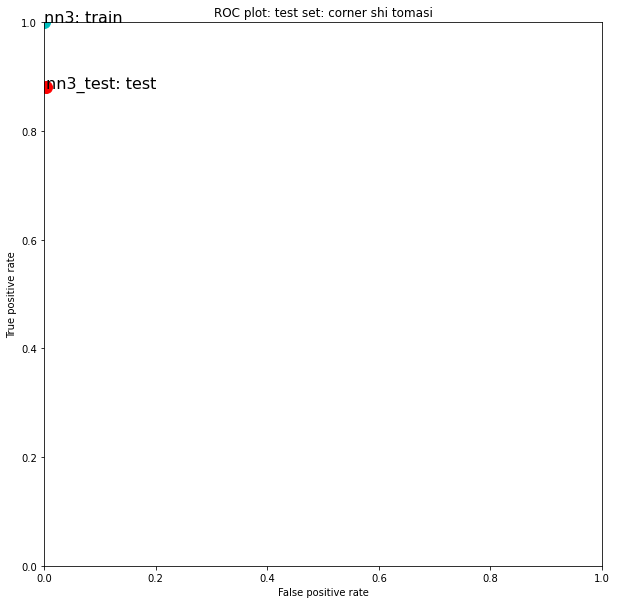

In [12]:
plt.figure(figsize=(10,10))

for fit in final_fits:
    if fit['set'] == 'train':
        color = 'co'
    else:
        color = 'ro'
    plt.plot(fit['FP'] / fit['Neg'], 
             fit['TP'] / fit['Pos'], color, markersize=12)
    plt.text(fit['FP'] / fit['Neg'], 
             fit['TP'] / fit['Pos'], fit['desc'] + ': ' + fit['set'], fontsize=16)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set: corner shi tomasi')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()


# SUBMISSION

### file paths and names:

In [13]:
submission_ci_path = '/users/kinetic.tricia/test_data_for_grading/test_cropped_images/' # file path for cropped images for training
submission_l_file = '/users/kinetic.tricia/test_data_for_grading/test_plane_labels.csv' # file path and file name for csv with labels

In [14]:
X_test_data, X_test_submission = process_raw_data(submission_l_file, submission_ci_path, my_random_seed=49, test=True)
print("Number of rows in the submission test set (should be 1,523): ")

First few lines of image labels: 
                   img_name
0  2016-08-02T13+50+24_430Z
1  2016-08-02T14+12+37_390Z
2  2016-08-03T12+32+21_790Z
3  2016-08-03T13+19+28_320Z
4  2016-08-05T15+24+58_670Z
Size of image label dataFrame: 
(1523, 1)
[0.39706892 0.39572094 0.39535707 0.39602656 0.39717025 0.3970083
 0.40535247 0.40877976 0.40994959 0.41054293 0.41180532 0.41231031
 0.41351452 0.41383957 0.41080616 0.4097276  0.41047361 0.410774
 0.41141437 0.41090893 0.40720306 0.40636215 0.40405938 0.40328546
 0.40892924 0.41109561 0.41091215 0.41123791 0.41010017 0.40960311
 0.41037227 0.40605587 0.40484201 0.40591757 0.40237199]
[3.21485278e-01 2.96454167e-01 7.24618688e-02 6.09644062e-03
 2.91132195e-04 8.23633385e-05 4.59280491e-05 4.50107481e-05
 4.20464530e-05 4.07435740e-05 3.48386643e-05 2.76675413e-05
 3.74577705e-05 5.52653304e-05 6.10303945e-05 4.59289494e-05
 2.28084703e-05 2.07319161e-05 4.20609353e-05 9.72721625e-05
 1.57093860e-04 1.34911995e-04 7.80503877e-05 5.00841810e-05
 

[0.09653206 0.09662634 0.09831974 0.09463085 0.08921192 0.08917529
 0.09092268 0.09268742 0.09443288 0.09425804 0.09424406 0.09268161
 0.09029176 0.10052639 0.10845325 0.10080917 0.09111859 0.09291168
 0.09573863 0.09547845 0.09523854 0.09523651 0.09525386 0.09700116
 0.09874847 0.09876582 0.09876582 0.09876582 0.09874846 0.09701843
 0.09705506 0.10247399 0.10618023 0.10619951 0.1045464 ]
[1.81160359e-02 1.73986548e-02 4.41963420e-03 4.61853891e-04
 1.00395678e-04 5.47469763e-05 1.65559396e-05 9.62785791e-06
 1.64308291e-05 3.98134480e-05 1.01003789e-04 1.77439772e-04
 2.16628308e-04 3.97468730e-04 8.03886051e-04 9.66289289e-04
 1.09825352e-03 1.02494197e-03 6.31521310e-04 2.34535257e-04
 5.89370341e-05 1.62190239e-05 8.21809199e-06 7.47664182e-06
 6.32080826e-06 2.90448905e-06 9.38971835e-07 2.04952337e-06
 1.05465696e-05 4.69455204e-05 9.97538522e-05 5.26120977e-04
 5.22325932e-03 2.06549834e-02 2.14329524e-02]
[0.12269873 0.12523694 0.12774487 0.12484426 0.12189146 0.13118289
 0.154

[0.12640651 0.12473689 0.1253332  0.12709601 0.12614292 0.12334316
 0.12112978 0.11520697 0.11689175 0.12532628 0.12809856 0.12457265
 0.13078352 0.12666672 0.11703727 0.11838765 0.11304841 0.11471333
 0.11329648 0.10837413 0.10882626 0.11321992 0.11574756 0.12221569
 0.12347734 0.12626803 0.12446531 0.11923485 0.11903885 0.11904068
 0.11991706 0.12231976 0.12230269 0.11838285 0.11160976]
[2.78720033e-02 2.67350039e-02 6.62580436e-03 6.44788597e-04
 1.10844873e-04 1.30413312e-04 2.34293665e-04 3.95339020e-04
 4.18980447e-04 3.50818597e-04 2.36831924e-04 1.11591174e-04
 1.15993728e-04 1.14277081e-04 8.13859165e-05 7.45105624e-05
 9.93498408e-05 1.05533906e-04 1.36019877e-04 2.14806185e-04
 2.52138708e-04 1.42468820e-04 4.87040050e-05 4.17337604e-05
 6.67876342e-05 7.89056187e-05 5.07216304e-05 2.85269752e-05
 3.03476309e-05 4.45883783e-05 9.01684372e-05 6.65904250e-04
 6.42660362e-03 2.47123650e-02 2.55545330e-02]
[0.12689142 0.12727644 0.13040766 0.13046717 0.12777114 0.12767714
 0.129

[0.32629666 0.34768315 0.35155506 0.31525456 0.30801974 0.29702326
 0.33630451 0.35671163 0.37226524 0.3880729  0.41661892 0.4397206
 0.42539394 0.28618673 0.34667255 0.44231935 0.3675591  0.32456507
 0.32643488 0.42988231 0.39962872 0.34663229 0.34182254 0.33549012
 0.33179267 0.2505648  0.24787384 0.27173655 0.29583709 0.2884528
 0.18956991 0.23844383 0.26898751 0.26963388 0.2200551 ]
[0.19579441 0.17061353 0.05235217 0.01314439 0.00860422 0.0073155
 0.0067555  0.00668338 0.00561431 0.00439173 0.00999113 0.03037678
 0.04963408 0.08166432 0.08297313 0.06455133 0.03359381 0.02021264
 0.01420269 0.0184658  0.02512909 0.02456939 0.01999204 0.01627175
 0.01453    0.0126163  0.01006144 0.00727128 0.01052418 0.01088867
 0.00936053 0.00853124 0.03464988 0.12333164 0.12782001]
[0.76403215 0.77075472 0.7678092  0.76479492 0.76476499 0.76479299
 0.76800192 0.7762306  0.7792414  0.76846875 0.76041884 0.7611165
 0.76112835 0.76117859 0.76623819 0.77131483 0.77330391 0.77525424
 0.77543467 0.77561

[0.65453207 0.65504081 0.65529975 0.65394053 0.65826827 0.65918195
 0.66080264 0.66139324 0.65730358 0.65674648 0.65674649 0.65764121
 0.66485734 0.66575158 0.66575187 0.66533403 0.66236002 0.66257015
 0.66635521 0.66812207 0.66914269 0.67275202 0.65961092 0.65969881
 0.63389622 0.63075154 0.61429727 0.63053065 0.57647937 0.63993246
 0.53489797 0.38457833 0.34749615 0.35162546 0.57511453]
[8.20753680e-01 7.80546178e-01 1.92162426e-01 1.61681863e-02
 7.49259123e-04 3.25518548e-04 2.84935208e-04 1.45230007e-04
 4.80567248e-05 4.32379967e-05 1.46076736e-04 3.98173405e-04
 7.01674976e-04 8.05873206e-04 8.20209781e-04 8.36924450e-04
 5.37079006e-04 2.12281664e-04 2.12779226e-04 1.64042391e-03
 9.00321786e-03 2.52900086e-02 4.18560506e-02 4.45143983e-02
 3.06535173e-02 1.47332677e-02 1.33466409e-02 2.29983697e-02
 3.91405326e-02 9.11385033e-02 1.37713782e-01 1.22849623e-01
 1.54515109e-01 3.24185705e-01 3.56146780e-01]
[0.78027713 0.74470927 0.74661629 0.73644673 0.72561306 0.70198639
 0.661

[0.06955352 0.07628912 0.07057266 0.08687728 0.08351745 0.07763584
 0.06995379 0.06986535 0.06827103 0.06943728 0.07434789 0.07929799
 0.07470939 0.07563312 0.07939021 0.07326515 0.06693053 0.06597988
 0.06763729 0.06734879 0.07182786 0.07158523 0.06987463 0.07602943
 0.07350802 0.07108408 0.0715836  0.0652039  0.07610571 0.06531677
 0.0648482  0.06721413 0.06927958 0.06969278 0.07381229]
[1.00246592e-02 9.52246808e-03 2.50217598e-03 4.91893406e-04
 2.53407510e-04 9.81688484e-05 1.11678317e-04 1.96845209e-04
 2.38187913e-04 2.59328782e-04 3.03077738e-04 2.92969831e-04
 2.27125076e-04 2.09604805e-04 2.52886323e-04 2.45556234e-04
 1.99412714e-04 1.36919718e-04 6.43757859e-05 7.41547445e-05
 1.03393913e-04 8.64075992e-05 8.98341016e-05 1.47140482e-04
 2.03551079e-04 3.60359436e-04 5.16100066e-04 3.81231033e-04
 2.07988526e-04 2.29803599e-04 2.45978838e-04 3.26419599e-04
 2.41773402e-03 9.71602948e-03 1.07837015e-02]
[0.71857743 0.71113312 0.69926345 0.69776655 0.70532579 0.71028382
 0.710

[0.13996962 0.15765663 0.17242236 0.17478861 0.14238497 0.14148005
 0.14339498 0.14872605 0.15579723 0.18561183 0.23674419 0.35327532
 0.312661   0.22035833 0.14448479 0.20930189 0.15442775 0.13673706
 0.12285939 0.11753858 0.11122386 0.1223568  0.11819515 0.12109165
 0.15579329 0.13322722 0.13105063 0.1278063  0.12334329 0.11183028
 0.10873285 0.10471449 0.10324954 0.10417839 0.110424  ]
[0.04672334 0.0463455  0.01577512 0.00449276 0.00252263 0.00402136
 0.00546067 0.00676489 0.02013511 0.05745323 0.10142399 0.11247573
 0.08585653 0.05598123 0.03714984 0.0187769  0.01603261 0.01214439
 0.00644276 0.0023925  0.00110794 0.00221211 0.00564339 0.00832595
 0.00839765 0.01098521 0.02016124 0.03080363 0.02709897 0.01724886
 0.01020876 0.00417494 0.00685716 0.02163531 0.01867068]
[0.11143725 0.11052487 0.10980822 0.10385927 0.1019241  0.10735979
 0.10932301 0.10861743 0.10775644 0.10966863 0.11678163 0.1224775
 0.14279976 0.13430006 0.14442573 0.29747646 0.38455754 0.2468077
 0.19240337 0.121

[0.55678067 0.5567807  0.55683687 0.55728997 0.55734614 0.55734614
 0.55729188 0.55685424 0.55679998 0.55680014 0.55721737 0.56058276
 0.56099807 0.56098308 0.56157093 0.566328   0.56677044 0.56558249
 0.56588956 0.56955471 0.57000912 0.57000952 0.57045714 0.57406766
 0.57451528 0.57451548 0.57451548 0.57451548 0.57451167 0.57448107
 0.57481063 0.57749965 0.57783303 0.57783318 0.57783318]
[6.01683969e-01 5.76196097e-01 1.42326095e-01 1.18508268e-02
 3.60084661e-04 5.06495643e-06 1.05089996e-05 1.12480782e-05
 1.38991300e-05 4.02632077e-05 7.14821934e-05 7.60490710e-05
 5.16901257e-05 3.00638913e-05 1.98142547e-05 1.41050707e-05
 1.34272737e-05 1.90487965e-05 2.75065178e-05 2.60109006e-05
 2.14611795e-05 3.71762225e-05 6.19563490e-05 6.24714601e-05
 3.65440617e-05 9.00877894e-06 2.39185701e-06 6.10878809e-06
 1.47685723e-05 2.97196414e-05 4.17807290e-04 1.26164252e-02
 1.51074952e-01 6.11877001e-01 6.39383554e-01]
[0.80809459 0.78601411 0.76970757 0.76300114 0.74196719 0.71914086
 0.631

[0.60809038 0.60809038 0.60809038 0.60809038 0.60809038 0.60809038
 0.60809038 0.60809038 0.60819507 0.6109885  0.61195601 0.61059201
 0.61009372 0.61009256 0.61009256 0.61009256 0.61009256 0.61009256
 0.61009256 0.61009256 0.61009256 0.61009256 0.60998792 0.60719583
 0.60628229 0.60907335 0.61009196 0.6100913  0.6100902  0.6100902
 0.61009025 0.61009158 0.61009207 0.61009207 0.61009207]
[7.07759610e-01 6.72145964e-01 1.65379068e-01 1.37596540e-02
 4.15946270e-04 1.79780388e-07 2.24980245e-06 1.01736708e-05
 1.86538719e-05 2.47894244e-05 2.40279799e-05 1.22259494e-05
 4.39938798e-06 1.04154926e-06 1.21189218e-07 6.58596133e-09
 1.40157219e-10 4.67892391e-12 3.73855413e-09 1.25534402e-07
 1.55056644e-06 6.72016642e-06 1.29665419e-05 2.71650185e-05
 3.55947450e-05 3.09903576e-05 3.64514972e-05 3.24030099e-05
 1.69514475e-05 6.22593944e-06 4.25323517e-04 1.38907992e-02
 1.66871412e-01 6.78087003e-01 7.14137715e-01]
[0.52856991 0.5285696  0.52856934 0.52884629 0.5310833  0.53136105
 0.5313

[0.69999718 0.70923321 0.73238301 0.74103339 0.7421908  0.74287984
 0.74916376 0.74964337 0.74535116 0.73909906 0.73804261 0.73803509
 0.73687715 0.73618811 0.72991118 0.72380232 0.72588812 0.72641373
 0.72641407 0.72641409 0.72641443 0.72685637 0.73042128 0.73164228
 0.73792636 0.73821665 0.73357614 0.73037949 0.72569744 0.72476185
 0.72561258 0.73924686 0.74443665 0.74496675 0.7481064 ]
[9.32515327e-01 8.93993223e-01 2.24186698e-01 1.97389390e-02
 9.11664801e-04 1.74846910e-04 2.28830945e-04 2.77117302e-04
 2.55637430e-04 2.37178789e-04 1.50377107e-04 8.38541610e-05
 2.18846203e-04 4.97716092e-04 6.30960814e-04 4.60566066e-04
 1.65522831e-04 3.28465182e-05 1.18396740e-05 3.59845533e-05
 1.29372859e-04 2.47155050e-04 2.86322450e-04 3.60832863e-04
 1.06058412e-03 3.05523700e-03 5.44372784e-03 5.79067402e-03
 4.77224948e-03 5.77203979e-03 7.92049256e-03 2.67971327e-02
 2.52649484e-01 1.01455243e+00 1.07437537e+00]
[0.62764318 0.62763434 0.62765333 0.62765522 0.62627019 0.62926142
 0.635

[0.25371753 0.15409701 0.16410447 0.20331253 0.23619957 0.19017844
 0.18858639 0.18189991 0.21787038 0.21906106 0.21098441 0.24543252
 0.20954124 0.25889475 0.24177969 0.21802755 0.22602499 0.35334938
 0.34891701 0.339224   0.40215324 0.32442001 0.25052675 0.21154339
 0.2308868  0.2357128  0.20221383 0.17272467 0.1559057  0.14385979
 0.16670921 0.1695243  0.1717081  0.21031893 0.20362907]
[0.14209842 0.12933543 0.04289709 0.01146358 0.00527598 0.00262111
 0.00237684 0.00173153 0.00193445 0.00219973 0.00215335 0.00224555
 0.00289819 0.00632338 0.01381813 0.01925187 0.01434478 0.00913712
 0.00722003 0.0096493  0.01819763 0.01990654 0.01344079 0.01229024
 0.0142815  0.01181859 0.00717793 0.00390679 0.00292954 0.00233501
 0.00181806 0.00312715 0.0183735  0.07065912 0.07392691]
[0.51100711 0.51095777 0.50608348 0.50240202 0.49896801 0.49472993
 0.50078332 0.51092215 0.51699951 0.51921031 0.52297429 0.52674792
 0.52786969 0.52892628 0.52800234 0.52675405 0.52632418 0.52671694
 0.52806064 0.5

[0.13079323 0.12974538 0.12874511 0.11905247 0.12522587 0.11766767
 0.11640767 0.12148074 0.11690875 0.11337365 0.11876763 0.11975331
 0.1217232  0.12807703 0.12469041 0.12655374 0.13204337 0.13860029
 0.12996707 0.12191613 0.11828325 0.12186383 0.12347462 0.1334465
 0.12903581 0.12159616 0.12676144 0.13139014 0.12081092 0.1132795
 0.12227537 0.1221507  0.13048052 0.13007676 0.12938105]
[3.35216770e-02 3.17832452e-02 8.07339433e-03 1.04455908e-03
 6.33030742e-04 8.96149641e-04 8.45918251e-04 6.10901292e-04
 3.92848045e-04 2.34656903e-04 1.70856113e-04 1.04023015e-04
 6.09408840e-05 7.37345771e-05 1.37838293e-04 2.39475911e-04
 3.83608928e-04 4.96590997e-04 3.92775524e-04 2.85368422e-04
 1.72705122e-04 1.03756081e-04 1.50169786e-04 3.43273768e-04
 4.82324978e-04 5.62256329e-04 4.75600120e-04 4.25786065e-04
 3.81607889e-04 3.62466603e-04 2.54061981e-04 7.98144626e-04
 7.59059840e-03 2.99585039e-02 3.11096991e-02]
[0.19406507 0.22742208 0.22369761 0.19014848 0.23912654 0.1739117
 0.236484

[0.77139958 0.7652697  0.76361179 0.76402774 0.76402451 0.76343189
 0.76442803 0.7672205  0.76691421 0.76578727 0.76574442 0.76574746
 0.76778538 0.77337393 0.77358365 0.77358502 0.77460467 0.77740171
 0.77750653 0.77750512 0.77689637 0.77522711 0.77516455 0.77516117
 0.77370571 0.76971471 0.76956514 0.76956514 0.76956575 0.7695698
 0.77058859 0.77338097 0.77303665 0.77180542 0.77175928]
[1.13558036e+00 1.07749505e+00 2.64626578e-01 2.20060057e-02
 6.82832358e-04 2.53026321e-05 2.67632048e-05 3.73583009e-05
 5.09887224e-05 6.07163158e-05 8.21366188e-05 1.24535680e-04
 1.53454240e-04 1.36881172e-04 8.03590740e-05 6.51290266e-05
 9.08062549e-05 8.13972189e-05 4.25057241e-05 1.78958620e-05
 1.35952961e-05 1.19412092e-05 1.22088168e-05 2.66155755e-05
 3.72478217e-05 3.58065126e-05 2.21375651e-05 1.04476079e-05
 1.47970401e-05 2.35806854e-05 7.11143998e-04 2.26215923e-02
 2.71162885e-01 1.09864947e+00 1.15151428e+00]
[0.70942779 0.71074131 0.71068197 0.71038332 0.71037213 0.71036975
 0.7093

[0.59479596 0.59479596 0.59479596 0.59479596 0.59479833 0.59581766
 0.59861278 0.59871753 0.59872095 0.6001951  0.60423749 0.60444292
 0.60459137 0.60483368 0.60538735 0.60635242 0.62191549 0.65339471
 0.68057153 0.68615089 0.68313234 0.66362034 0.65579387 0.6738306
 0.67117261 0.65585818 0.64906783 0.64083025 0.61839424 0.61390309
 0.61784816 0.61803333 0.61803411 0.61831565 0.61908762]
[6.88460154e-01 6.54023222e-01 1.61116329e-01 1.34127056e-02
 4.39967030e-04 5.71906362e-05 5.10051058e-05 2.93165695e-05
 3.14626551e-05 4.65351115e-05 4.67366712e-05 3.60071369e-05
 3.00223787e-05 9.94107385e-05 6.08348654e-04 1.87968661e-03
 2.88042865e-03 3.13598311e-03 2.81867111e-03 1.87232469e-03
 1.09704788e-03 1.10847491e-03 1.11221267e-03 8.95382175e-04
 8.80967706e-04 7.32520894e-04 9.31070292e-04 1.06405333e-03
 1.03043993e-03 6.97842099e-04 6.90497617e-04 1.47345462e-02
 1.75885805e-01 7.11996123e-01 7.43294483e-01]
[0.30439801 0.25893936 0.25500777 0.35717326 0.3232966  0.30527027
 0.2957

[0.21081983 0.21192709 0.22399929 0.25688625 0.26238524 0.25008914
 0.25620056 0.2394721  0.22403259 0.21361068 0.19774132 0.17688985
 0.16326992 0.17992039 0.19411392 0.17958815 0.18075682 0.19202437
 0.19493386 0.19565832 0.18286094 0.17154585 0.16544641 0.16890352
 0.16209456 0.1520167  0.1431776  0.14939324 0.14683702 0.1383426
 0.13802848 0.14421337 0.14933859 0.16478833 0.16777486]
[0.10973857 0.10022375 0.02567955 0.00371503 0.00165512 0.00088765
 0.00145286 0.00265839 0.00414115 0.00675531 0.0085737  0.00759399
 0.0047371  0.00201044 0.0011728  0.00172239 0.00245245 0.00259261
 0.00275346 0.00213348 0.00110651 0.00066468 0.00073741 0.00125718
 0.00171931 0.00168873 0.00117658 0.00050413 0.00027517 0.0003009
 0.00050565 0.00162568 0.01216539 0.04835658 0.05076577]
[0.81449829 0.81701378 0.8179312  0.81793333 0.81778388 0.81379601
 0.81234169 0.81233832 0.81237255 0.81328584 0.81347992 0.80977229
 0.80831514 0.80551688 0.80449755 0.80449518 0.80439043 0.80159531
 0.80057598 0.800

[0.35242835 0.36098327 0.36536407 0.36499321 0.36464653 0.36276598
 0.36083102 0.35564179 0.35785611 0.36507354 0.36364959 0.3650896
 0.36128842 0.3632966  0.36939823 0.36636781 0.36453592 0.36549231
 0.36648763 0.36912069 0.37174564 0.37159772 0.36906303 0.37261218
 0.37807713 0.37569606 0.37592793 0.37888865 0.37925296 0.38374852
 0.38818446 0.38260478 0.37965003 0.37909299 0.3755788 ]
[2.46947748e-01 2.32171777e-01 5.75813224e-02 4.88315524e-03
 1.73819185e-04 3.42609293e-05 4.82508701e-05 8.63123939e-05
 7.82354891e-05 3.49717072e-05 2.28630191e-05 1.65923736e-05
 2.81546659e-05 3.94781199e-05 6.22008519e-05 7.15739874e-05
 4.67489924e-05 3.22246516e-05 2.74141731e-05 2.05519196e-05
 1.77484261e-05 1.90580607e-05 2.88524719e-05 3.45718865e-05
 6.06679412e-05 1.35160352e-04 1.98753598e-04 1.49462328e-04
 6.74678745e-05 5.89808765e-05 2.43157369e-04 5.28319926e-03
 6.27553435e-02 2.55257344e-01 2.70104123e-01]
[0.84872933 0.85913118 0.86681218 0.87469162 0.8829264  0.89977753
 0.9127

[0.25631293 0.22426315 0.24475118 0.27815405 0.30210515 0.32169374
 0.37573939 0.35905382 0.36905858 0.34549929 0.37757106 0.34888491
 0.4150855  0.30858852 0.19277861 0.23269087 0.28677038 0.30310615
 0.30167848 0.36300091 0.32688355 0.25997945 0.27528343 0.28427845
 0.28816406 0.21753532 0.1774798  0.19887581 0.22087256 0.28221591
 0.29454413 0.31574281 0.28916622 0.29498963 0.34406293]
[0.10989001 0.10290601 0.04258951 0.03334643 0.03426022 0.03264344
 0.02903818 0.02356264 0.02261652 0.02509006 0.02187593 0.01827782
 0.02414207 0.02421642 0.03175223 0.04260039 0.02352957 0.0104833
 0.01575549 0.02898385 0.02681758 0.01954442 0.01768625 0.01249309
 0.0127333  0.01586133 0.02002344 0.01468609 0.00828877 0.00842412
 0.01286931 0.02060599 0.06680854 0.23615598 0.28675589]
[0.202035   0.22466525 0.19403337 0.29191553 0.2400382  0.29796708
 0.29414209 0.32574531 0.35063389 0.34436527 0.33327381 0.30087986
 0.28043337 0.24796146 0.20182701 0.17727019 0.22681771 0.25799331
 0.26158604 0.30

[0.14191225 0.14864741 0.15039604 0.15497828 0.17455121 0.20770257
 0.19569284 0.17399857 0.17403709 0.17239473 0.16225776 0.14939553
 0.14436544 0.14346028 0.14879931 0.15415079 0.1551792  0.16250819
 0.17714806 0.18225998 0.18750242 0.20753778 0.22885486 0.23759213
 0.23441278 0.23718901 0.24637545 0.24820685 0.24997511 0.24758986
 0.24782858 0.26173574 0.26789945 0.26287469 0.26513022]
[1.02172789e-01 9.76723107e-02 2.50317896e-02 2.85596721e-03
 1.46543155e-03 2.86620999e-03 2.05385390e-03 8.07263504e-04
 5.34985906e-04 3.94348017e-04 3.28667669e-04 2.08636455e-04
 2.15671133e-04 1.85520226e-04 9.83517954e-05 7.48441925e-05
 8.03487545e-05 9.61872337e-05 1.16890488e-04 2.86300145e-04
 4.72006342e-04 3.94546080e-04 4.97039798e-04 3.75510951e-04
 1.19148473e-04 6.37706407e-05 1.08348076e-04 4.27148974e-04
 2.14728109e-03 6.82187027e-03 1.07835776e-02 1.48204369e-02
 5.53670844e-02 1.87729354e-01 2.02340372e-01]
[0.63885744 0.63883663 0.63866875 0.63861285 0.63902855 0.64138583
 0.636

[0.13828323 0.13780227 0.13846219 0.13907843 0.13417128 0.12925861
 0.12931933 0.12941482 0.1282902  0.13094182 0.14073152 0.14681668
 0.14699423 0.14704603 0.1393238  0.12276316 0.11625024 0.11543554
 0.11671255 0.11801393 0.11984502 0.12207922 0.12718147 0.12786038
 0.13132173 0.13343056 0.13024509 0.11952246 0.11267081 0.1194078
 0.12795963 0.13588001 0.14069272 0.13966651 0.13774495]
[3.77785305e-02 3.55075589e-02 8.94858856e-03 1.15320554e-03
 5.62940524e-04 3.97126254e-04 1.52535229e-04 5.68069565e-05
 1.32720260e-04 2.45790296e-04 3.28570322e-04 4.02372575e-04
 6.48943522e-04 1.59643872e-03 2.73078634e-03 2.80859960e-03
 1.75087602e-03 5.71342285e-04 1.25180085e-04 1.81930011e-04
 5.42755685e-04 8.59802765e-04 7.17285534e-04 3.60721860e-04
 2.30706463e-04 3.72198880e-04 5.19630675e-04 6.83915046e-04
 9.17811488e-04 8.70976884e-04 7.77568846e-04 1.37916263e-03
 9.19639948e-03 3.53597739e-02 3.70243501e-02]
[0.79718793 0.79965691 0.79921456 0.79921422 0.79951001 0.80189612
 0.8027

[0.76908071 0.76843323 0.7684088  0.7684088  0.7684088  0.7684088
 0.7684088  0.7684088  0.7684088  0.7684088  0.7684088  0.7684088
 0.7684088  0.7684133  0.7696873  0.76448302 0.76285554 0.75862805
 0.76004029 0.7438857  0.70741706 0.63082337 0.61956389 0.54732269
 0.39286104 0.2977606  0.34457482 0.64199495 0.66729794 0.65701591
 0.73039673 0.52204392 0.56109253 0.50819471 0.53484632]
[1.12160046e+00 1.06229529e+00 2.60938950e-01 2.17038270e-02
 6.56406863e-04 1.06716939e-07 4.19498332e-08 2.90839122e-08
 2.86876831e-08 1.93259505e-07 1.46413403e-06 7.65202660e-06
 4.75399955e-05 3.39350782e-04 1.76983397e-03 5.95837926e-03
 1.22211482e-02 1.68992531e-02 3.74757079e-02 1.27275208e-01
 2.42405010e-01 2.31295170e-01 1.40311380e-01 1.12880128e-01
 1.26983936e-01 1.65858886e-01 1.69176524e-01 1.80768149e-01
 1.73255966e-01 1.71645400e-01 1.67701549e-01 1.55514333e-01
 1.62952388e-01 3.79279405e-01 4.85177300e-01]
[0.16557734 0.15855569 0.14420074 0.1360739  0.13001235 0.1252551
 0.125375

[0.45719479 0.46266622 0.46313342 0.46003393 0.45157044 0.4512533
 0.45125077 0.45014645 0.44777167 0.44807601 0.44810772 0.44825096
 0.44864393 0.4481048  0.44658842 0.44759293 0.45035786 0.45036423
 0.45265311 0.45330702 0.45485432 0.45491475 0.45628269 0.45999539
 0.46317747 0.46459042 0.4682089  0.47038708 0.47598935 0.47670523
 0.48092353 0.4829049  0.47990522 0.48734923 0.48912234]
[4.66506264e-01 4.49239889e-01 1.12467399e-01 9.43791910e-03
 3.06570332e-04 2.72121795e-05 4.95618570e-05 6.38079879e-05
 6.06482946e-05 4.50642667e-05 4.63833172e-05 9.60053120e-05
 1.94437558e-04 2.85098749e-04 2.81843678e-04 2.14218173e-04
 2.61173105e-04 2.97762936e-04 2.12853393e-04 1.14006396e-04
 5.13833096e-05 2.94907968e-05 3.04578789e-05 3.41887062e-05
 2.62861435e-05 2.92415889e-05 6.13356796e-05 9.67403659e-05
 1.06838164e-04 1.29676425e-04 5.33031126e-04 1.05106647e-02
 1.23236807e-01 4.98729439e-01 5.25326263e-01]
[0.25403787 0.20611004 0.20858865 0.23450231 0.25826352 0.2684477
 0.24759

[0.13775005 0.14537766 0.15533614 0.15626414 0.15940504 0.15899585
 0.16459161 0.16570065 0.16883533 0.16941579 0.16777805 0.17284188
 0.16592801 0.15050692 0.14359752 0.14340732 0.14536782 0.14711651
 0.15885434 0.15919178 0.16077352 0.16213443 0.15684981 0.14941543
 0.14469951 0.1384829  0.14504018 0.15342391 0.16036974 0.16059215
 0.16199323 0.17798003 0.19222256 0.20131364 0.21449634]
[3.77378853e-02 3.61180563e-02 9.34382198e-03 9.45955410e-04
 1.54298906e-04 1.24092227e-04 9.71971077e-05 9.15816633e-05
 1.74368297e-04 2.76314867e-04 3.16933752e-04 5.50997566e-04
 7.79450862e-04 7.28412415e-04 6.26577711e-04 5.42619450e-04
 6.12586374e-04 6.12489195e-04 4.63518700e-04 2.45453355e-04
 1.37827993e-04 2.65727529e-04 5.01872354e-04 7.06212368e-04
 8.04481283e-04 8.04843098e-04 6.54170079e-04 4.73126888e-04
 2.87894088e-04 2.64453270e-04 5.28158516e-04 2.10205086e-03
 1.65426574e-02 6.50831747e-02 7.35284602e-02]
[0.67807868 0.68097559 0.68783751 0.68851149 0.6912696  0.69450418
 0.695

[0.78356145 0.78317238 0.78003405 0.77964475 0.77964219 0.77824803
 0.76700451 0.76569648 0.76400142 0.75448162 0.74638244 0.74268545
 0.73780559 0.73891411 0.74080565 0.74081496 0.73872455 0.73608026
 0.73374984 0.7205751  0.70672488 0.69150959 0.67695688 0.67623759
 0.67829365 0.67633034 0.67479164 0.679296   0.68727866 0.70105396
 0.73148397 0.75788213 0.79281493 0.81021467 0.8078788 ]
[1.13783217e+00 1.07366308e+00 2.62703962e-01 2.18567947e-02
 7.13841470e-04 5.52136332e-05 4.35249891e-05 6.03365833e-05
 9.06168858e-05 1.04368952e-04 2.17519478e-04 5.35905835e-04
 7.85489517e-04 6.27412354e-04 4.55512496e-04 4.79832498e-04
 6.67968251e-04 8.87313203e-04 9.45949962e-04 8.56399668e-04
 7.43904355e-04 7.32234649e-04 7.32395401e-04 5.96755182e-04
 6.43110603e-04 8.39976012e-04 8.73682319e-04 8.76207597e-04
 9.95683937e-04 9.30427046e-04 1.47706658e-03 2.59502694e-02
 3.02830006e-01 1.22942963e+00 1.30280622e+00]
[0.5303233  0.27176109 0.26196772 0.2546969  0.20623406 0.1738086
 0.1389

[0.40333345 0.3995701  0.4375783  0.44919035 0.44965901 0.454723
 0.45832554 0.45532075 0.45084048 0.45229745 0.45197355 0.42176191
 0.41772663 0.41923936 0.41702684 0.41449003 0.43268343 0.44345576
 0.44067472 0.42054371 0.37765574 0.35596825 0.33673903 0.32850665
 0.27386216 0.21407365 0.21060876 0.20040937 0.19363026 0.18014962
 0.16729552 0.1762623  0.19533417 0.16618434 0.15995775]
[0.28285979 0.25342093 0.08807022 0.0268766  0.00805545 0.00294976
 0.00258485 0.00211916 0.00166928 0.00246224 0.00369854 0.00393782
 0.00231658 0.00081061 0.00112337 0.00228716 0.0035532  0.00707729
 0.01582855 0.02467141 0.02334963 0.01484291 0.01370776 0.02042177
 0.02027194 0.01683755 0.01379241 0.00703532 0.00218228 0.00120727
 0.00155582 0.0025581  0.01276361 0.04396569 0.04749951]
[0.25822685 0.25874489 0.2977665  0.33176004 0.32435254 0.35710719
 0.39383631 0.36829781 0.39514692 0.44902084 0.46064743 0.46070465
 0.36099052 0.25146222 0.16911349 0.17830419 0.16405409 0.14673018
 0.14015623 0.144

 1.82895485e-01 7.41731052e-01 7.78749190e-01]
[0.60635824 0.61037082 0.61172487 0.61095713 0.61176661 0.61447502
 0.6155124  0.61537851 0.61456806 0.61072304 0.61063192 0.61149074
 0.60790761 0.60791741 0.60891489 0.61015484 0.61051652 0.61292441
 0.61421804 0.61387017 0.61318097 0.60958477 0.60977875 0.61097083
 0.6123161  0.61434798 0.61403622 0.61038788 0.61014389 0.61182409
 0.61196965 0.6114635  0.61167715 0.61390677 0.61418319]
[7.13061044e-01 6.77802784e-01 1.67101376e-01 1.39225458e-02
 4.46846737e-04 3.28531054e-05 3.23315277e-05 2.28922366e-05
 2.26324354e-05 6.74158130e-05 1.68613750e-04 2.29351795e-04
 1.87019047e-04 1.45438046e-04 1.29558327e-04 1.05265943e-04
 8.29411024e-05 1.26327197e-04 2.19569241e-04 2.56998425e-04
 2.33704664e-04 2.76351974e-04 4.16937848e-04 4.54903310e-04
 3.11640247e-04 1.68591168e-04 9.77177930e-05 6.58299930e-05
 3.91253336e-05 1.35217972e-05 4.35165214e-04 1.40972287e-02
 1.69426318e-01 6.88768191e-01 7.23692918e-01]
[0.38518518 0.38971731 0.3

[0.50167546 0.49755541 0.48792711 0.48689568 0.50026631 0.50030654
 0.49900288 0.4927727  0.49198466 0.49197245 0.4923715  0.49549806
 0.49588381 0.4958707  0.49647034 0.50132063 0.50192196 0.50192213
 0.50171012 0.49999971 0.49901243 0.49275917 0.49237153 0.49549785
 0.49588549 0.49588549 0.49549831 0.49237274 0.49228435 0.48893943
 0.46880508 0.45841531 0.44972652 0.43461005 0.43819399]
[4.65421774e-01 4.24719569e-01 1.11987341e-01 1.63996857e-02
 6.03995378e-03 5.96309326e-03 6.24356978e-03 4.19430230e-03
 1.59710989e-03 4.91009138e-04 3.05816439e-04 1.98172661e-04
 8.68038899e-05 7.51542213e-05 1.07789254e-04 1.05836698e-04
 6.82804889e-05 4.70467987e-05 7.50367086e-05 1.13163268e-04
 1.32392033e-04 1.35163853e-04 8.85534441e-05 2.96946191e-05
 1.72012515e-05 3.15329838e-05 1.34408669e-04 8.29194427e-04
 3.09363821e-03 5.76801495e-03 6.68210176e-03 1.22708029e-02
 8.01112129e-02 3.14931311e-01 3.52380998e-01]
[0.49019589 0.48976741 0.48631128 0.48592172 0.48623577 0.48705392
 0.493

[0.4371048  0.3973784  0.4062861  0.41869749 0.36555822 0.3902627
 0.29586306 0.26084112 0.28650184 0.33501048 0.34514165 0.27579868
 0.21289512 0.20479891 0.16781859 0.16267613 0.20283448 0.19365651
 0.1630099  0.15144228 0.15045048 0.16052412 0.17168538 0.16925257
 0.15747353 0.17166809 0.18707685 0.21586964 0.22731637 0.26671479
 0.27755002 0.28360717 0.34467213 0.33833607 0.30801934]
[0.30765539 0.24395961 0.06138249 0.01573167 0.02092578 0.02899414
 0.0285357  0.02422545 0.01857915 0.02467276 0.03690001 0.03554084
 0.0201444  0.00890868 0.00747557 0.00598884 0.00392863 0.00375245
 0.00294573 0.00216933 0.00103542 0.00040252 0.00048066 0.00119849
 0.00295311 0.00418049 0.00431277 0.00462261 0.00569834 0.00717122
 0.01103742 0.02062173 0.06277069 0.19613292 0.2173692 ]
[0.30401331 0.36678004 0.49852474 0.54161465 0.54305775 0.51619238
 0.49486843 0.46504064 0.45099692 0.47756368 0.50823695 0.48693102
 0.45727192 0.46095851 0.47513386 0.48128898 0.51027672 0.51949294
 0.50249921 0.42

[0.66791256 0.66708406 0.66626572 0.66728011 0.6683395  0.6720534
 0.67575714 0.67579392 0.67573673 0.66997736 0.66419849 0.66209467
 0.65954024 0.65970855 0.66019071 0.66271632 0.66510228 0.66530606
 0.66487215 0.6651652  0.67104003 0.6788354  0.68312107 0.68309695
 0.68276592 0.67986179 0.67631202 0.67945741 0.6826599  0.68476555
 0.6868396  0.6868602  0.68691861 0.69280103 0.69868345]
[8.53245857e-01 8.10884541e-01 1.99393219e-01 1.66369590e-02
 6.27765167e-04 1.47227419e-04 1.24059348e-04 1.12439966e-04
 1.42089740e-04 1.58230078e-04 1.56069754e-04 1.86485749e-04
 2.23629603e-04 1.71279613e-04 7.40861008e-05 3.08600907e-05
 4.69140923e-05 7.28096862e-05 8.09551498e-05 1.18565074e-04
 1.55669862e-04 1.78377394e-04 1.59945625e-04 9.02751491e-05
 5.72625084e-05 6.62099891e-05 7.43226319e-05 5.04432781e-05
 3.61144676e-05 3.78574905e-05 5.62232611e-04 1.74150351e-02
 2.09129049e-01 8.58536340e-01 9.22216019e-01]
[0.65778196 0.65778474 0.65806462 0.6583445  0.65834728 0.65836655
 0.6603

[0.7098632  0.71088689 0.71307893 0.71709711 0.72135314 0.72228983
 0.68657139 0.56541386 0.49427473 0.29680992 0.24733423 0.3354746
 0.35000549 0.46761353 0.68263838 0.74091584 0.74334616 0.7655975
 0.76668093 0.77996219 0.78697378 0.78622687 0.78544862 0.78642729
 0.79131294 0.79889423 0.7955644  0.77216219 0.77243813 0.77716111
 0.78975379 0.80200305 0.81226071 0.82516092 0.83293924]
[0.98949066 0.88719149 0.216709   0.02379064 0.02832555 0.0976882
 0.19801913 0.27018275 0.26513408 0.19368605 0.11873124 0.06505618
 0.14983389 0.31130309 0.36458548 0.23683975 0.11554313 0.07179642
 0.04666248 0.0206655  0.0058511  0.00195542 0.00145771 0.00146714
 0.0023544  0.0049673  0.00669089 0.00617412 0.00363219 0.00167963
 0.00346274 0.03017572 0.30380666 1.2255782  1.31687547]
[0.15643234 0.15536008 0.15487744 0.15286545 0.15303562 0.15642037
 0.157258   0.16062975 0.1607601  0.15844016 0.15846099 0.16094904
 0.16111322 0.15966597 0.15867319 0.1612881  0.16163678 0.16163694
 0.16164678 0.1617

[0.11962361 0.1378539  0.1506529  0.15653178 0.16904675 0.18728524
 0.19039959 0.20222589 0.23650013 0.20861981 0.21270187 0.2121401
 0.21175073 0.17614588 0.14798704 0.19247571 0.22564331 0.19745876
 0.21570324 0.21093883 0.21122157 0.19162764 0.19952683 0.20970658
 0.19648114 0.25227344 0.2518971  0.21877814 0.23553371 0.23076903
 0.20241665 0.2067897  0.25029184 0.26269983 0.23834285]
[0.03773545 0.03742096 0.01152978 0.00219741 0.00094658 0.00210811
 0.00745193 0.01313021 0.01213866 0.00721214 0.00368891 0.00320946
 0.00654772 0.01206762 0.01728999 0.01491864 0.00971868 0.00353871
 0.0014263  0.00094302 0.00096271 0.00136117 0.0019127  0.0043525
 0.00820477 0.01115979 0.00892947 0.00474725 0.00397085 0.00568539
 0.01182339 0.01909857 0.04863532 0.14100682 0.12794994]
[0.30979922 0.28447216 0.28740905 0.2909848  0.26379467 0.17036891
 0.17230898 0.15448439 0.12992364 0.19064874 0.19350938 0.18998574
 0.2154205  0.17483739 0.12554919 0.15316855 0.20366061 0.15384231
 0.20170551 0.249

### IMPORTANT CHECK: make sure that the number of columns in your training data is the same as the number of columns in this test submission!

In [15]:
print(data_train.shape)
print(X_test_data.shape)

(5068, 525)
(1523, 525)


Both the training set and submission test set have 525 columns. Success!

---

Choose a *single* model for your submission. In this code, I am choosing the Perceptron model fit, which is in the prc object. But you should choose the model that is performing the best for you!

In [16]:
# concatenate predictions to the id
#X_test_submission["prediction"] = prc.predict(X_test_data)
X_test_submission["prediction"] = nn3.predict(X_test_data)
# look at the proportion of positive predictions
print(X_test_submission['prediction'].mean())

0.015758371634931056


This is the proportion of predictions that have predicted that there is an airplane in the image.

In [17]:
print(X_test_submission.shape) # should be (1523, 2)

(1523, 2)


In [18]:
# export submission file as pdf
# CHANGE FILE PATH: 
X_test_submission.to_csv('airplane_TriciaIlena_FinalSubmission.csv', index=False)